In [0]:
path = "/Users/sarahhazem/Downloads/"

weather_link = "Climate_Data_NCEI.csv"
weather_data = path + weather_link

crash_link = "Motor_Vehicle_Collisions_-_Crashes.csv"
crash_data = path + crash_link

taxi_link = "taxi_reduced.csv"
taxi_data = path + taxi_link

taxizone_link = "taxi_zone_lookup.csv"
taxizone_data = path + taxizone_link

In [0]:
import pandas as pd
import numpy as np

In [0]:
crash = pd.DataFrame()
run = 0
chunk_size = 100000
intermediate_data = []
for count, chunk in enumerate(pd.read_csv(crash_data, sep=",", error_bad_lines=False, chunksize=chunk_size)):
    #print('Chunk: ' + str(count + 1))
    relevant_rows = []
    for i in range(0 + run, len(chunk) + run):
        if '2018' in chunk['CRASH DATE'][i]:
            relevant_rows.append(i-run)
    #print('Number of rows selected: ' + str(len(relevant_rows)) + ' / ' + str(chunk_size))
    intermediate_data.append(chunk.iloc[relevant_rows])
    run = run + chunk_size

crash = crash.append(intermediate_data)

/Users/sarahhazem/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
crash = crash.reset_index()

In [0]:
crash = crash[['CRASH DATE','CRASH TIME','BOROUGH','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1', 'ON STREET NAME']]
crash = crash.dropna(subset=['BOROUGH'])
crash['CRASH DATE'] = pd.to_datetime(crash['CRASH DATE'],format='%m/%d/%Y')

In [0]:
#bronx crashes
bronx =  crash[crash.BOROUGH == 'BRONX']
bronx_times = bronx['CRASH TIME']
bronx_t = np.empty(23059)
for i in range(0,23059):
    z = bronx_times.iloc[i]
    z= z.split(':')
    bronx_t[i] = int(z[0])
#manhattan crashes 
manh =  crash[crash.BOROUGH == 'MANHATTAN']
manh_times = manh['CRASH TIME']
manh_t = np.empty(31412)
for i in range(0,31412):
    z = manh_times.iloc[i]
    z= z.split(':')
    manh_t[i] = int(z[0])
#brooklyn crashes
brook = crash[crash.BOROUGH=='BROOKLYN']
brook_times = brook['CRASH TIME']
brook_t = np.empty(47311)
for i in range(0,47311):
    z = brook_times.iloc[i]
    z= z.split(':')
    brook_t[i] = int(z[0])
#Queens Crashes
queens = crash[crash.BOROUGH=='QUEENS']
queens_times = queens['CRASH TIME']
queens_t = np.empty(41276)
for i in range(0,41276):
    z = queens_times.iloc[i]
    z= z.split(':')
    queens_t[i] = int(z[0])
#Staten Island Crashes
staten = crash[crash.BOROUGH=='STATEN ISLAND']
staten_times = staten['CRASH TIME']
staten_t = np.empty(6171)
for i in range(0,6171):
    z = staten_times.iloc[i]
    z= z.split(':')
    staten_t[i] = int(z[0])

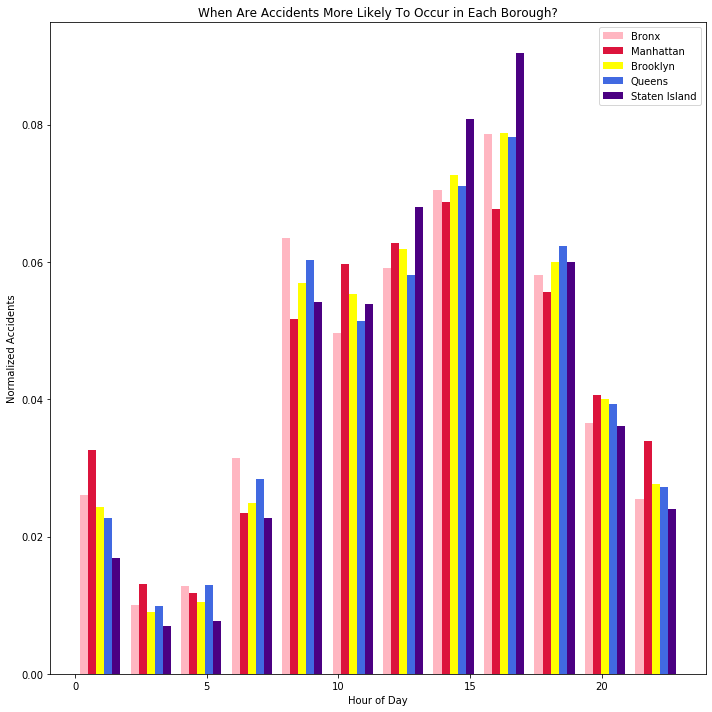

In [0]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
bronx_t = list(bronx_t)
manh_t = list(manh_t)
brook_t = list(brook_t)
queens_t = list(queens_t)
staten_t = list(staten_t)
names = ['Bronx','Manhattan', 'Brooklyn','Queens','Staten Island']
colors= ['lightpink','crimson', 'yellow','royalblue','indigo']
plt.rcParams["figure.figsize"] = (10,10)
plt.hist([bronx_t, manh_t, brook_t, queens_t, staten_t], bins = int(180/15), density=True,
         color = colors, label=names)
pyplot.legend(loc='upper right')
pyplot.xlabel("Hour of Day")
pyplot.ylabel("Normalized Accidents")
pyplot.title("When Are Accidents More Likely To Occur in Each Borough?")
plt.tight_layout()
plt.savefig('fig1.jpg')
plt.show()

In [0]:
#trying to fit knn model 
street_crash = crash.dropna()

In [0]:
for i in range(0, 96019):
    z = street_crash['CRASH TIME'].iloc[i]
    z= z.split(':')
    street_crash['CRASH TIME'].iloc[i] = int(z[0])

/Users/sarahhazem/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/sarahhazem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
street_crash = street_crash

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
street_crash['CRASH DATE'] = le.fit_transform(street_crash['CRASH DATE'])
street_crash['BOROUGH'] = le.fit_transform(street_crash['BOROUGH'])
X = street_crash[['CRASH TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'CRASH DATE', 'BOROUGH']]
y=street_crash['ON STREET NAME']

/Users/sarahhazem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sarahhazem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [0]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.007706727765048948


In [0]:
crash[['CRASH TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'CRASH DATE', 'BOROUGH']]
predicted= knn.predict([[8,0,0,316,2]])

In [0]:
predicted

array(['2 AVENUE                        '], dtype=object)

In [0]:
street_names = street_crash['ON STREET NAME'].unique()

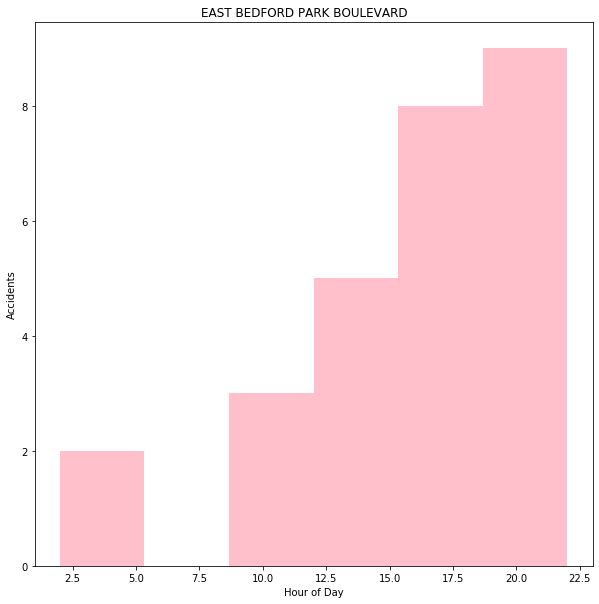

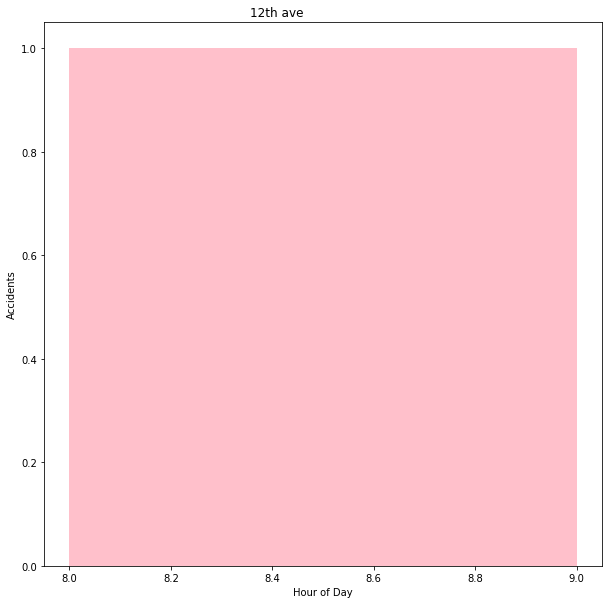

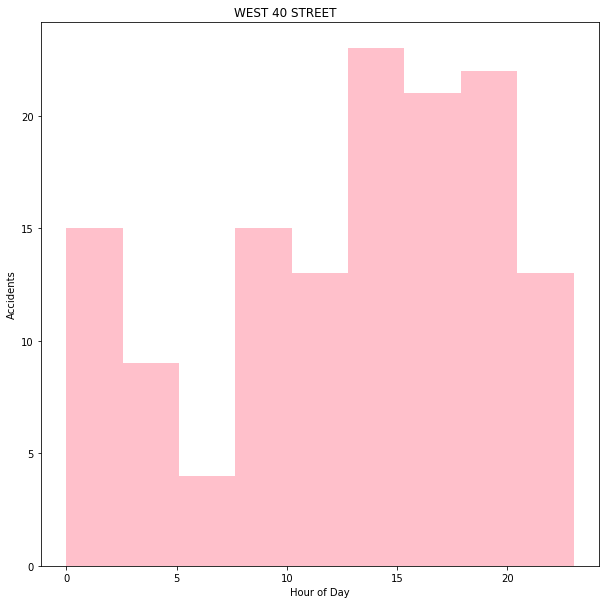

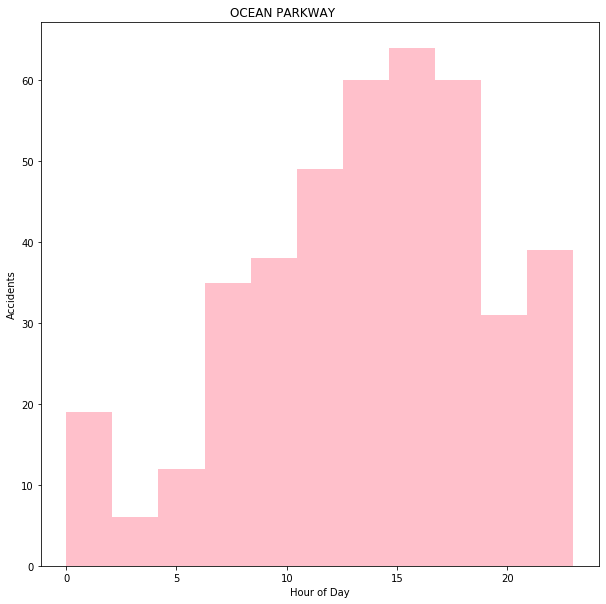

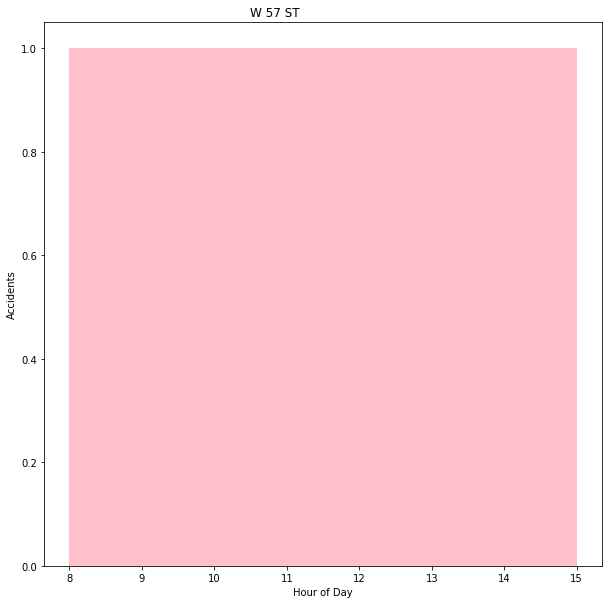

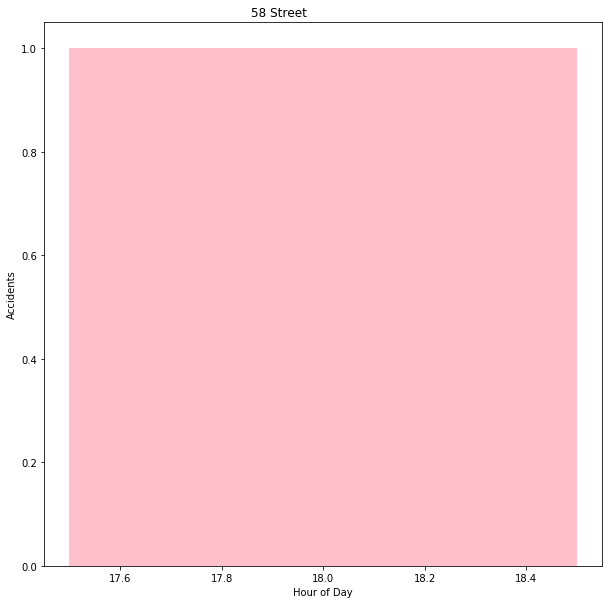

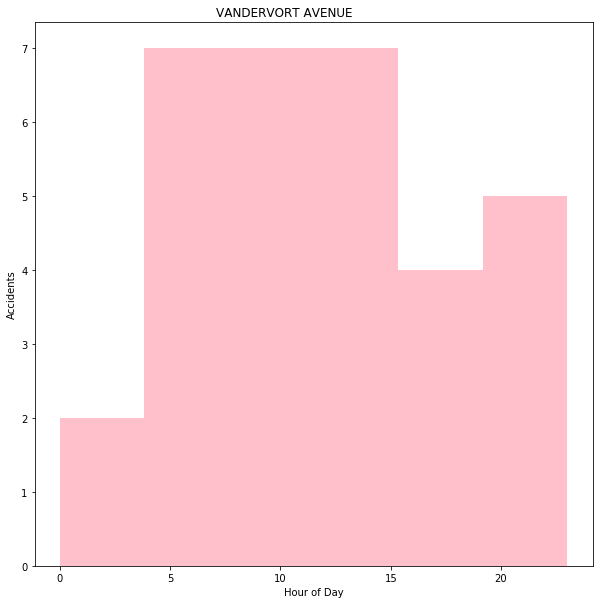

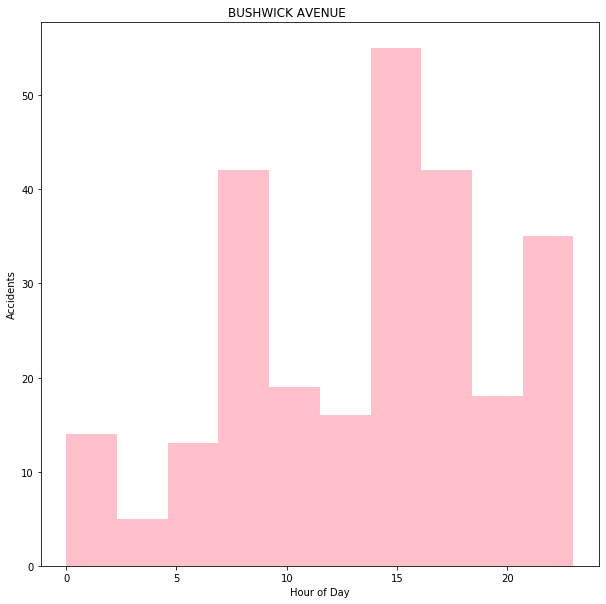

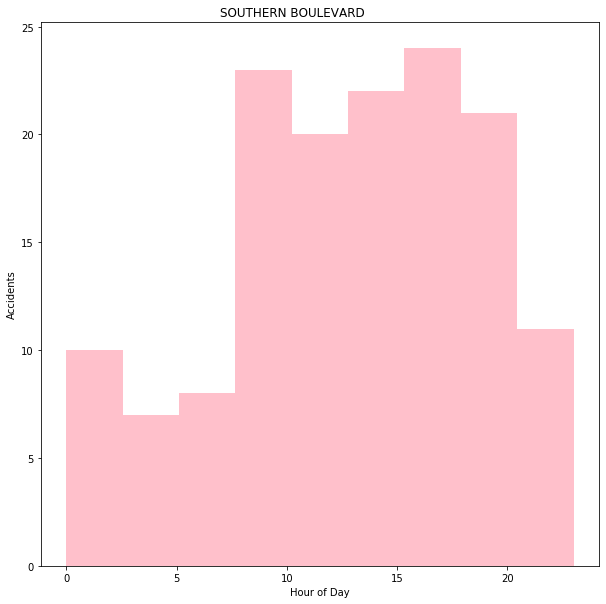

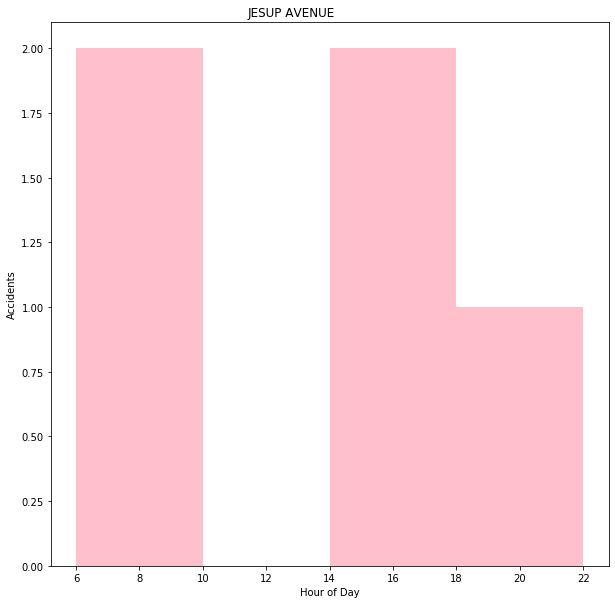

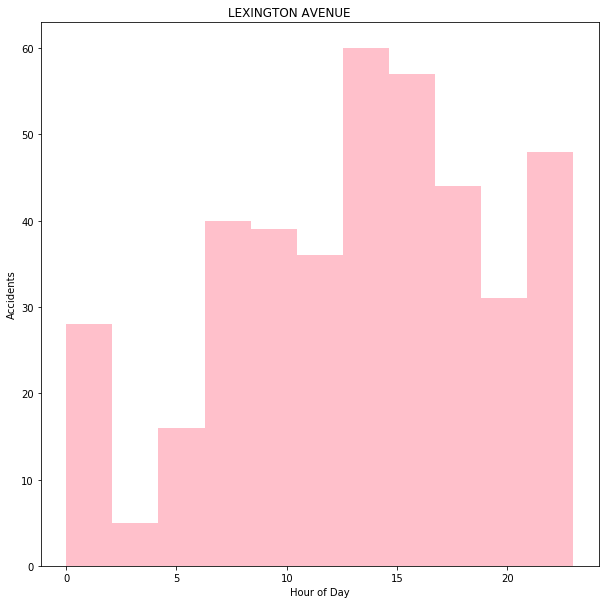

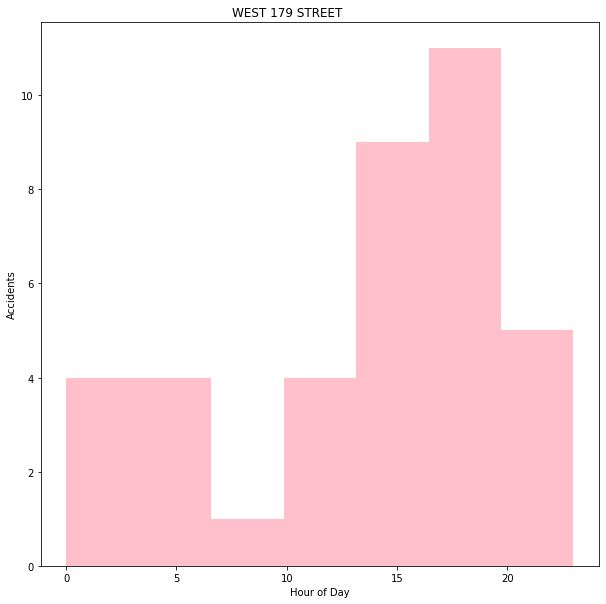

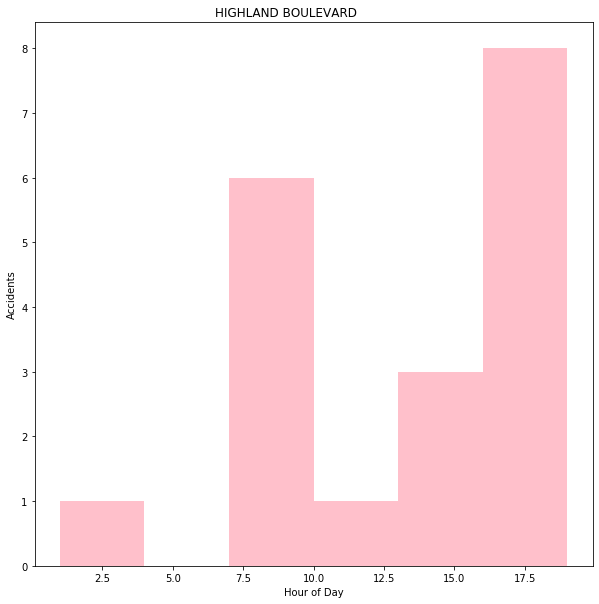

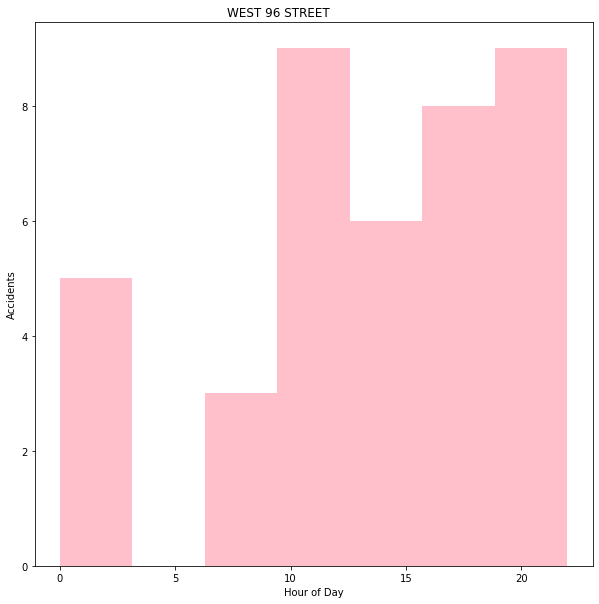

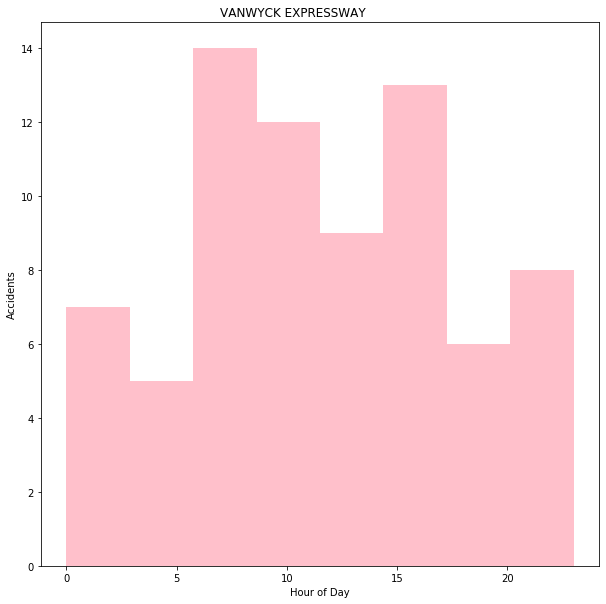

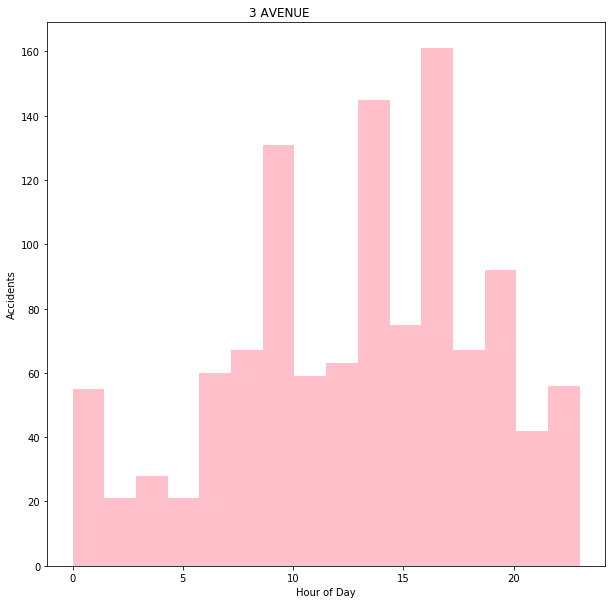

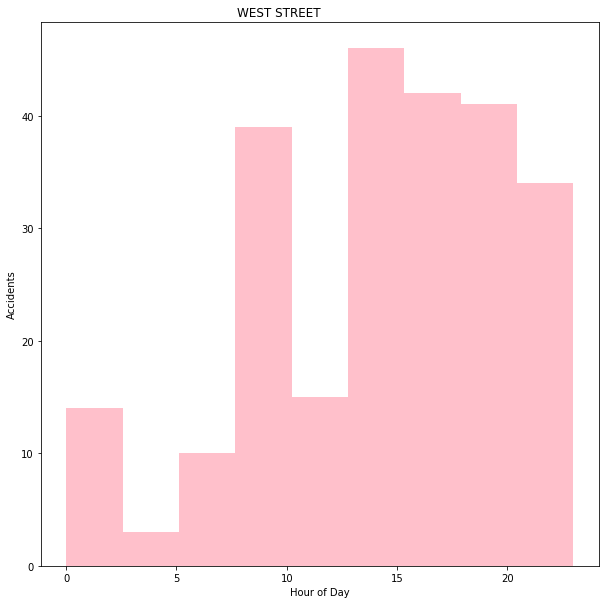

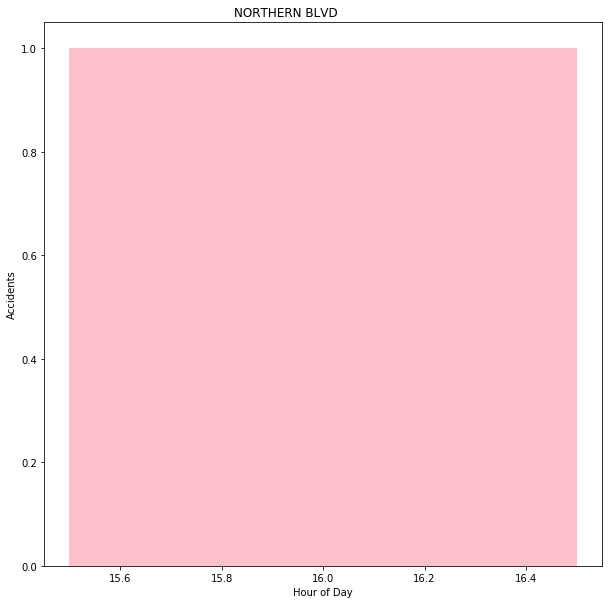

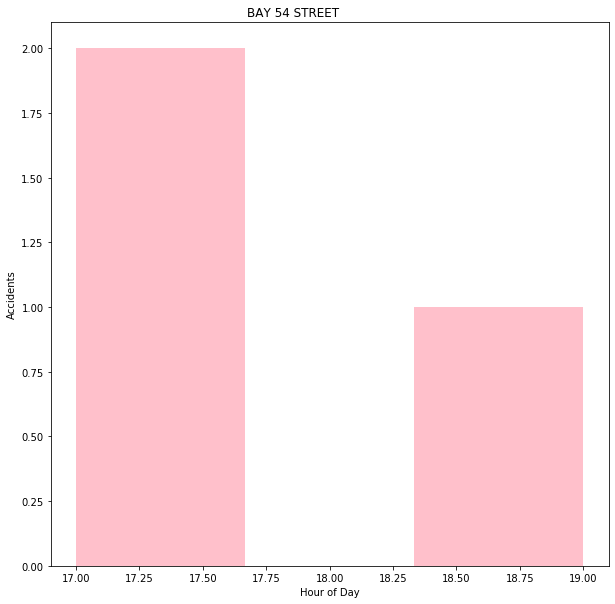

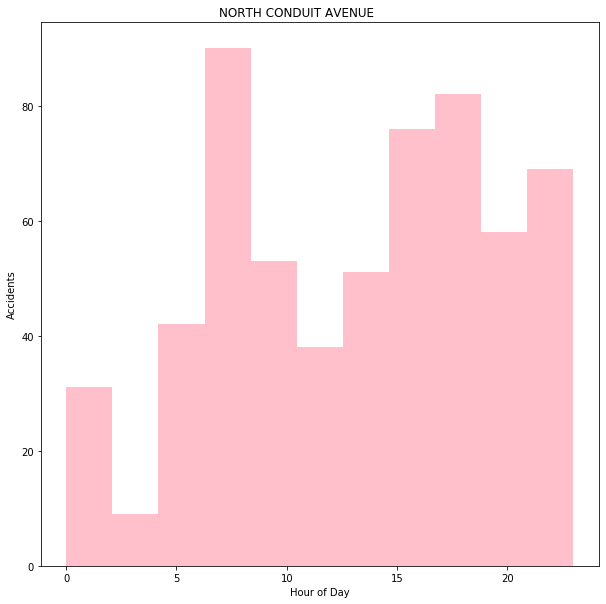

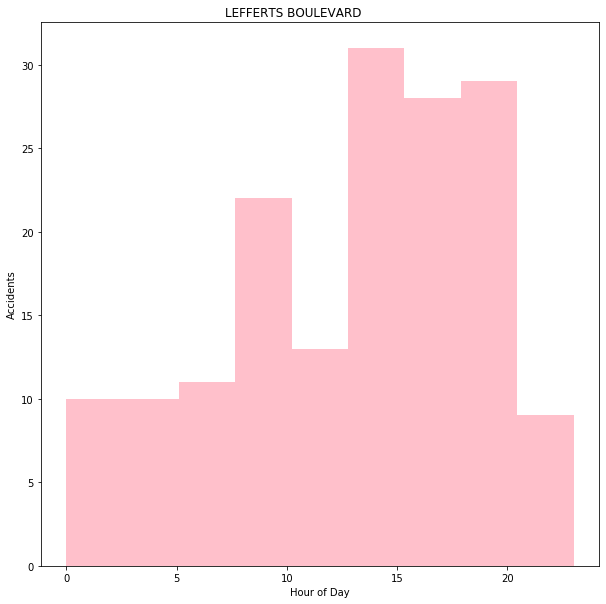

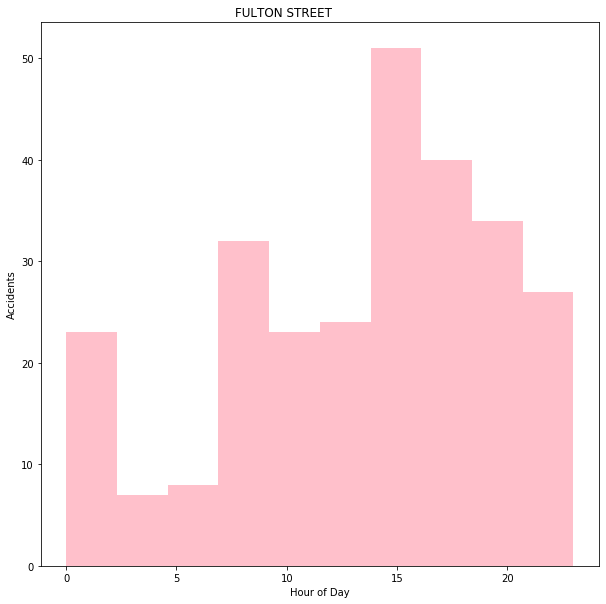

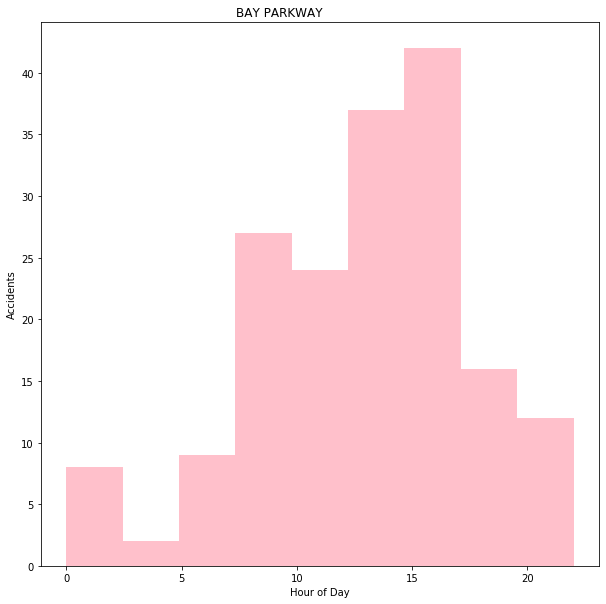

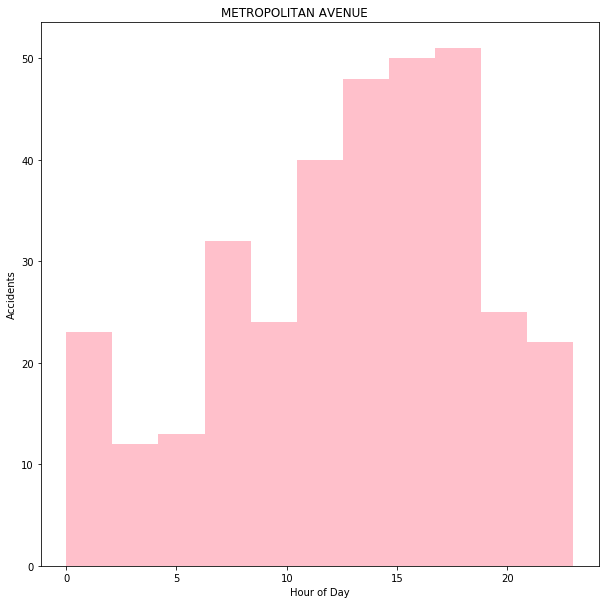

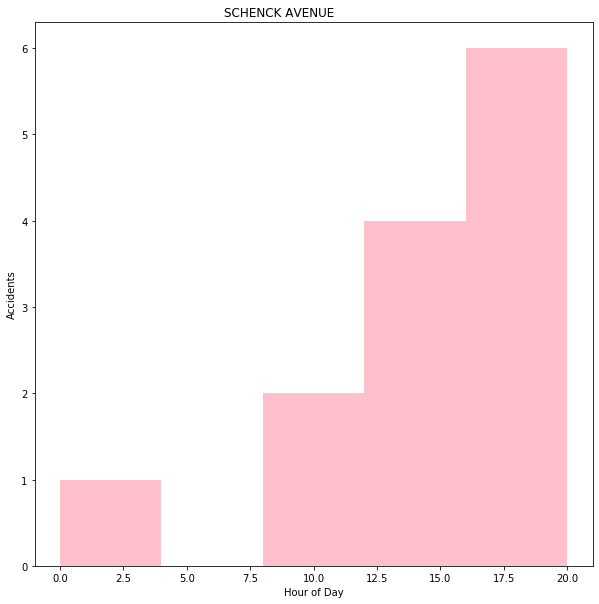

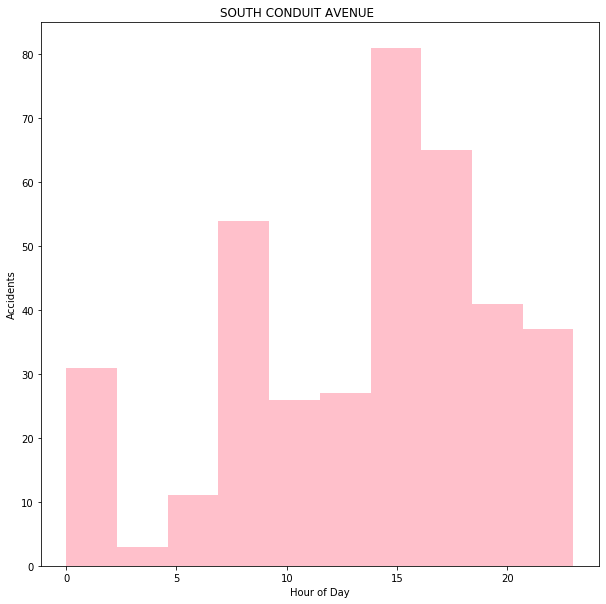

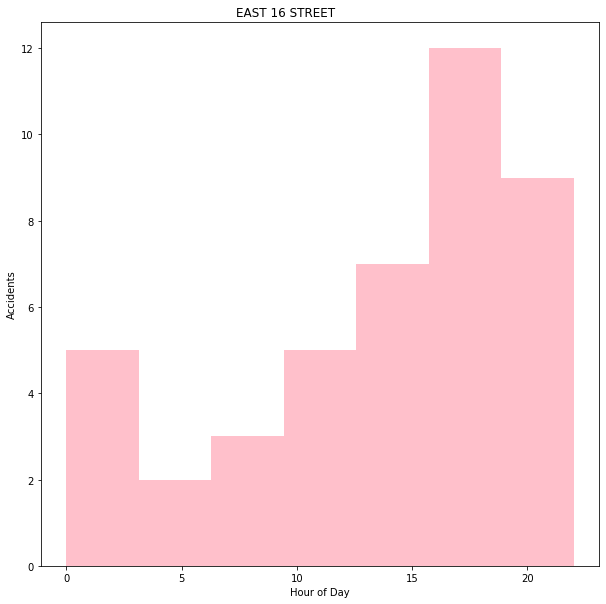

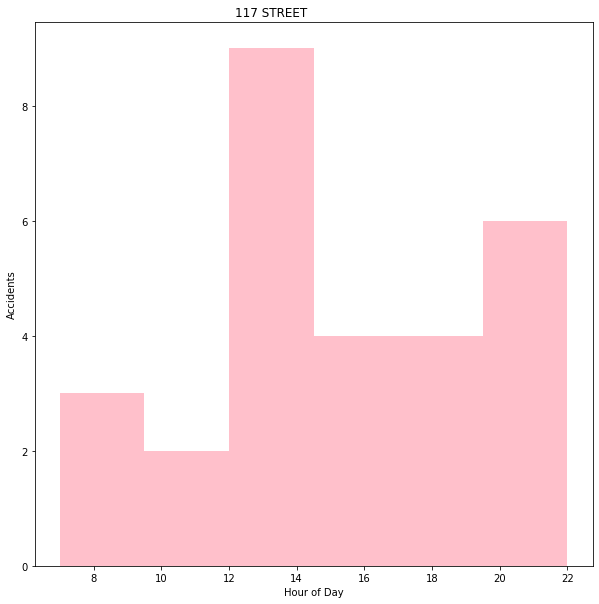

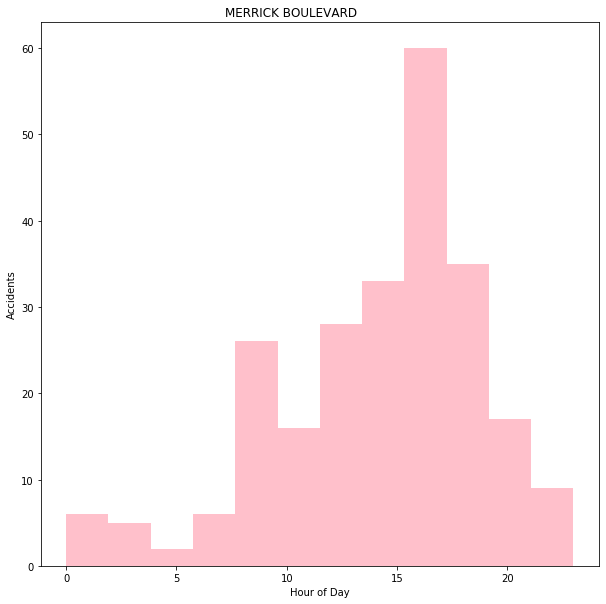

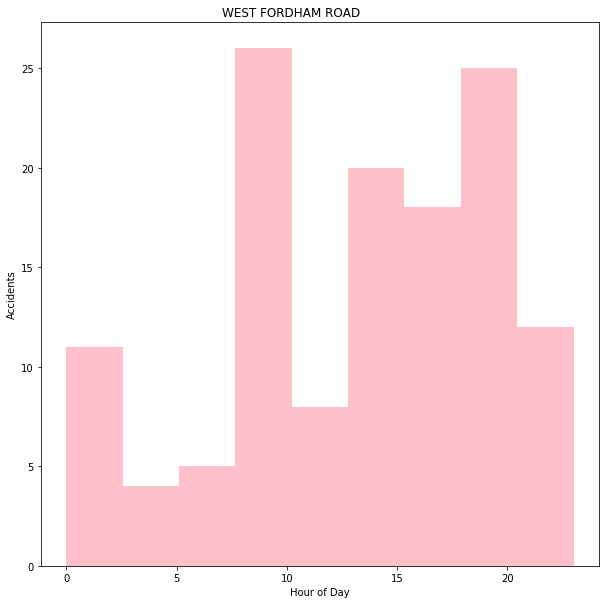

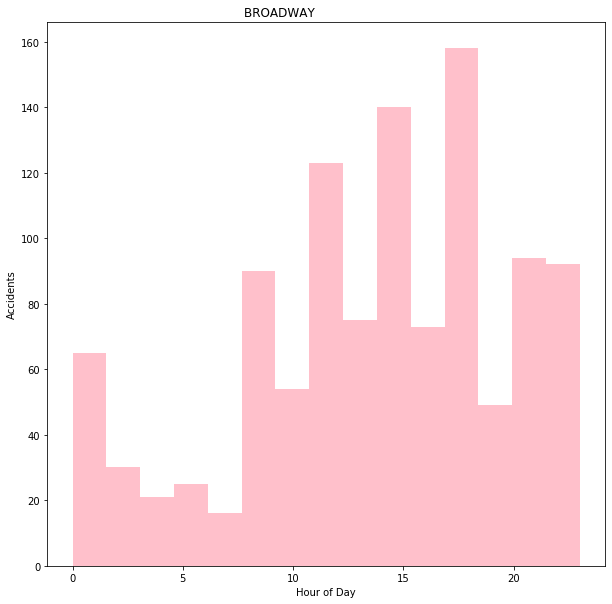

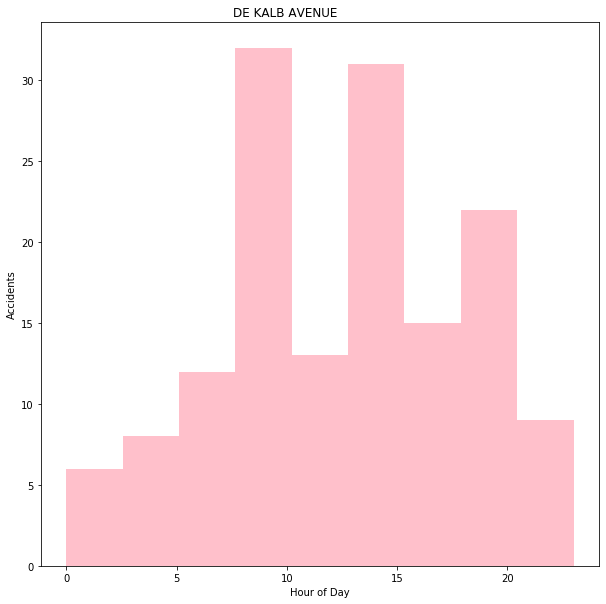

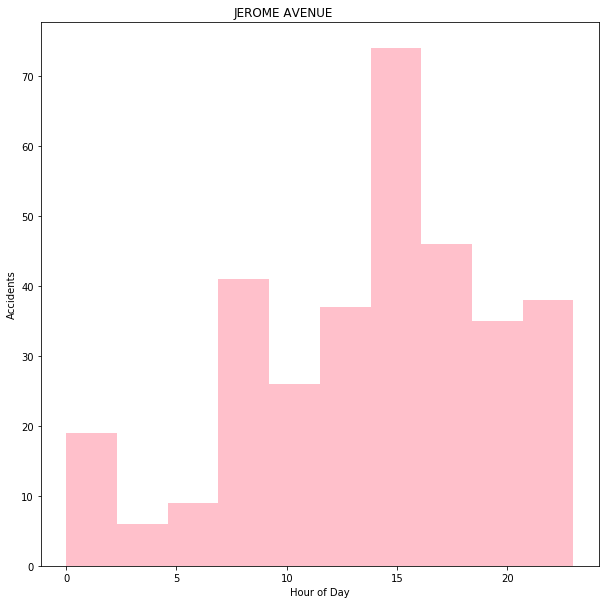

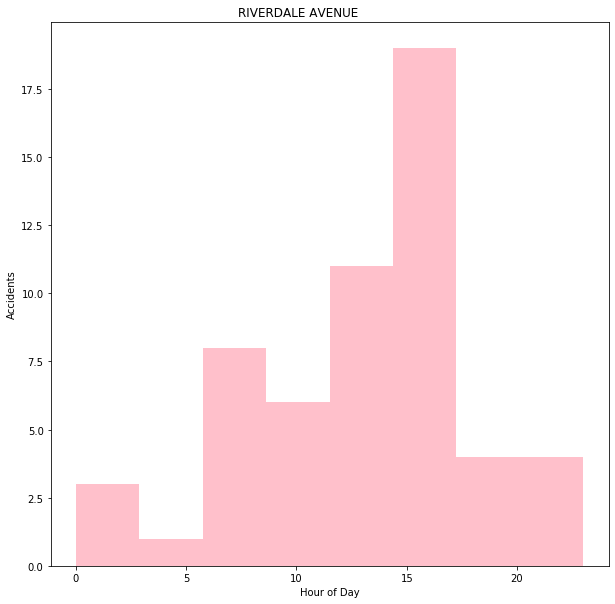

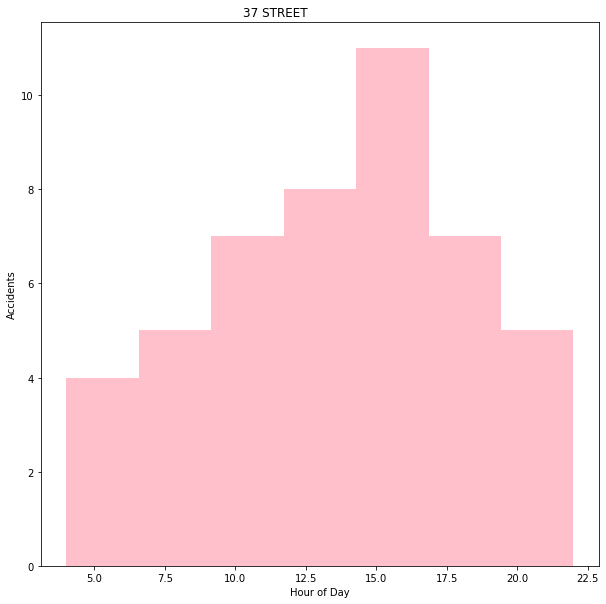

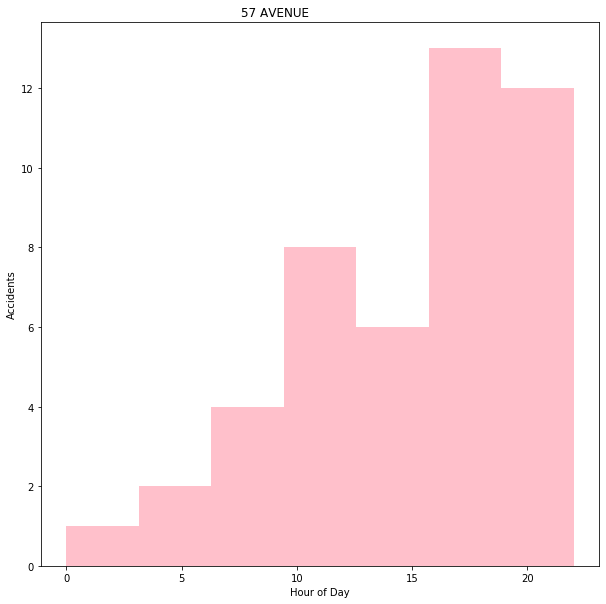

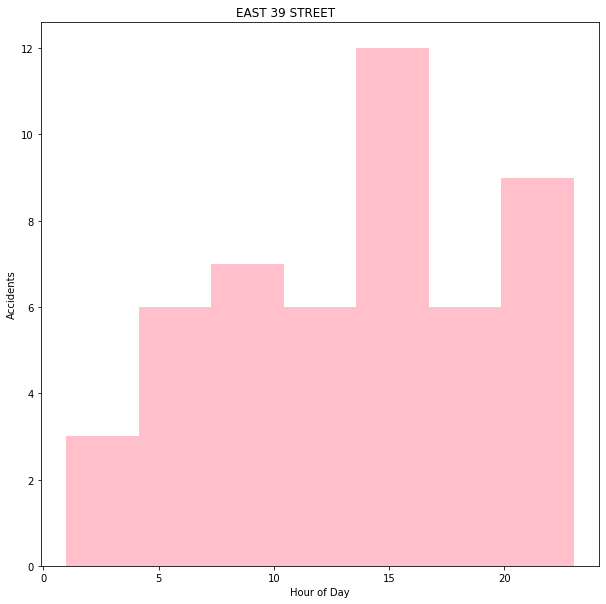

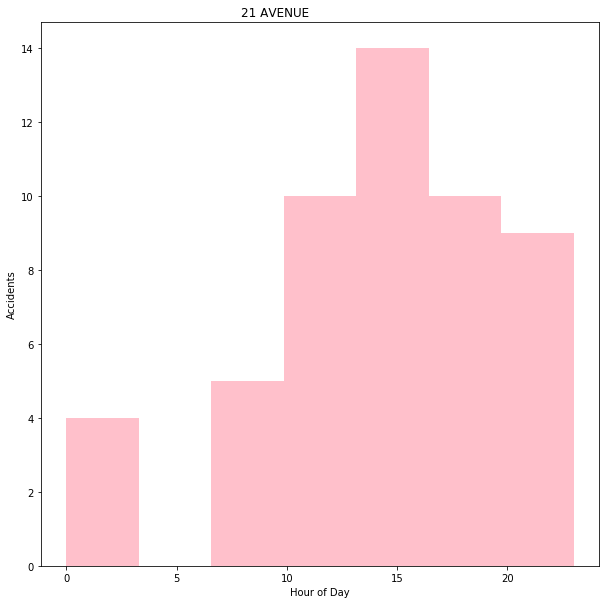

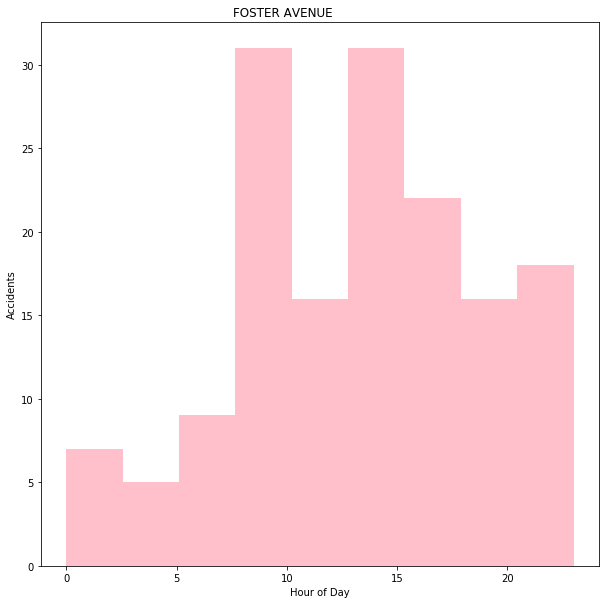

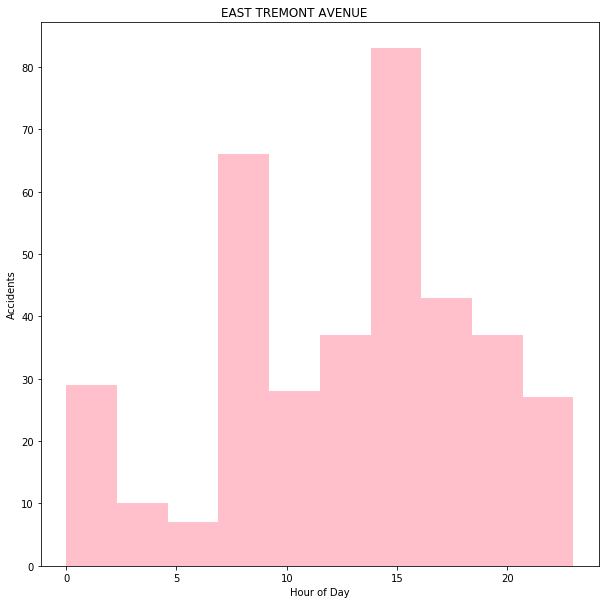

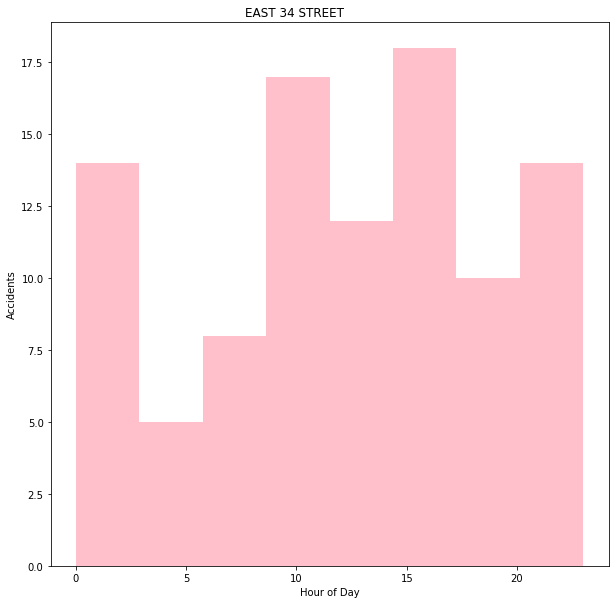

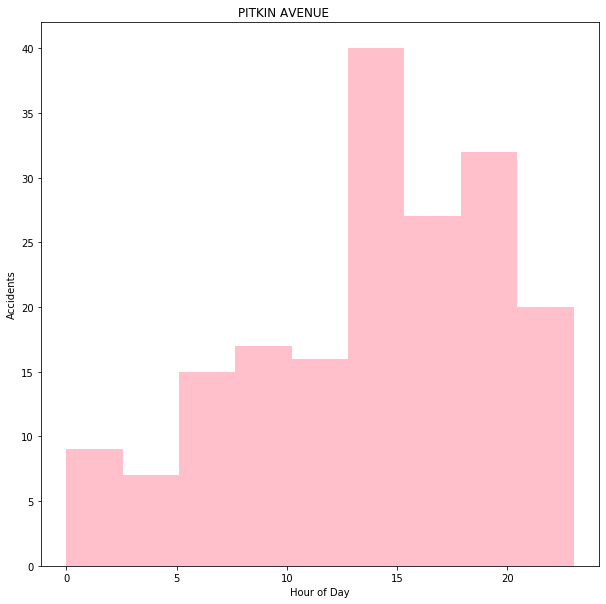

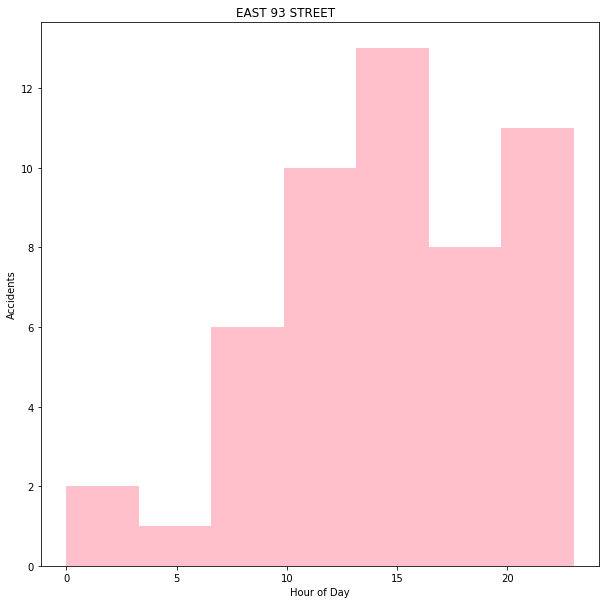

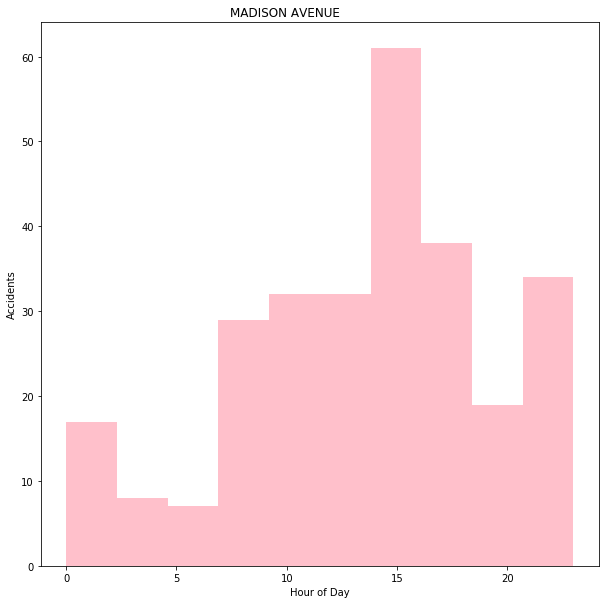

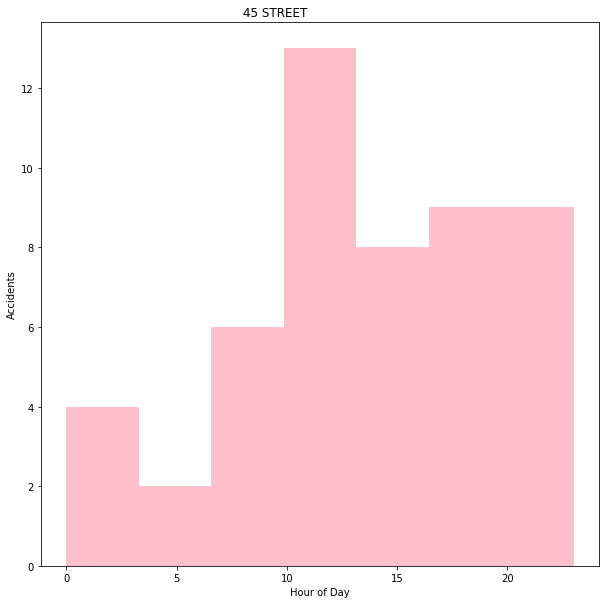

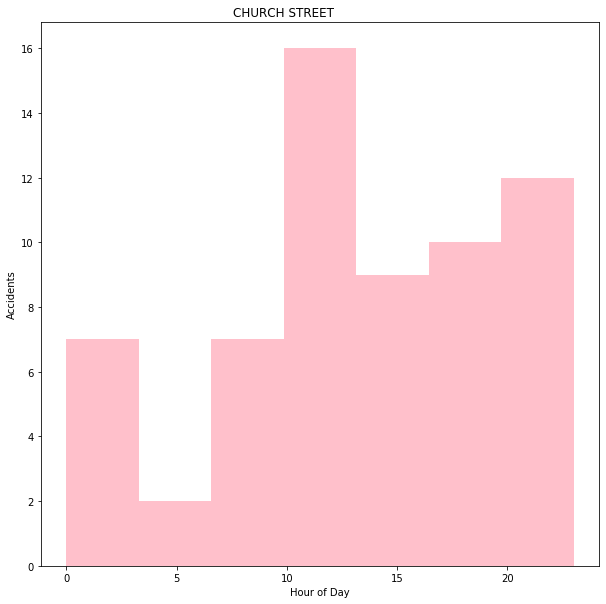

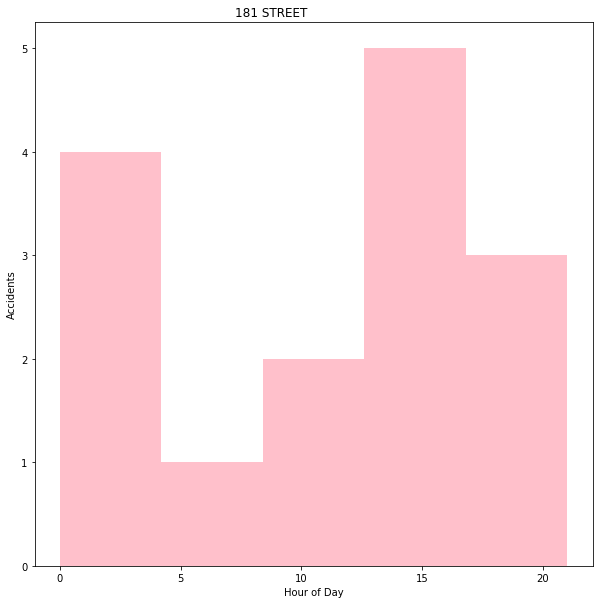

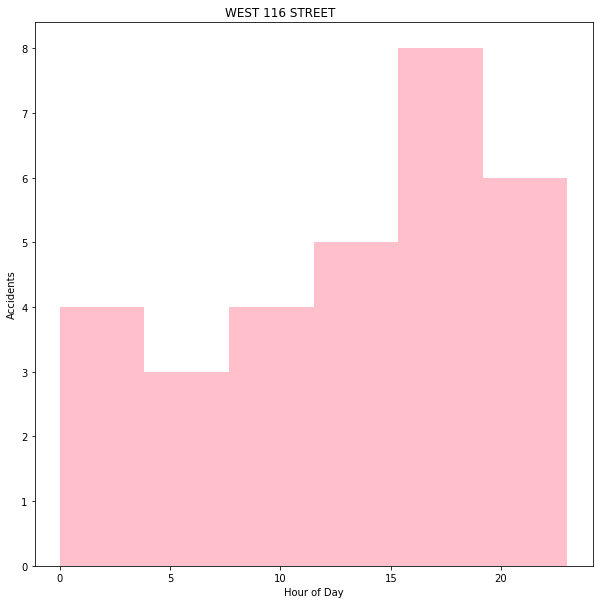

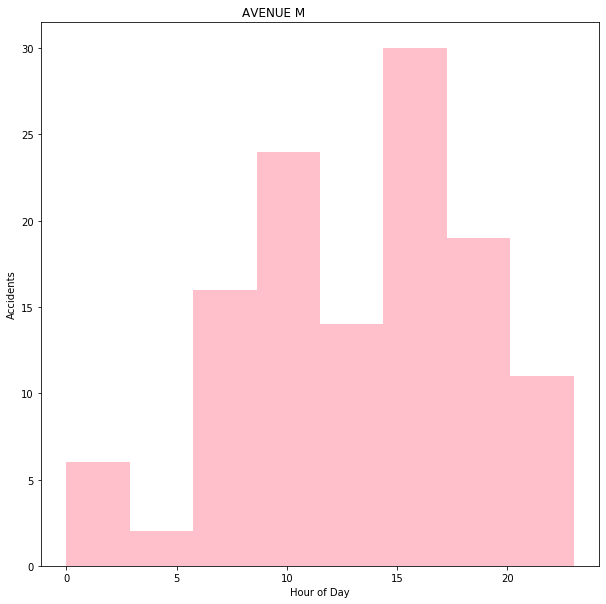

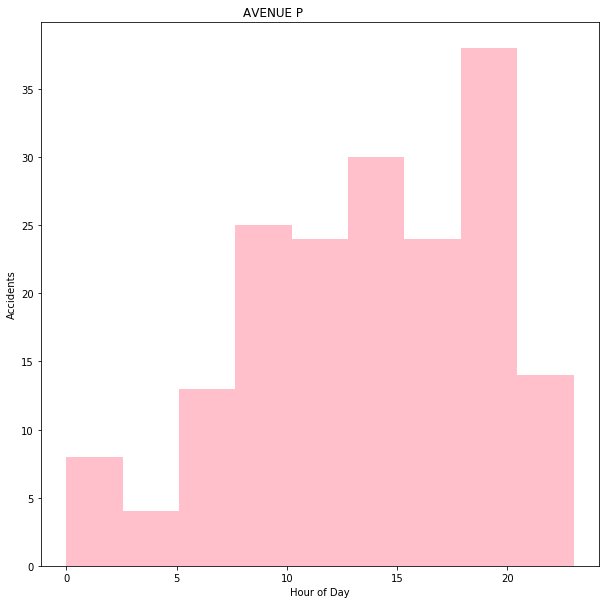

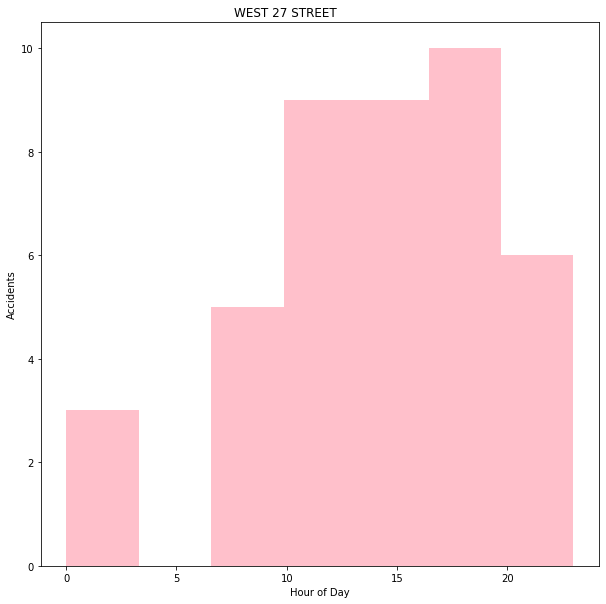

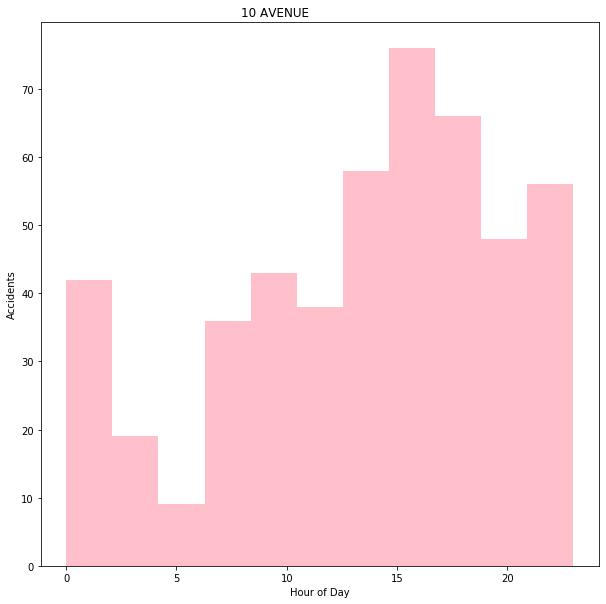

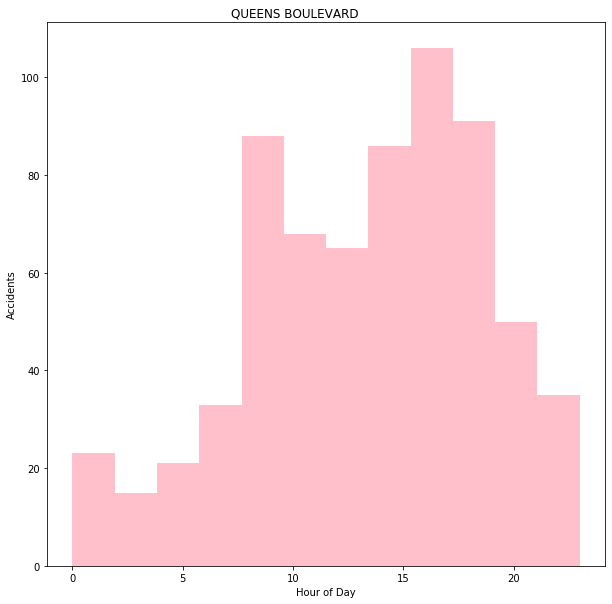

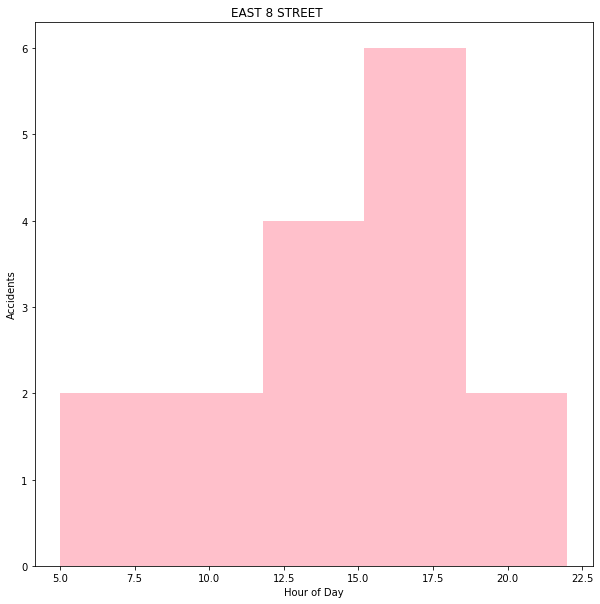

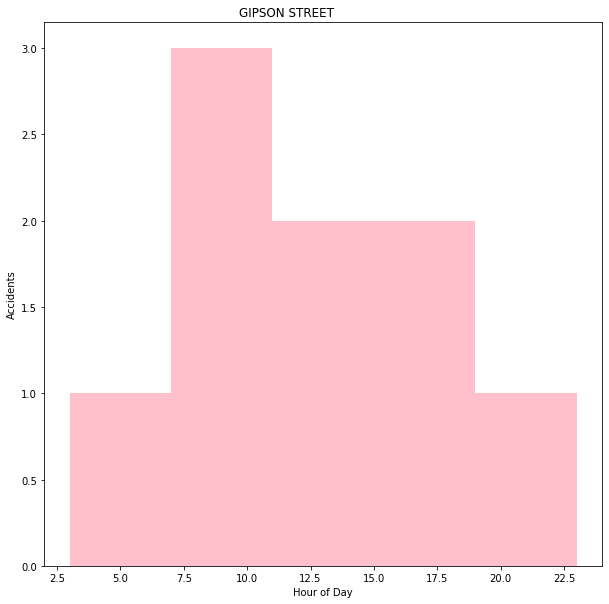

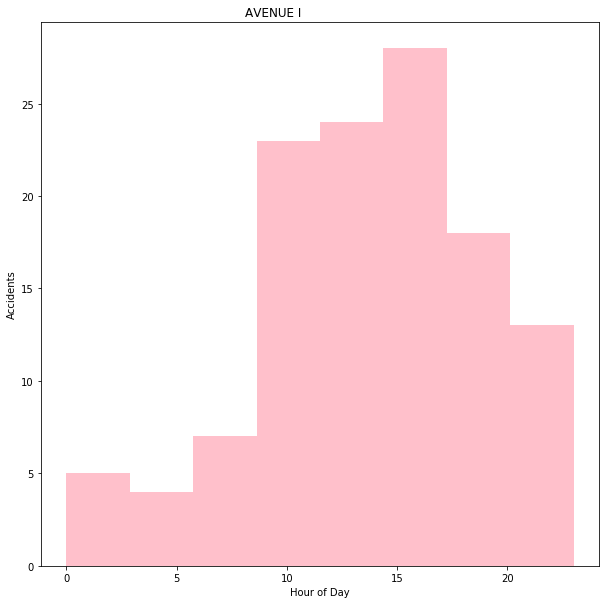

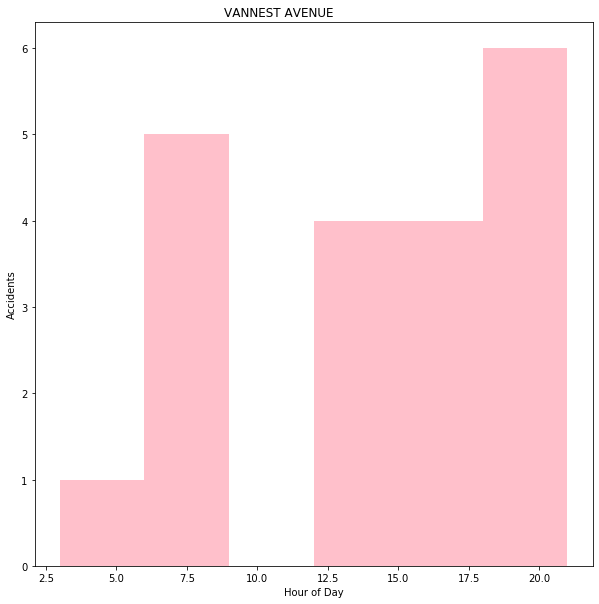

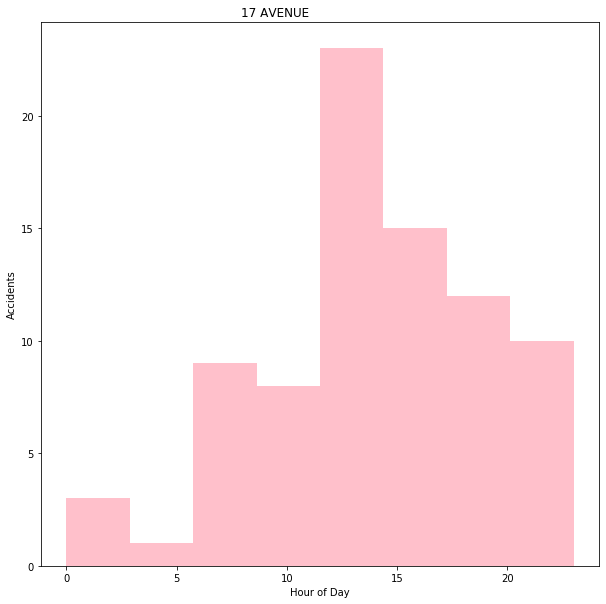

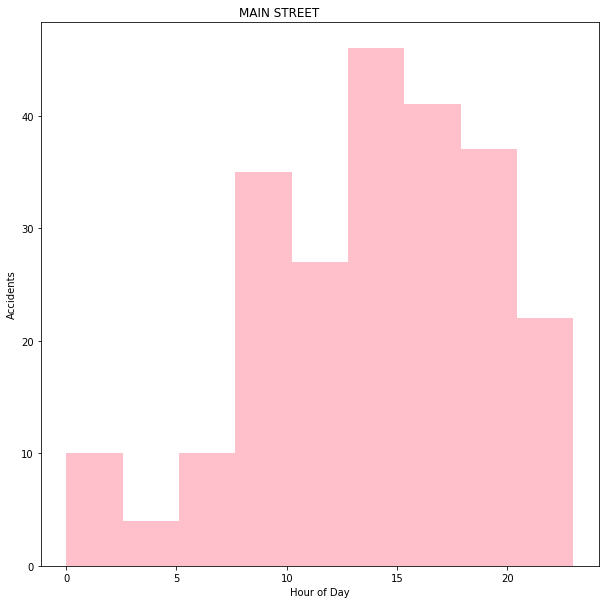

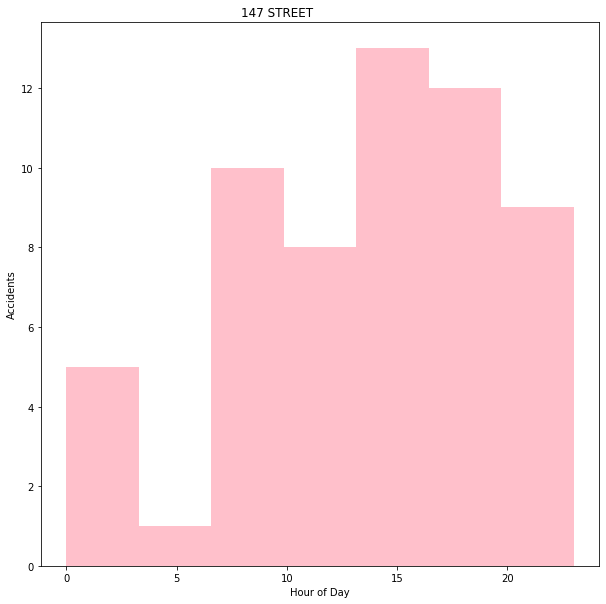

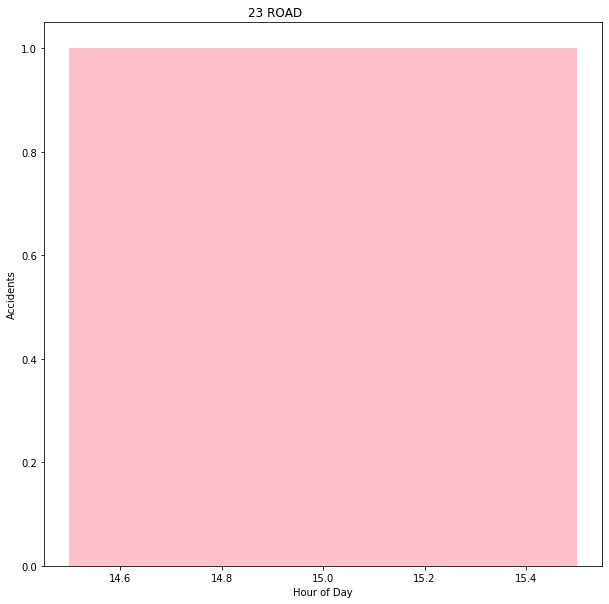

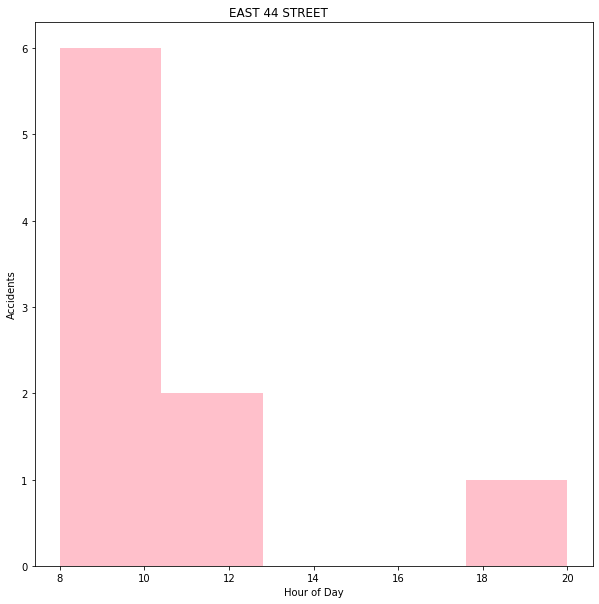

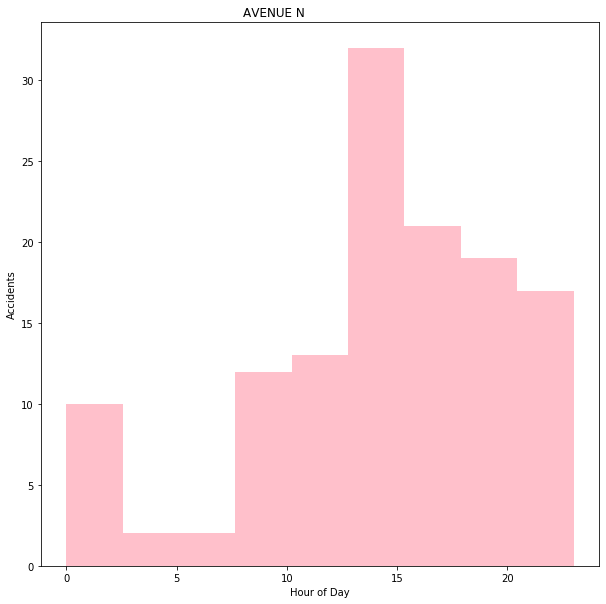

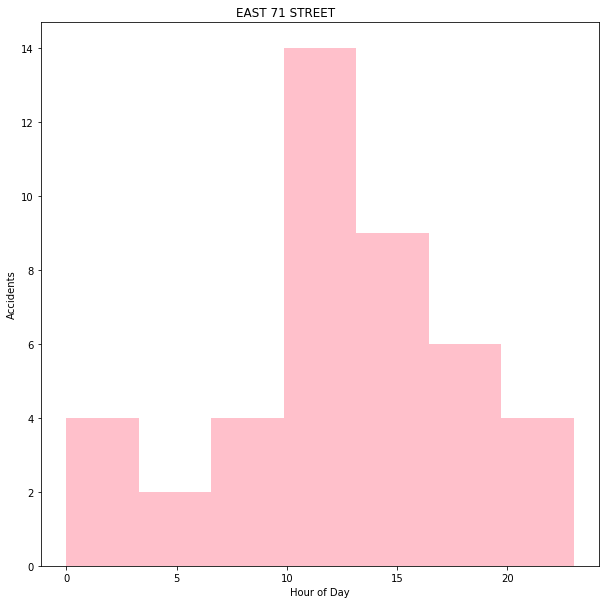

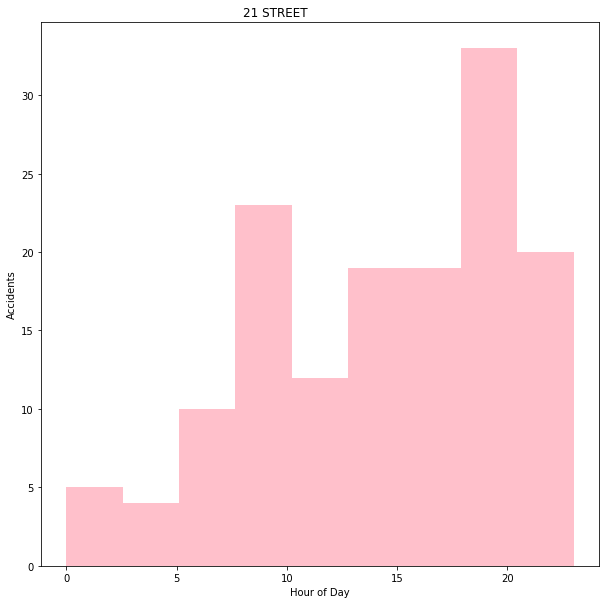

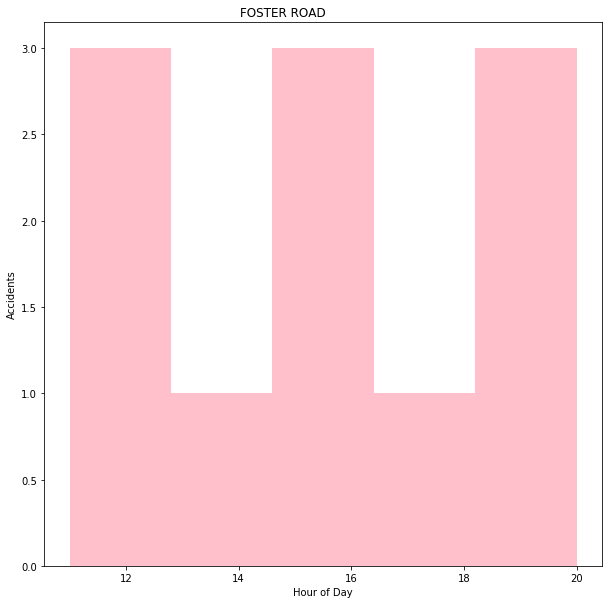

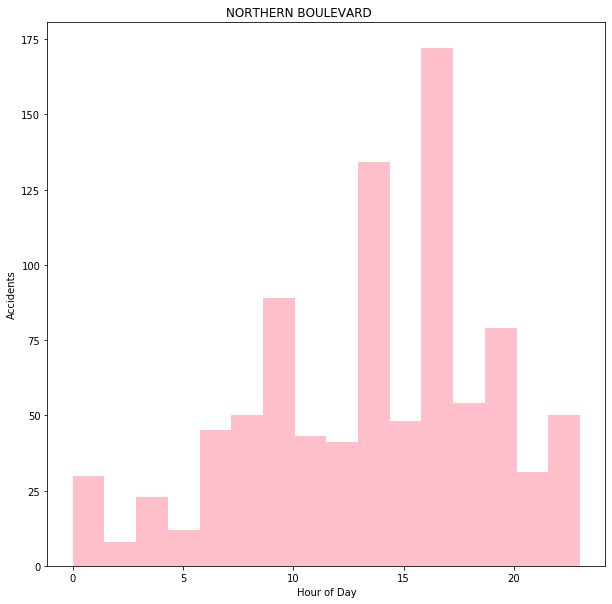

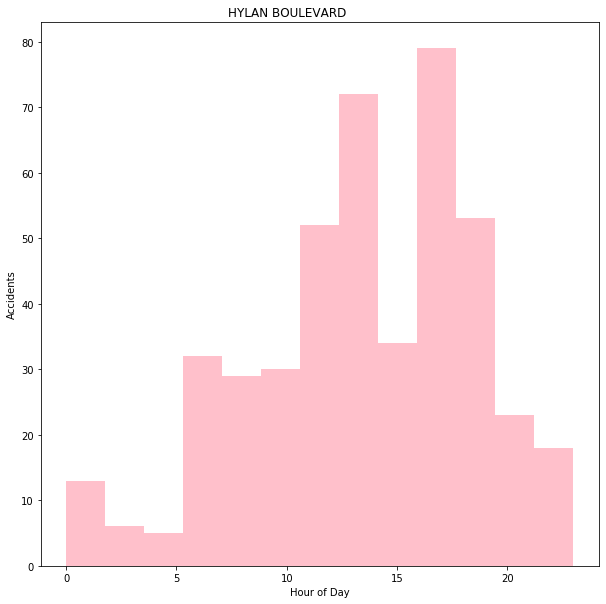

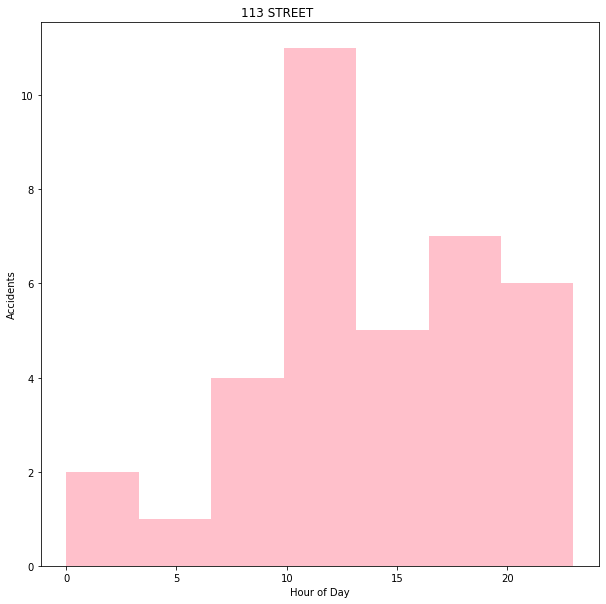

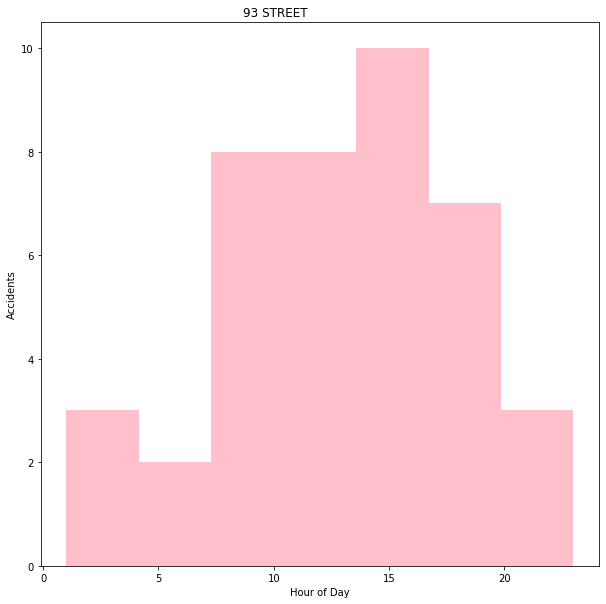

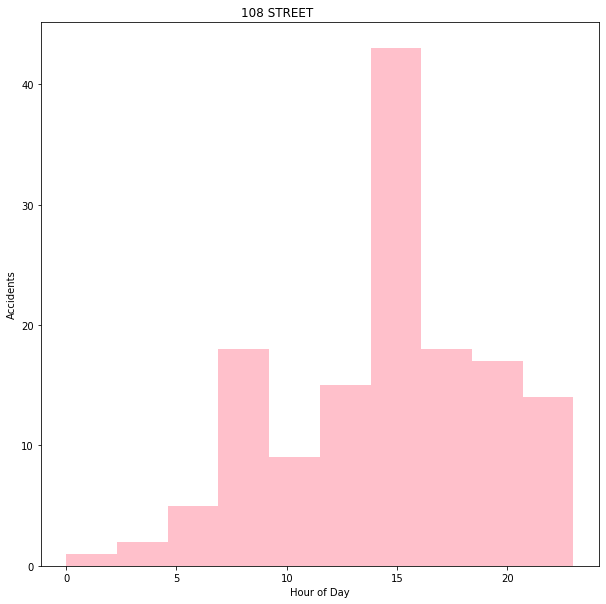

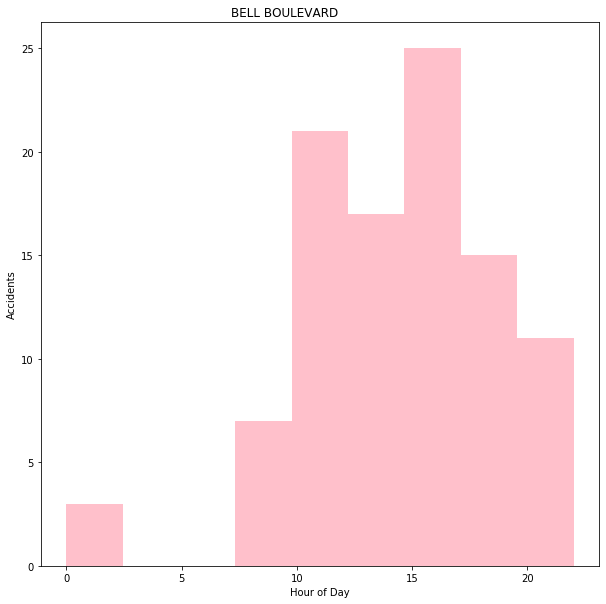

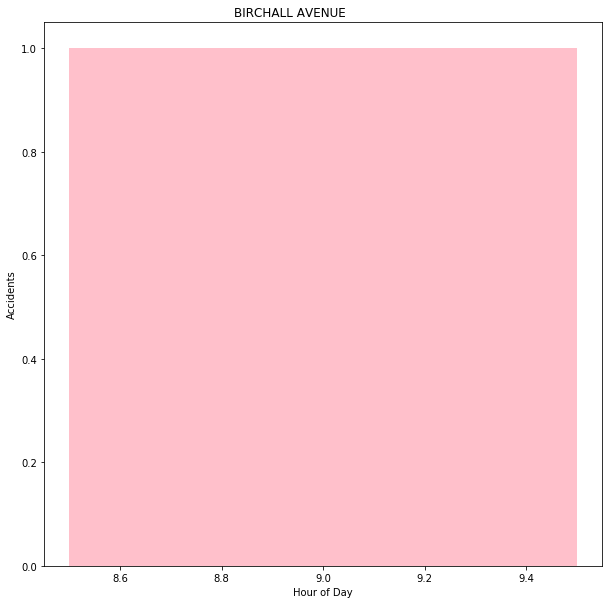

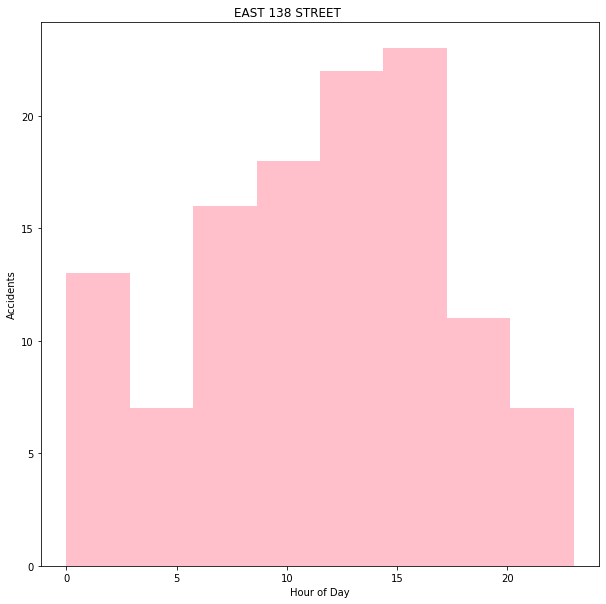

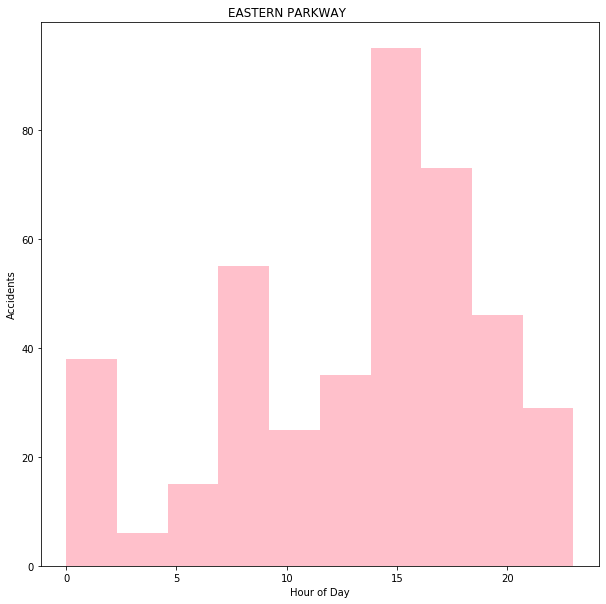

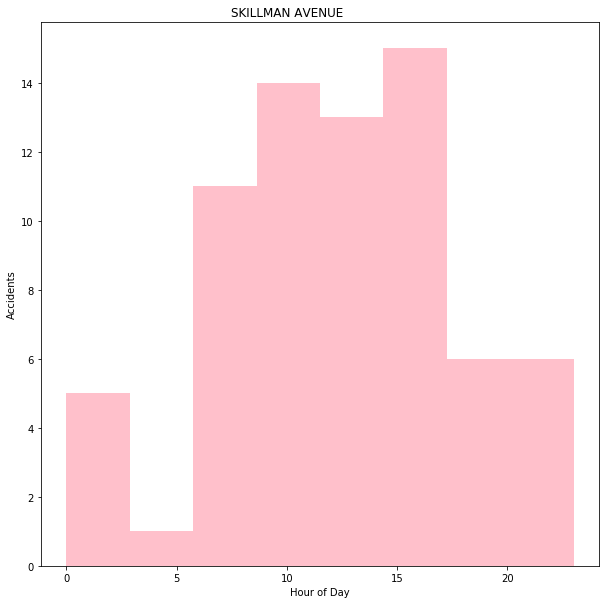

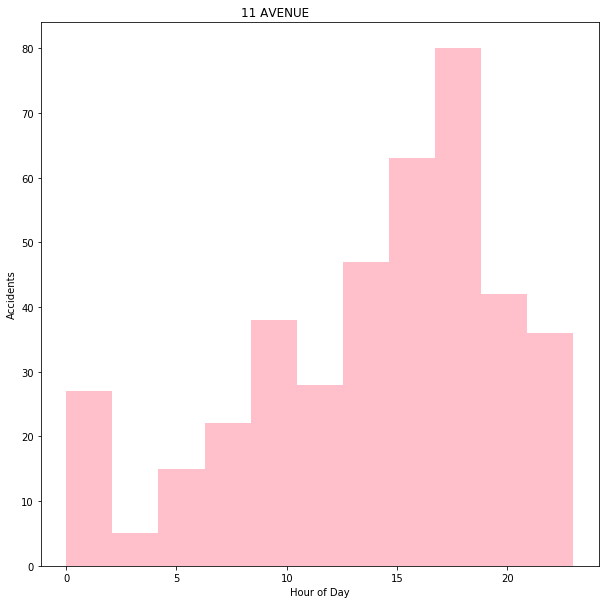

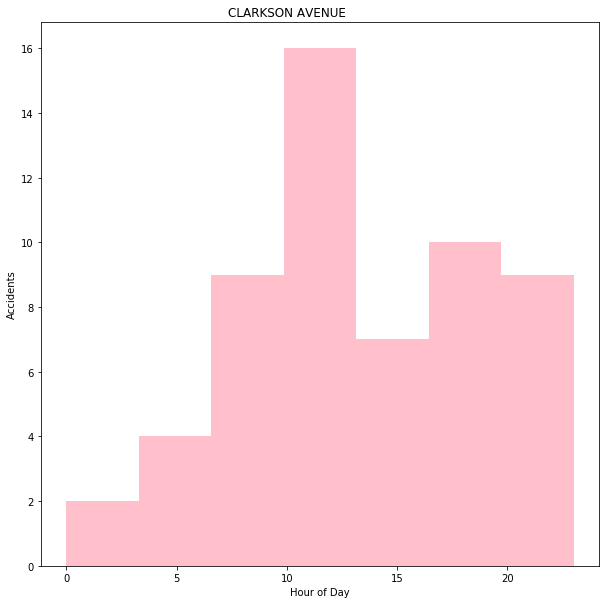

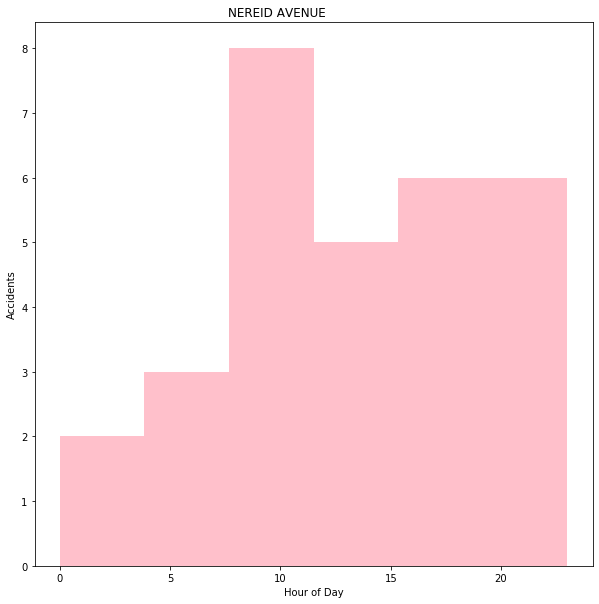

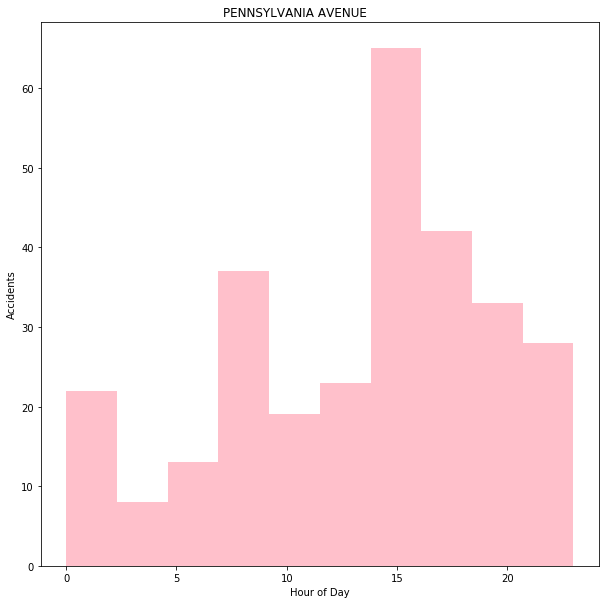

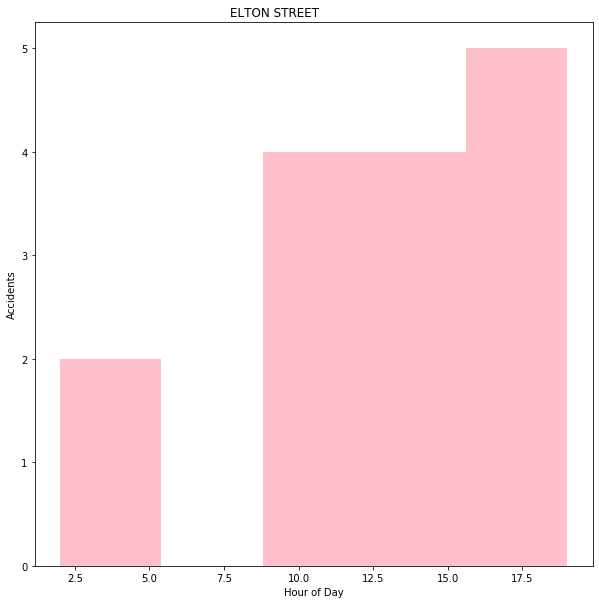

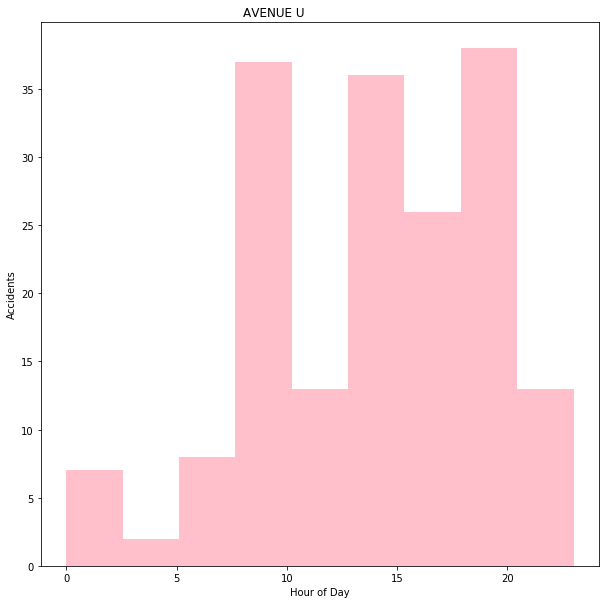

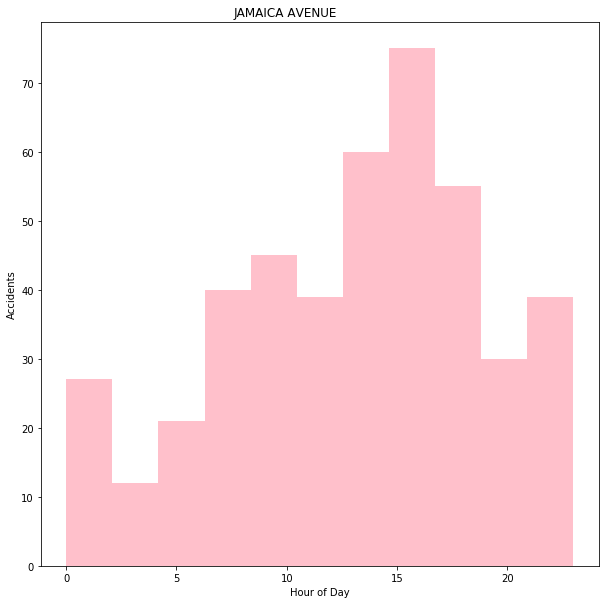

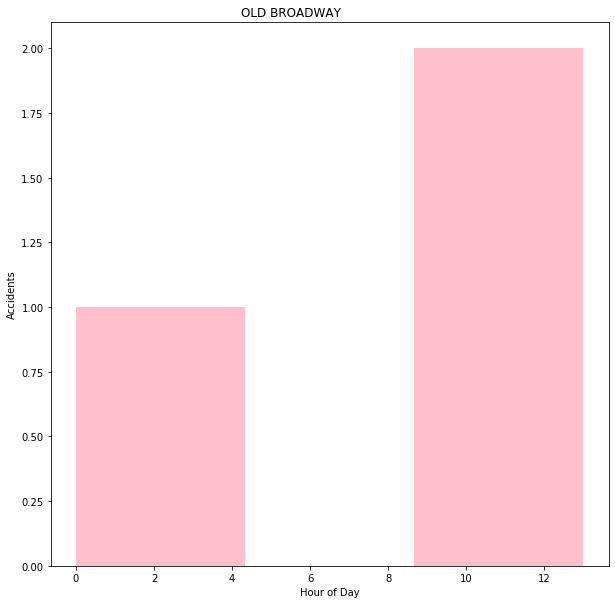

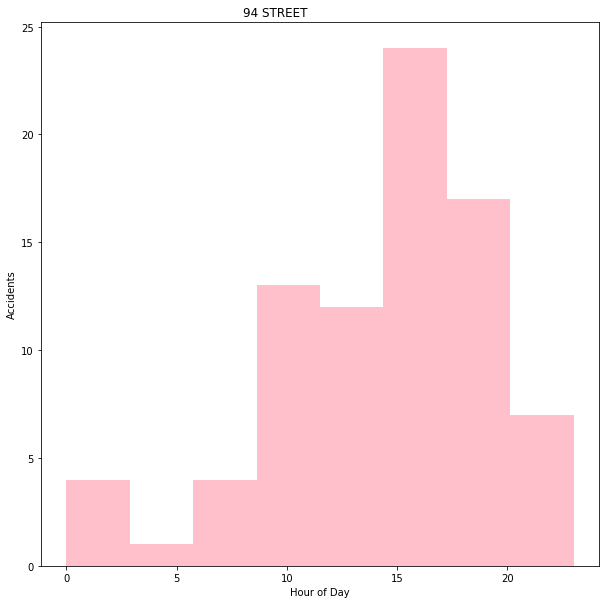

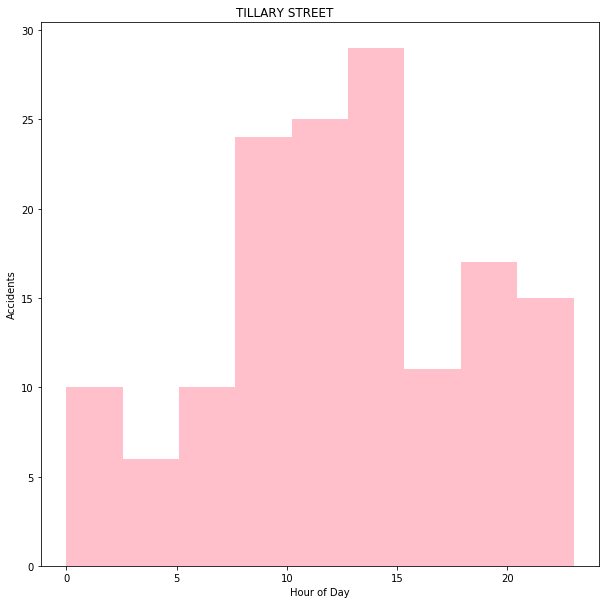

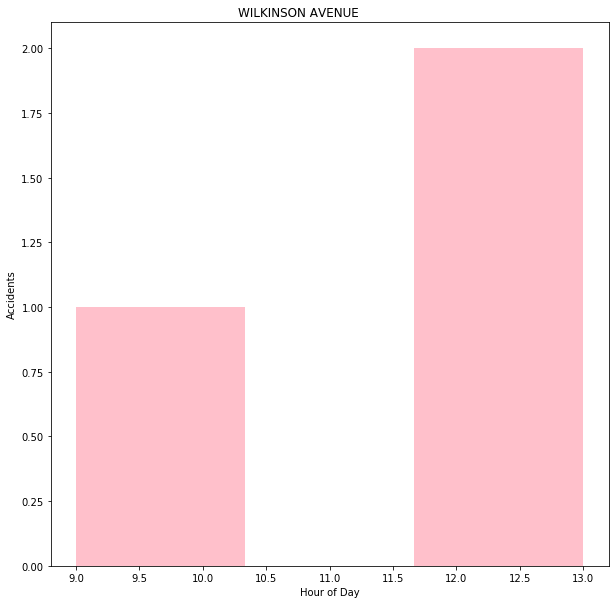

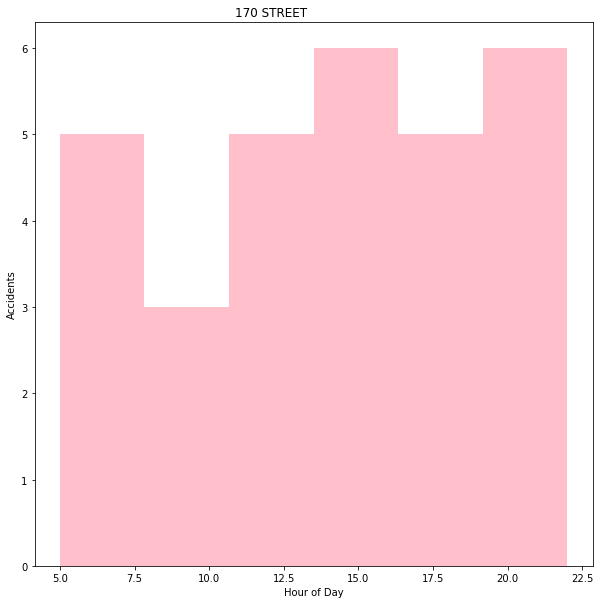

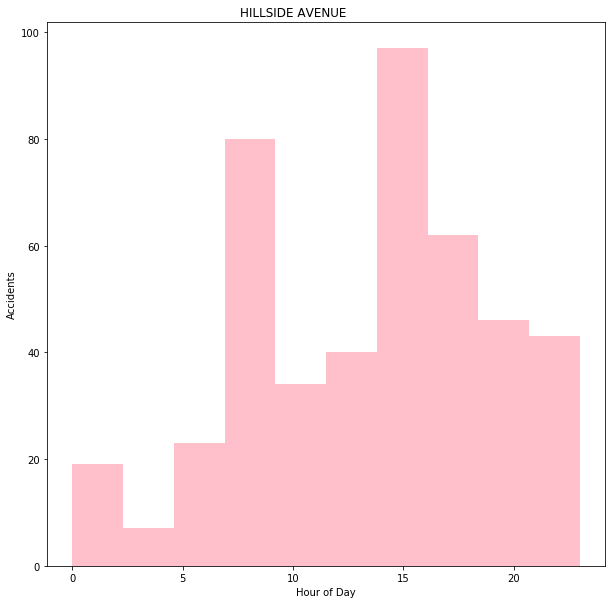

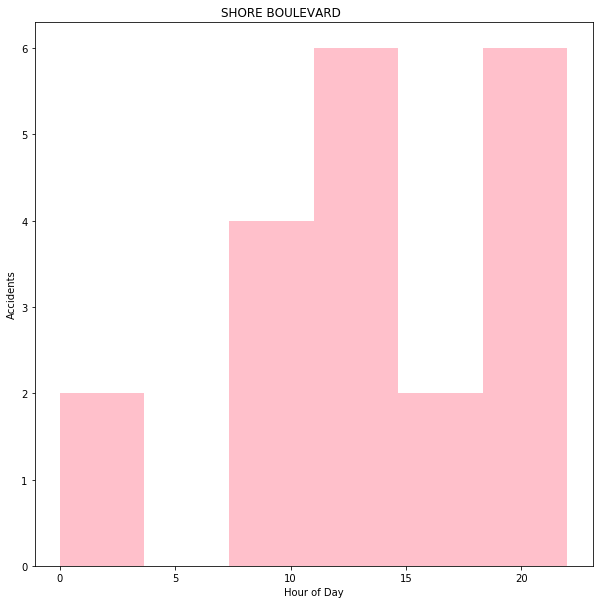

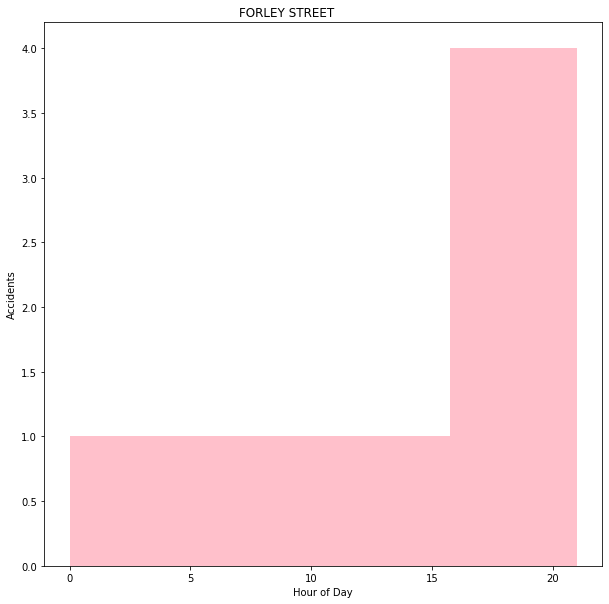

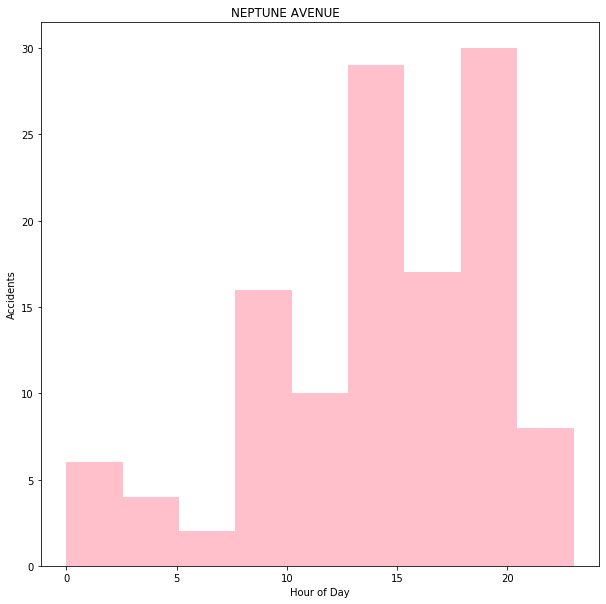

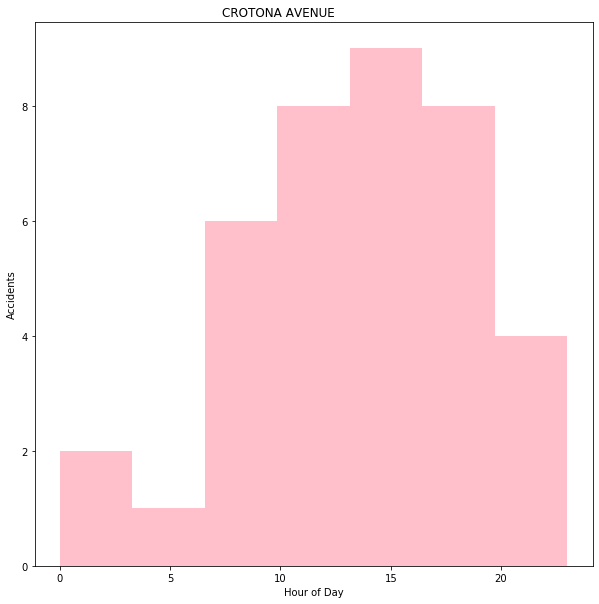

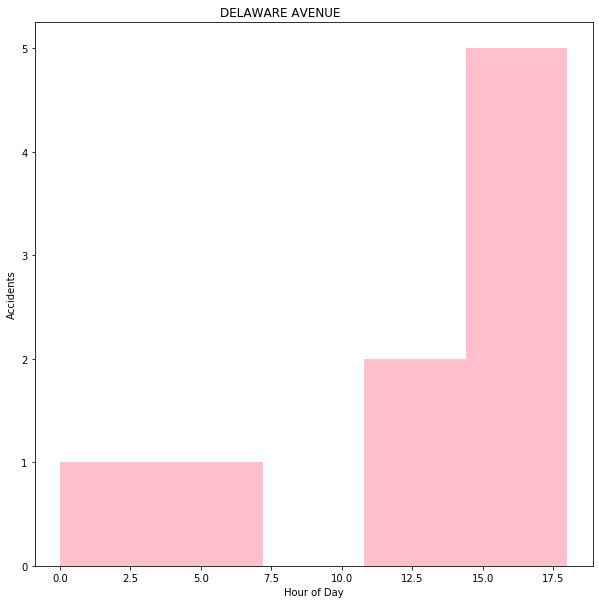

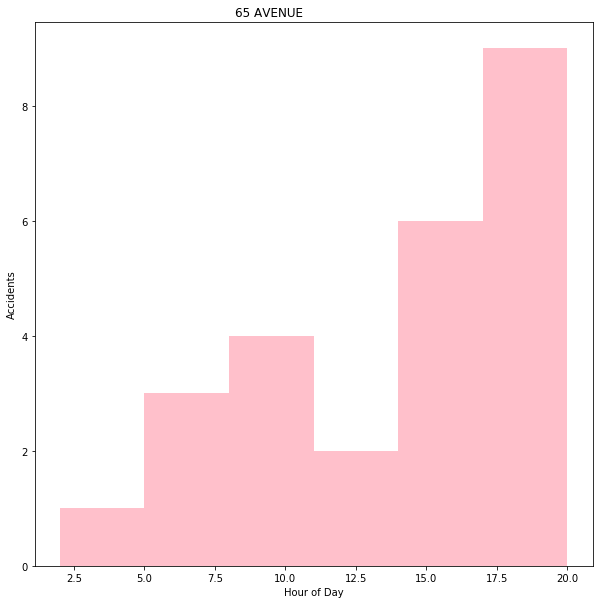

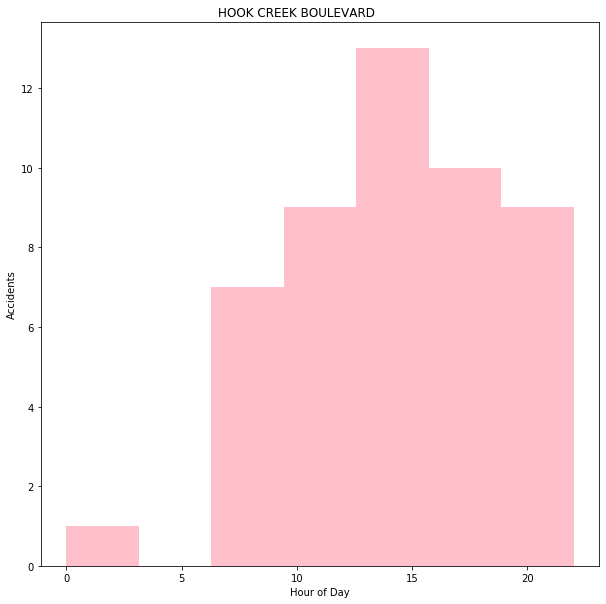

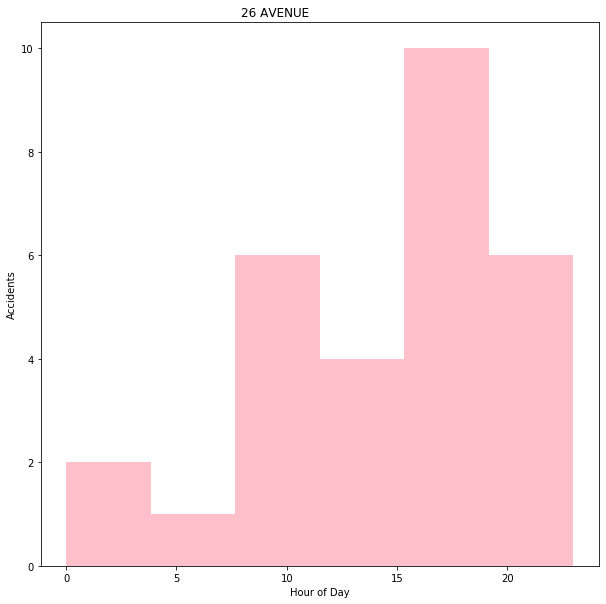

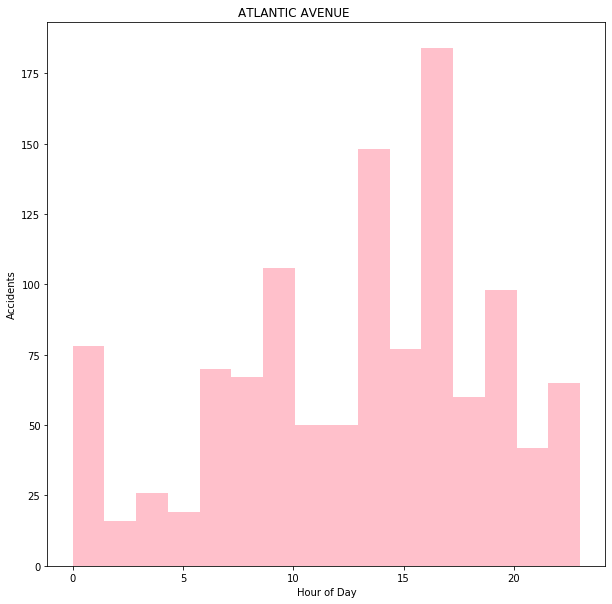

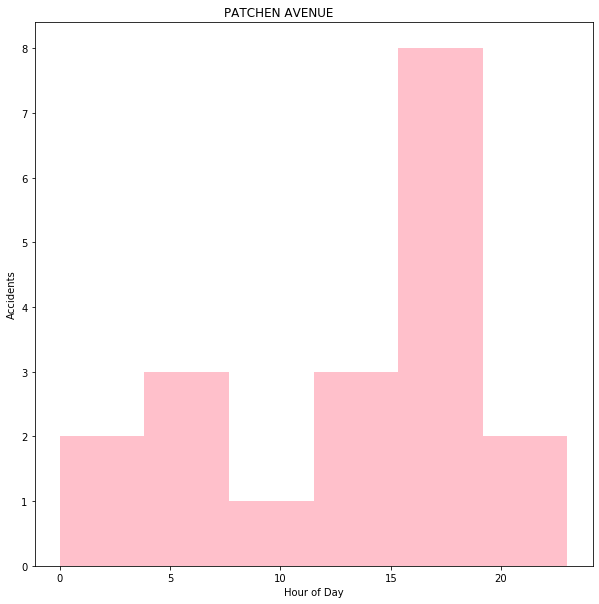

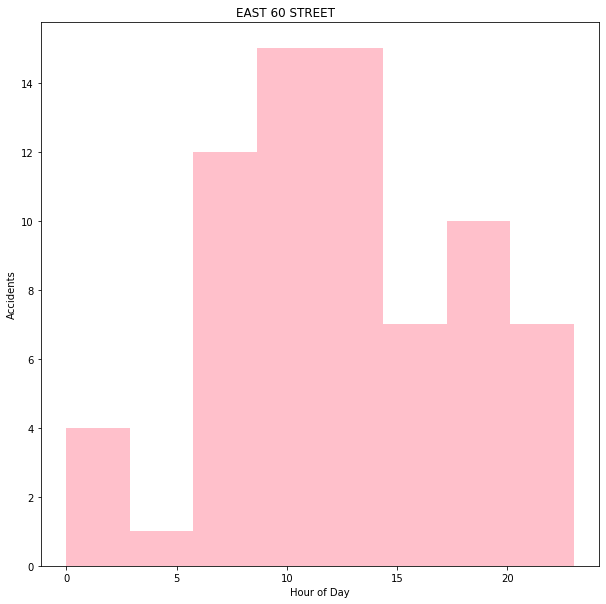

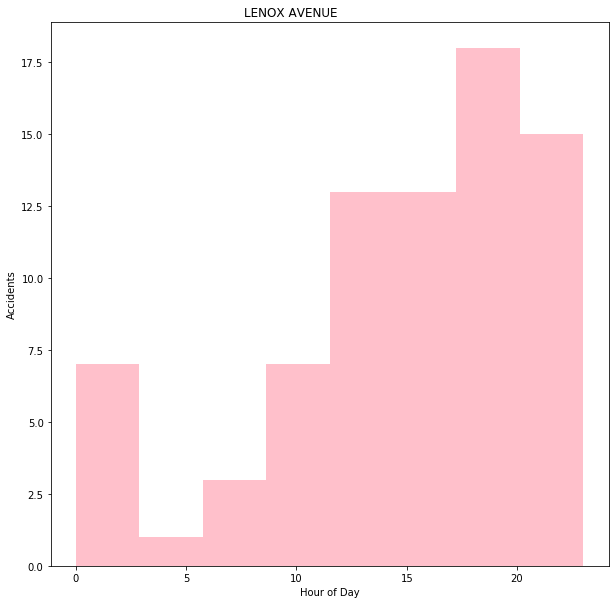

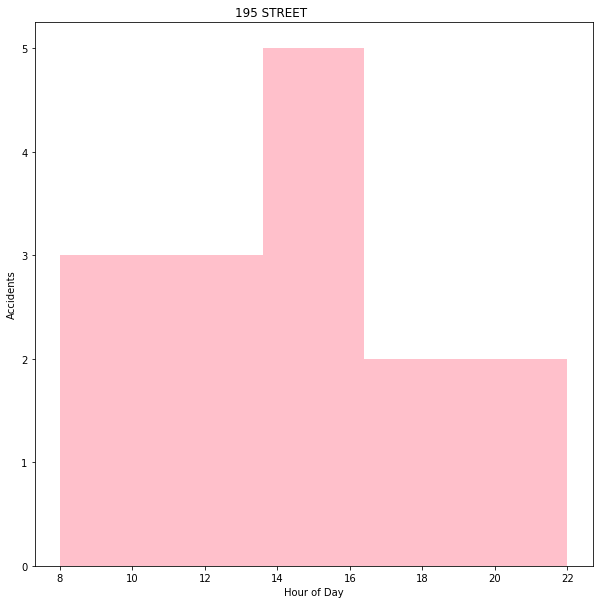

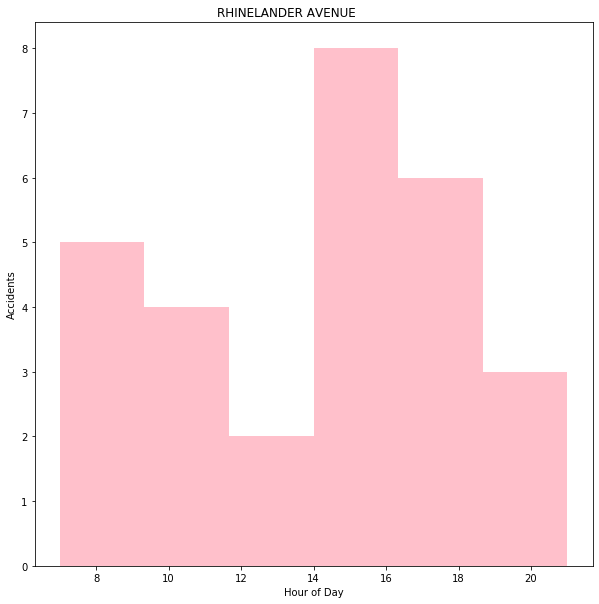

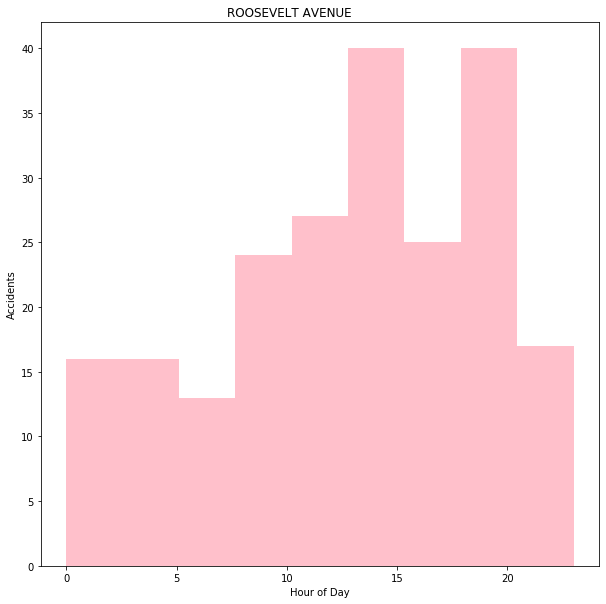

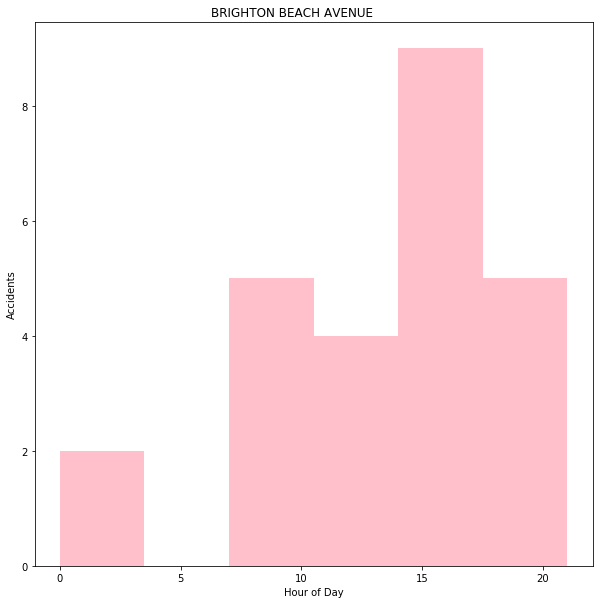

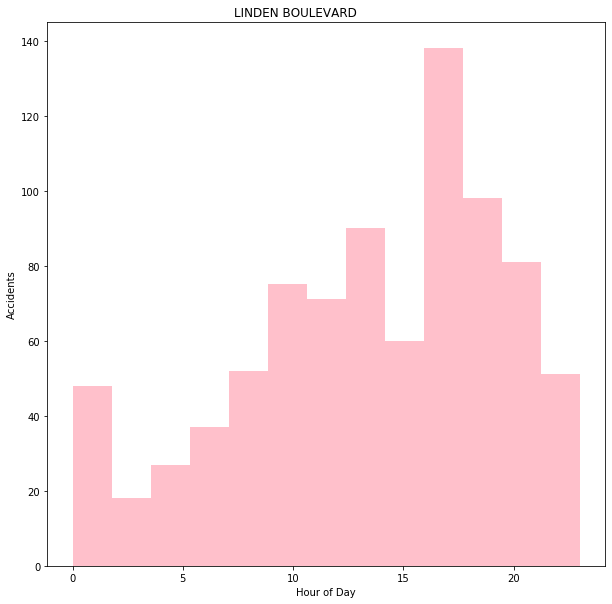

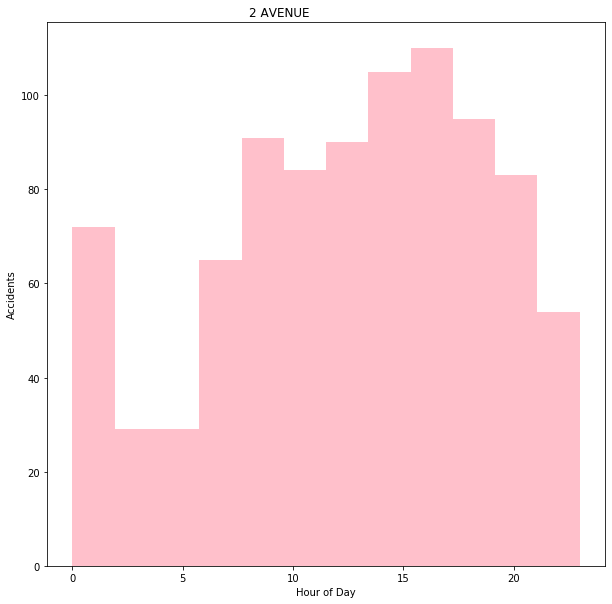

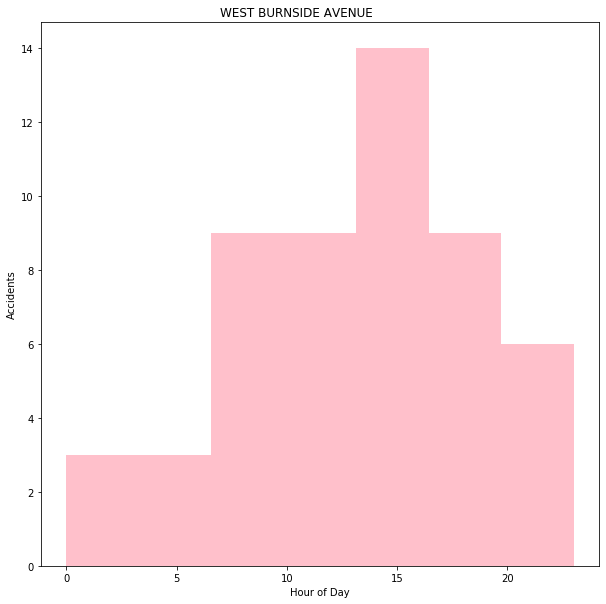

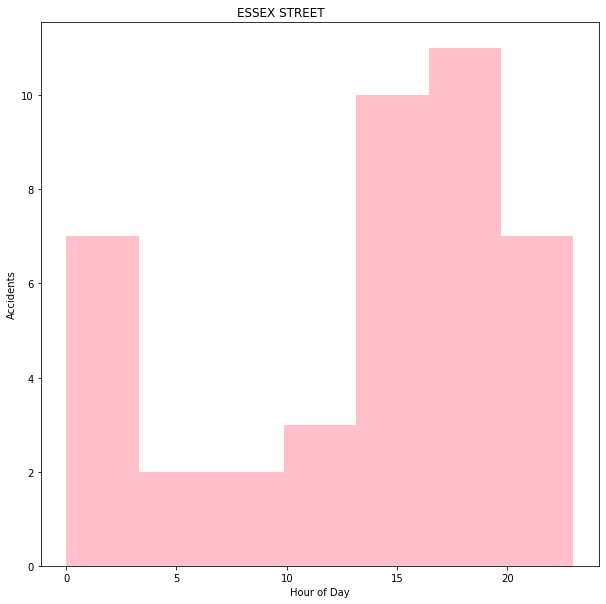

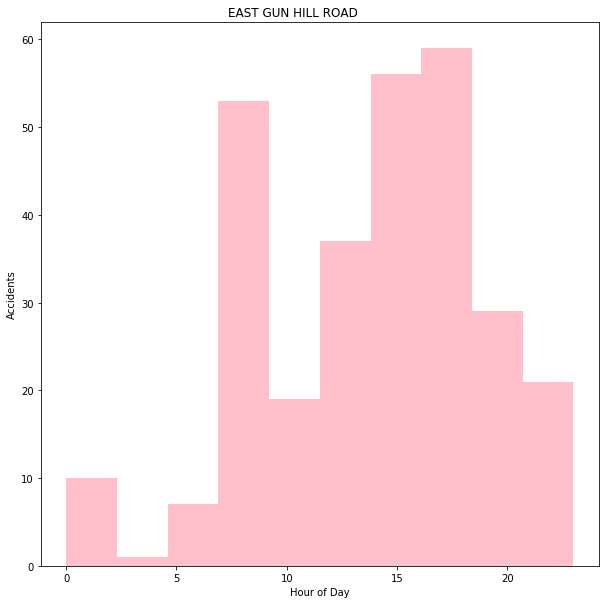

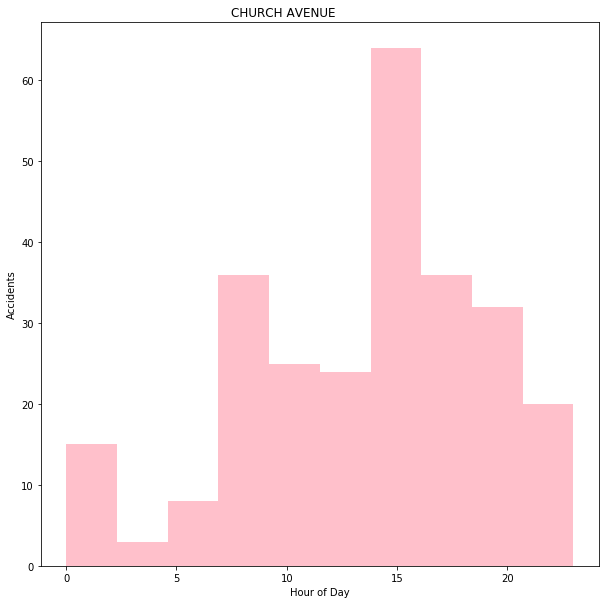

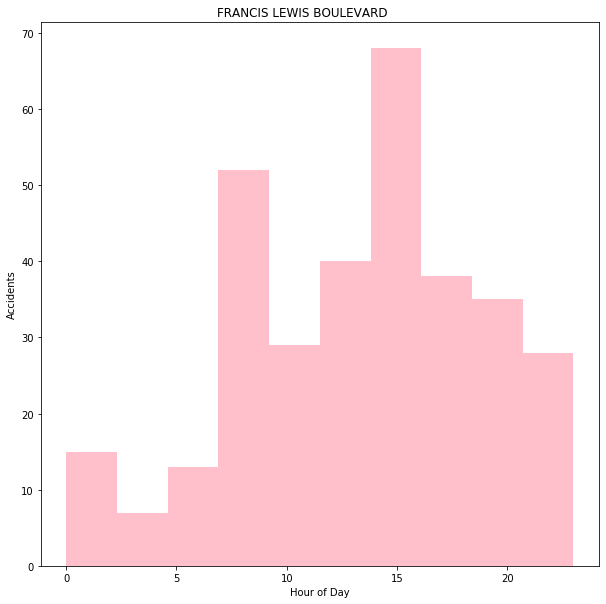

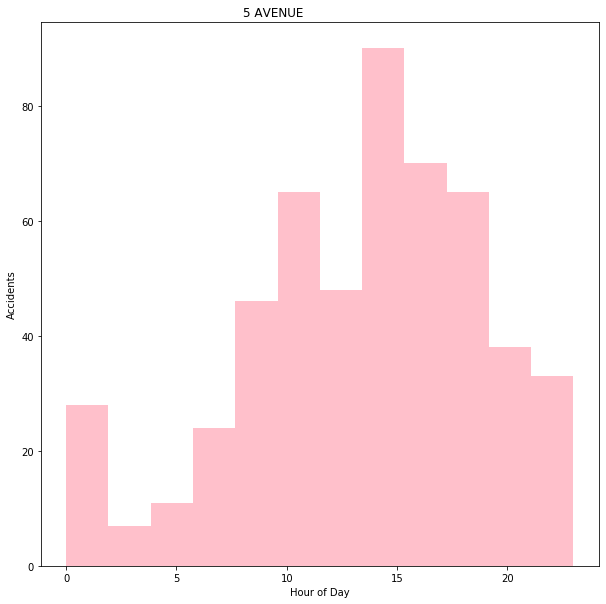

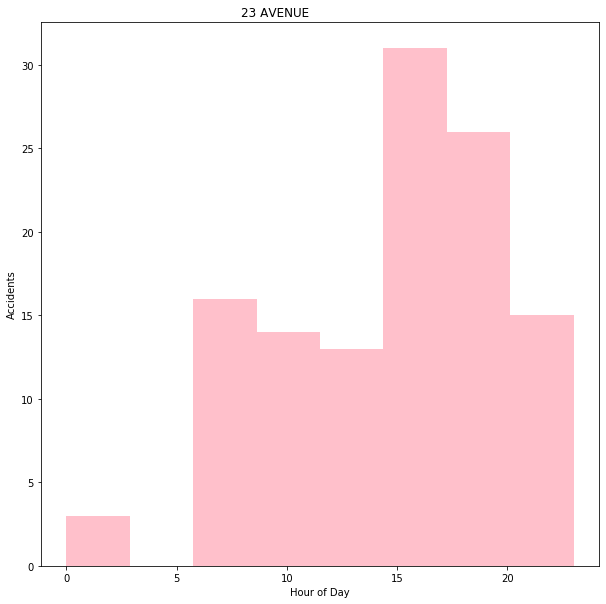

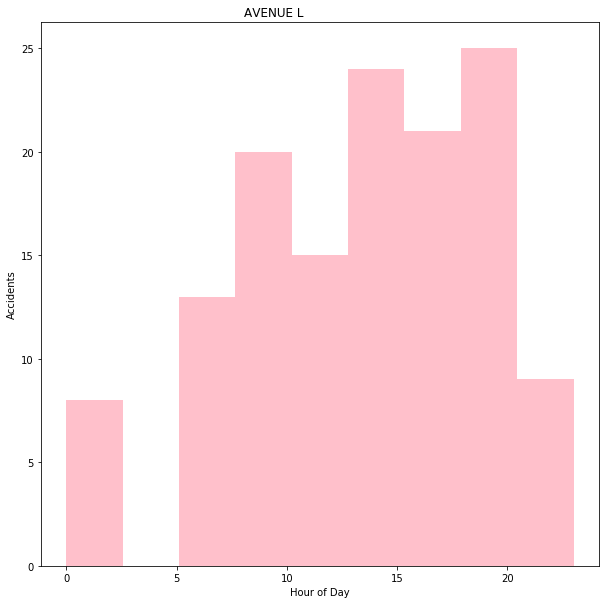

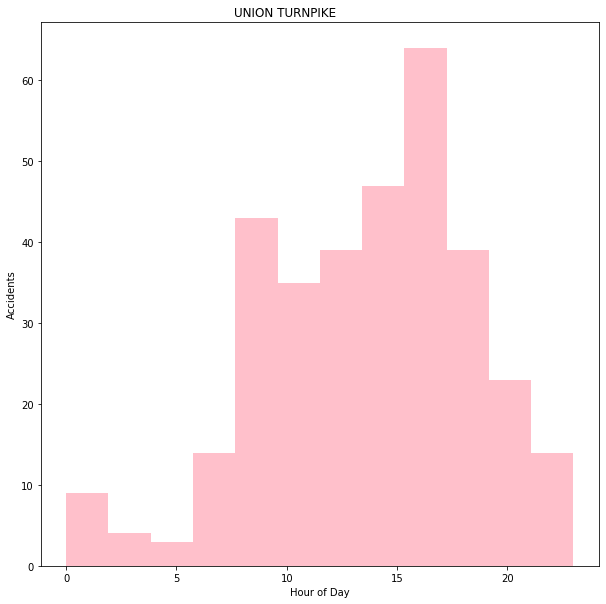

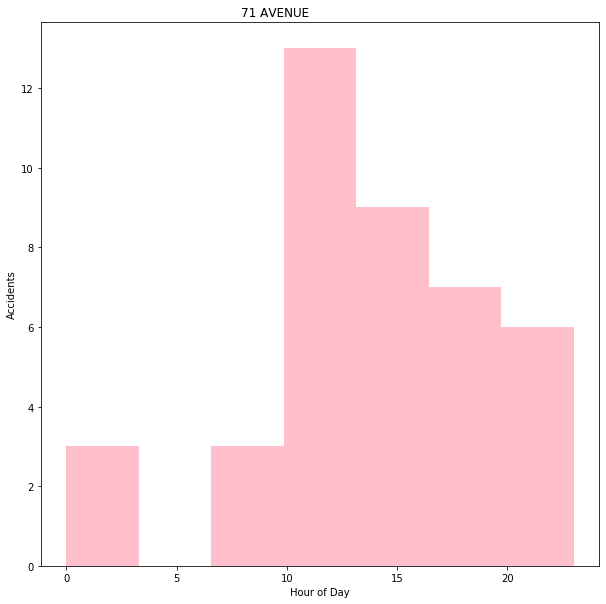

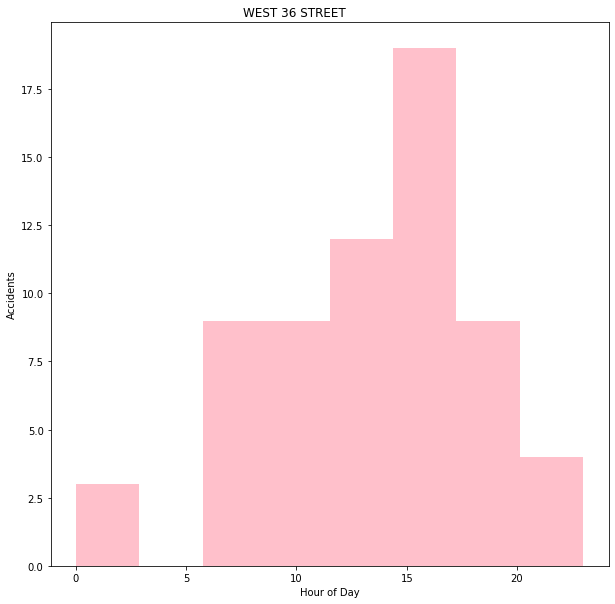

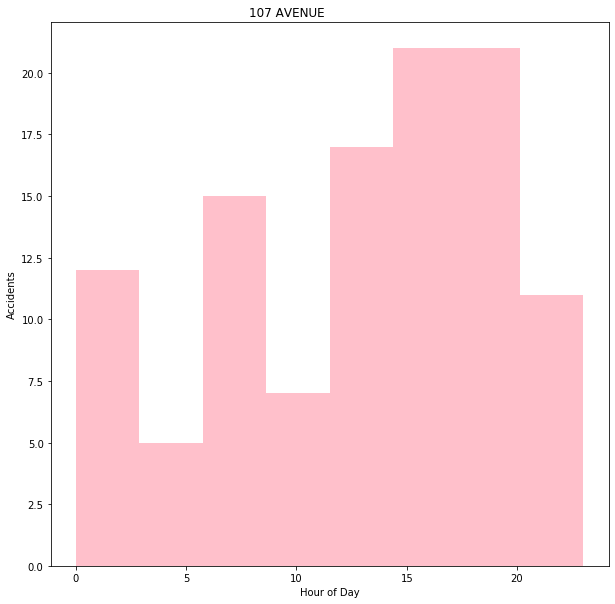

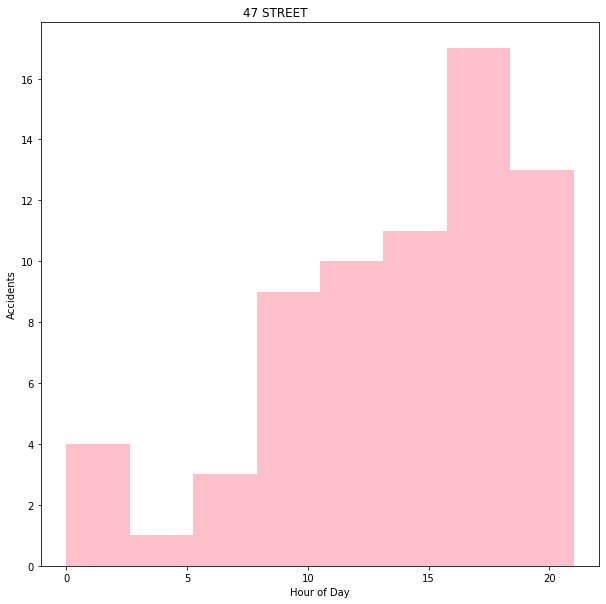

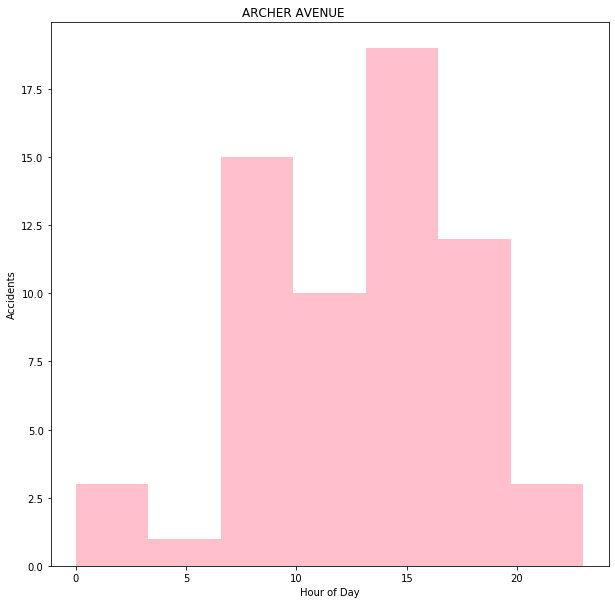

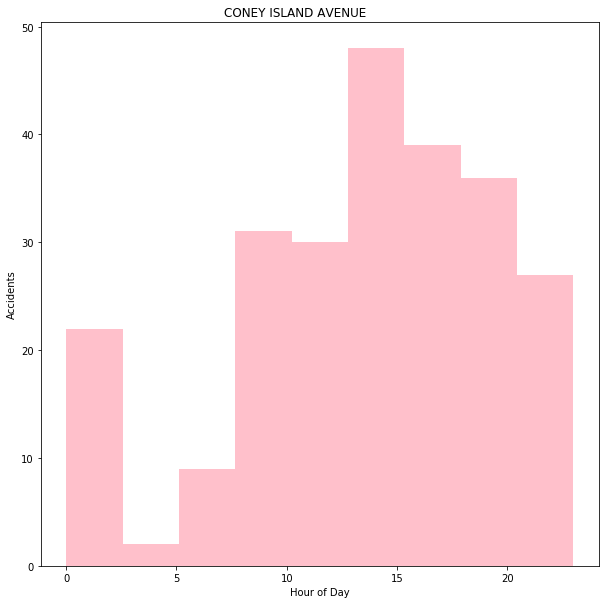

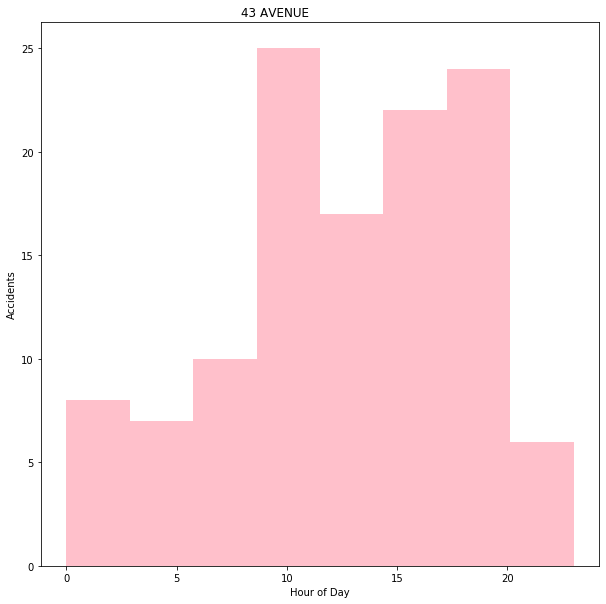

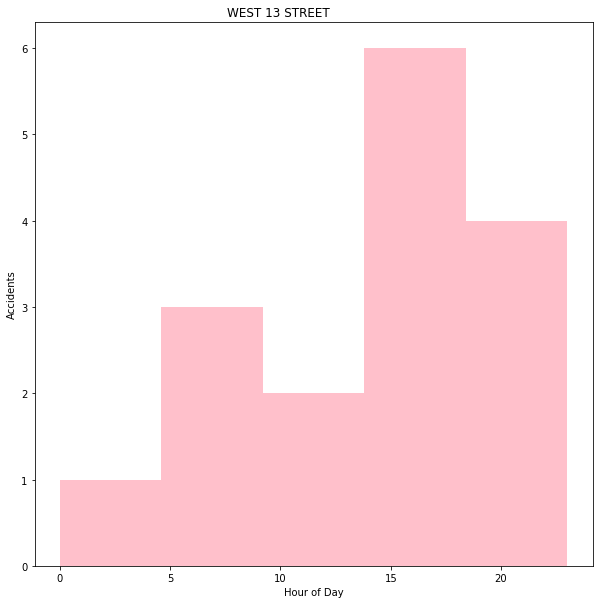

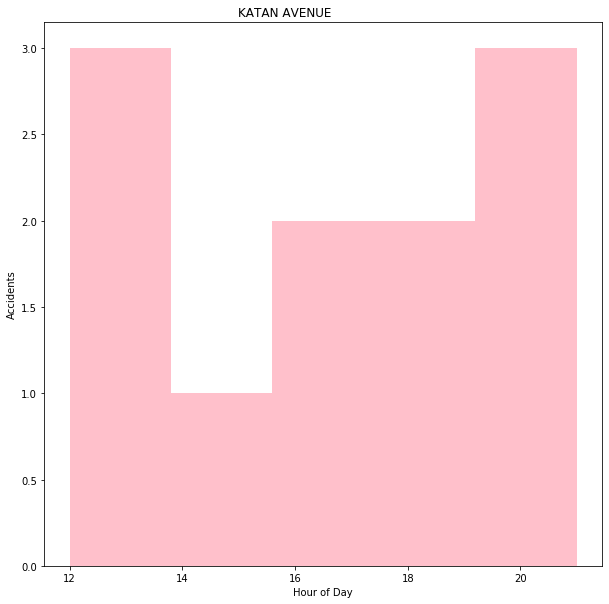

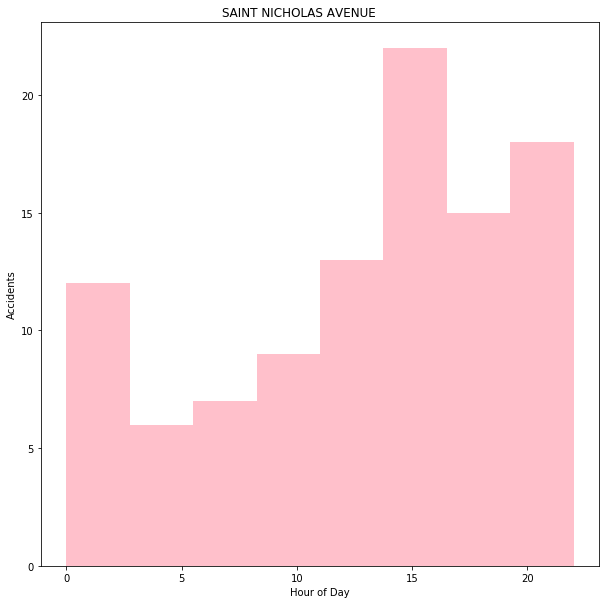

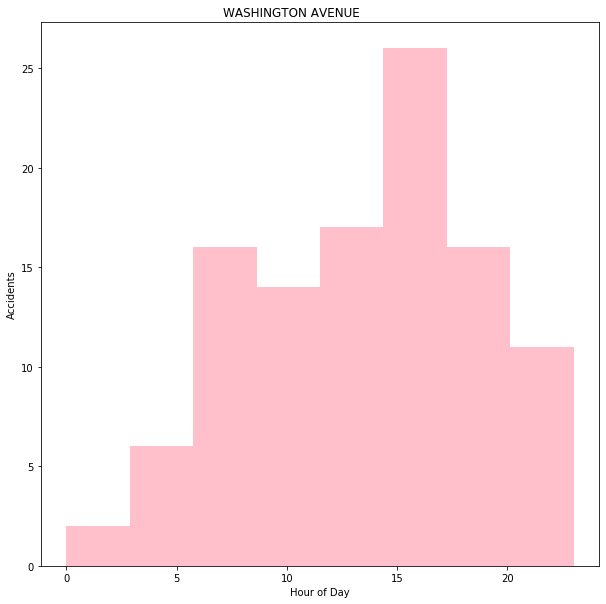

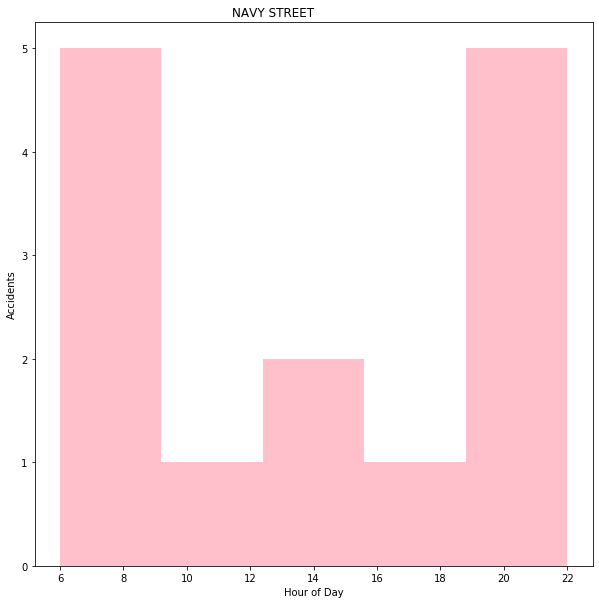

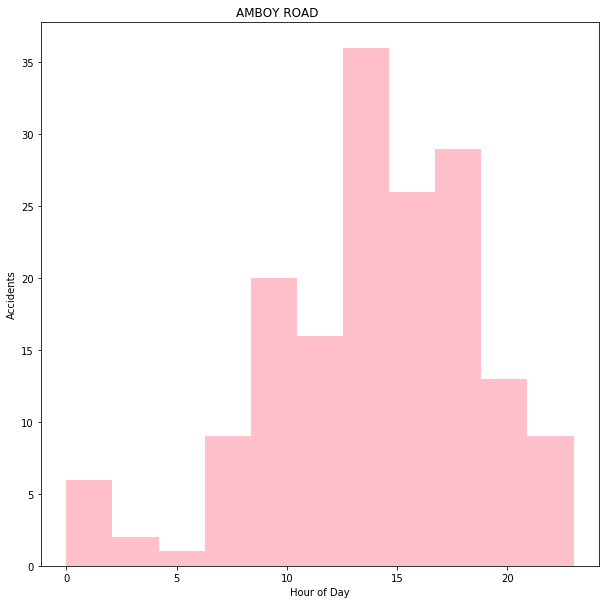

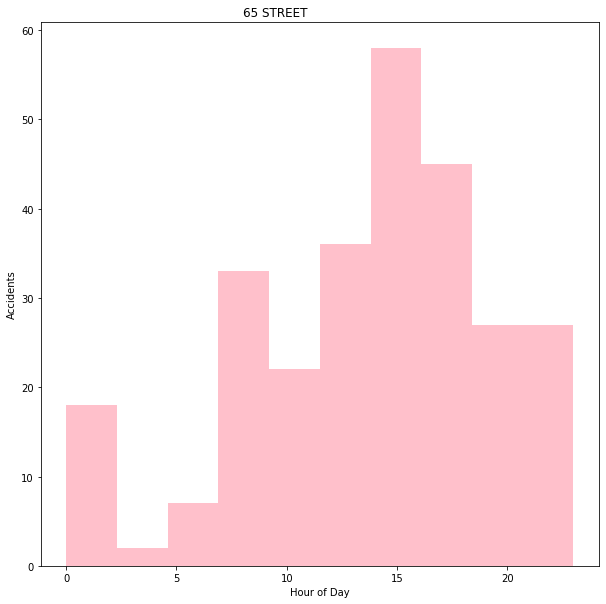

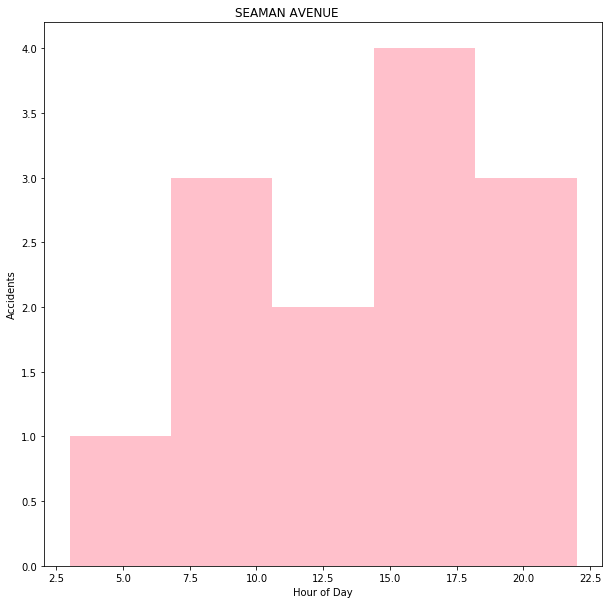

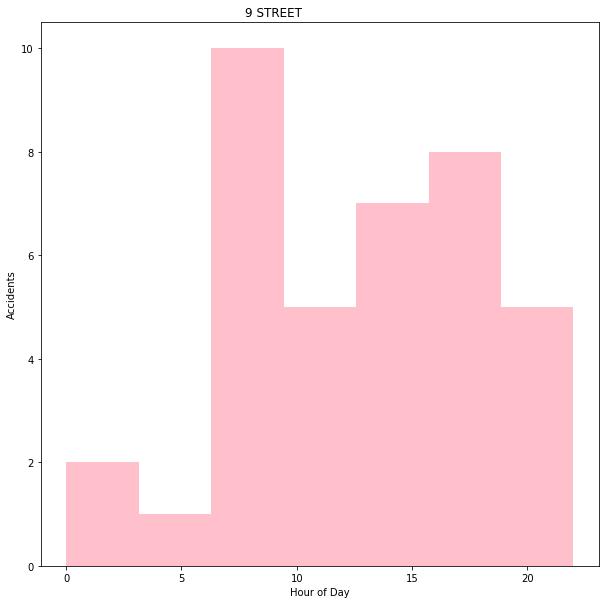

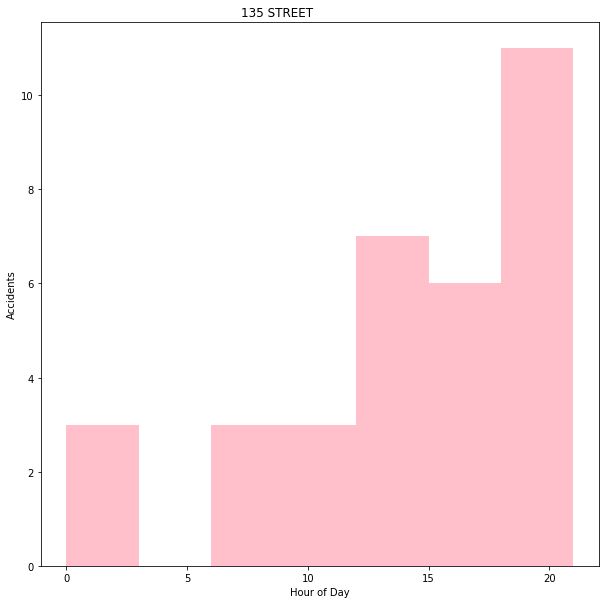

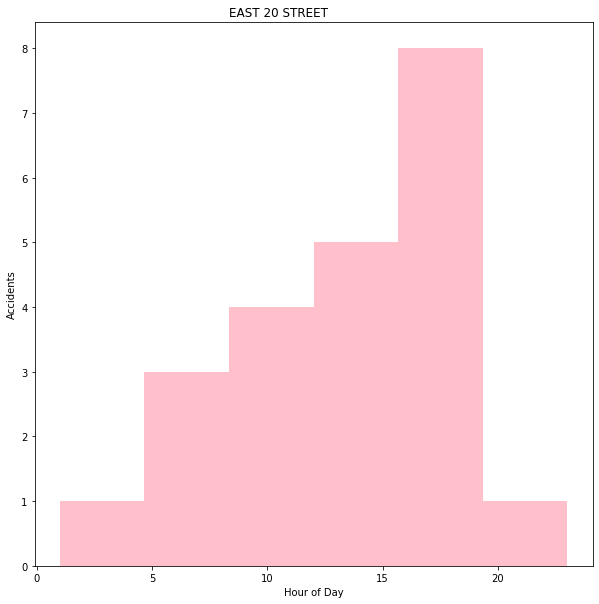

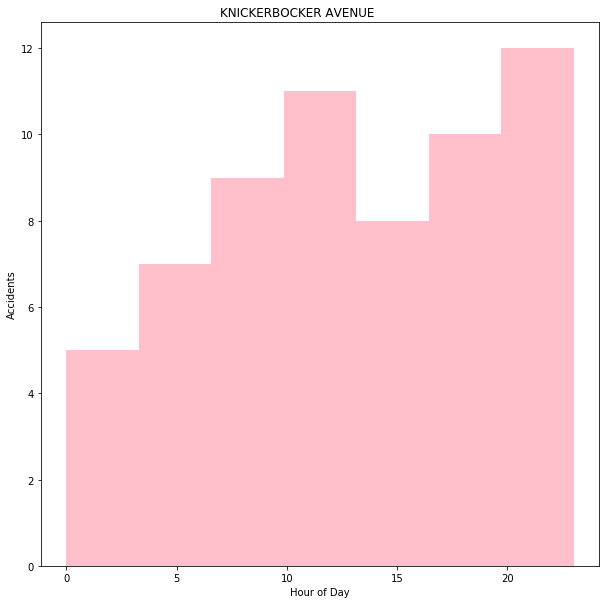

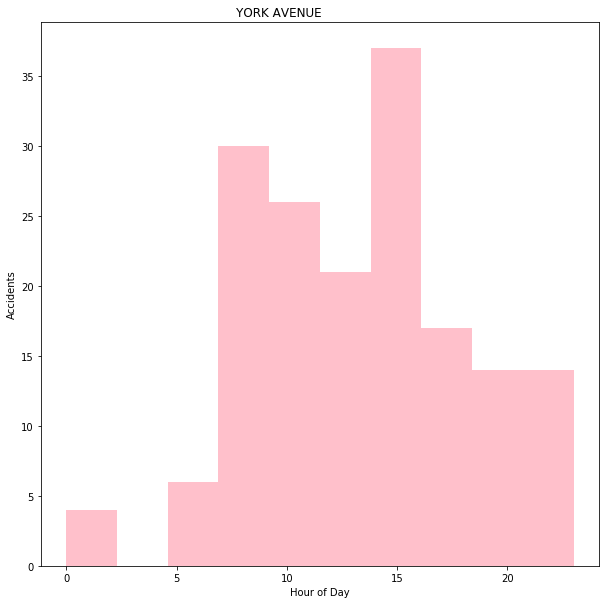

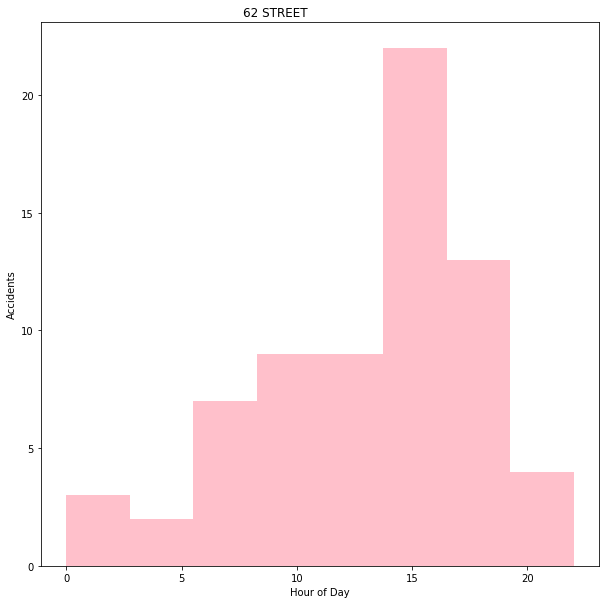

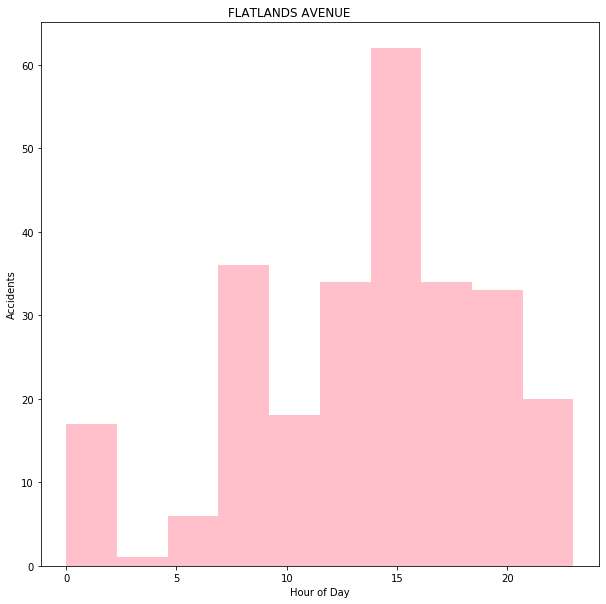

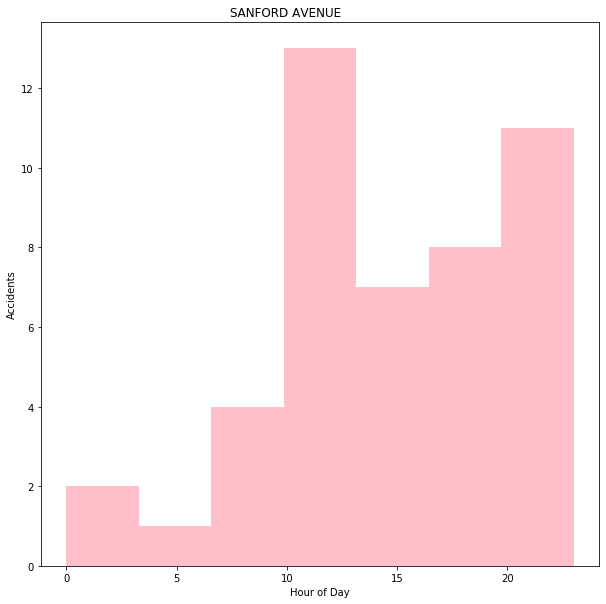

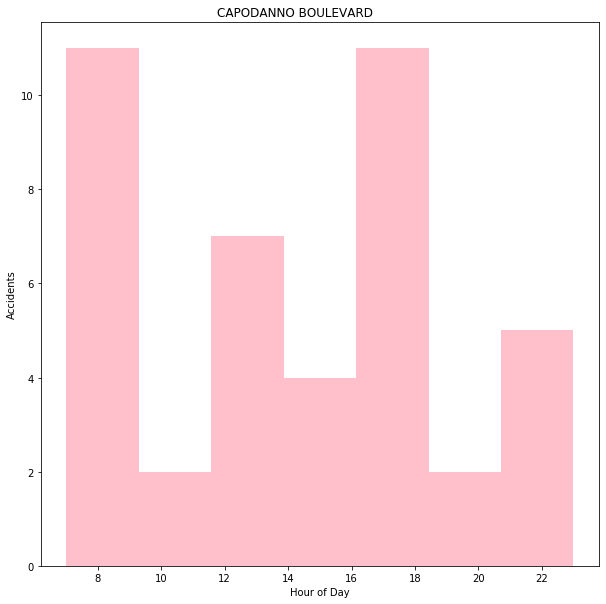

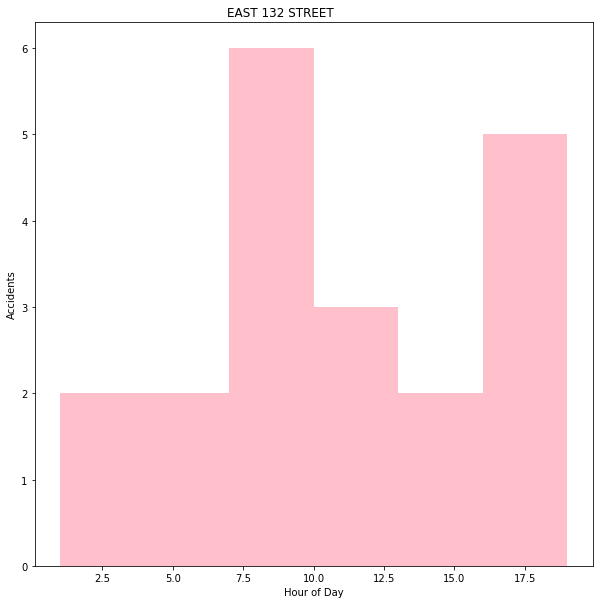

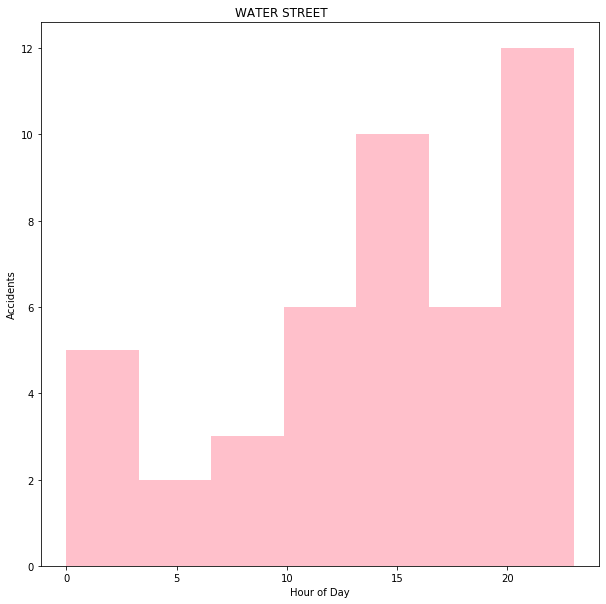

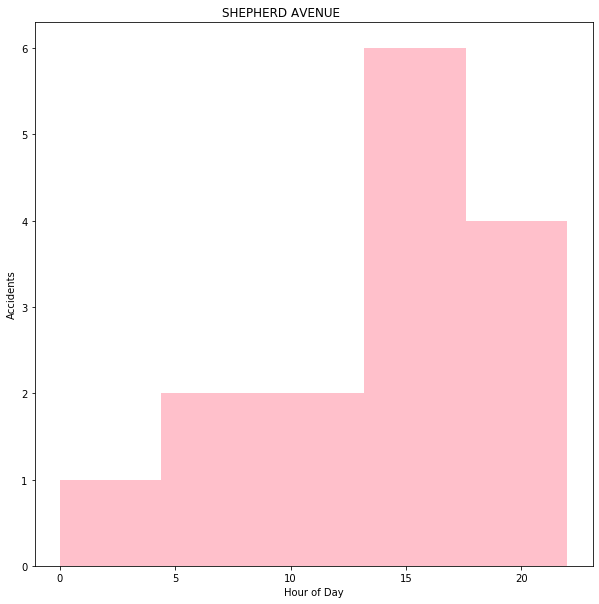

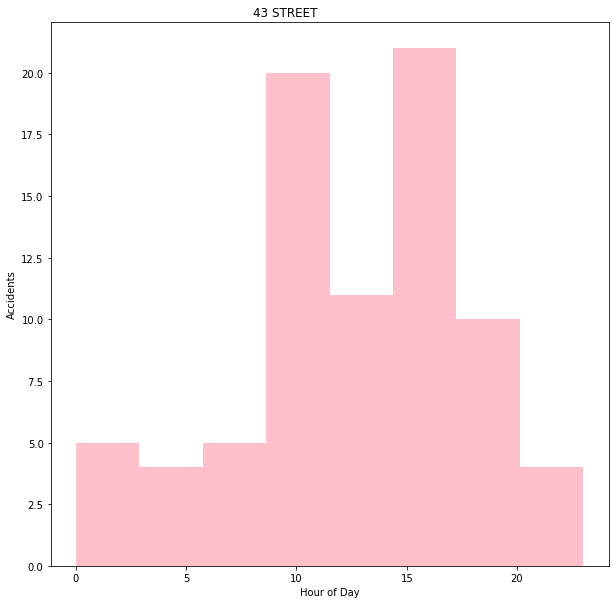

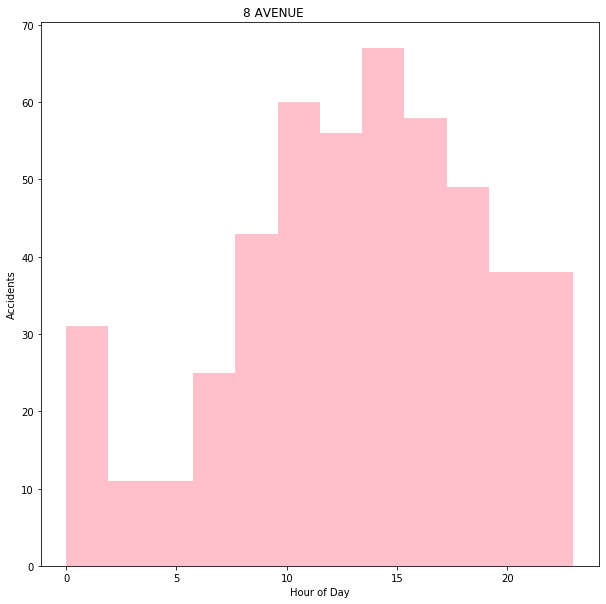

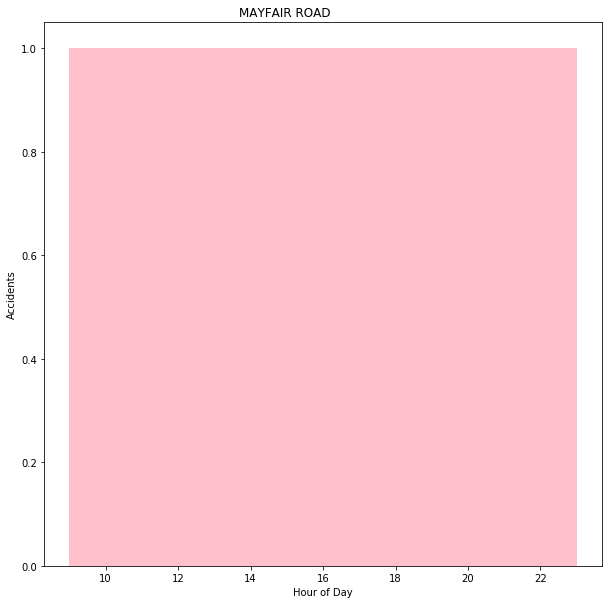

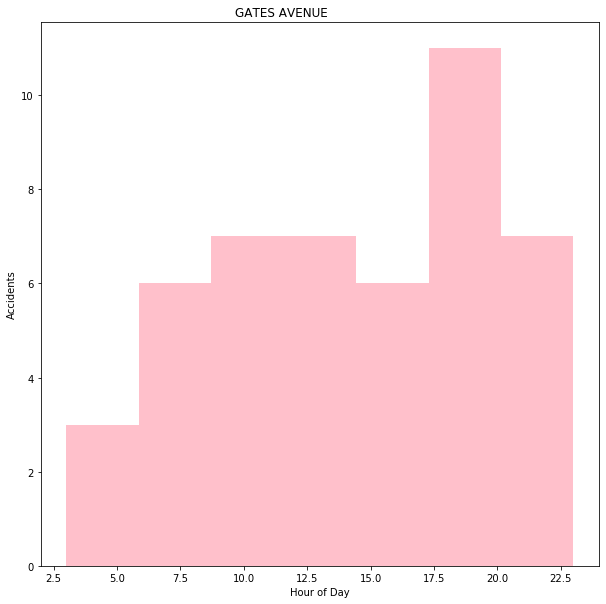

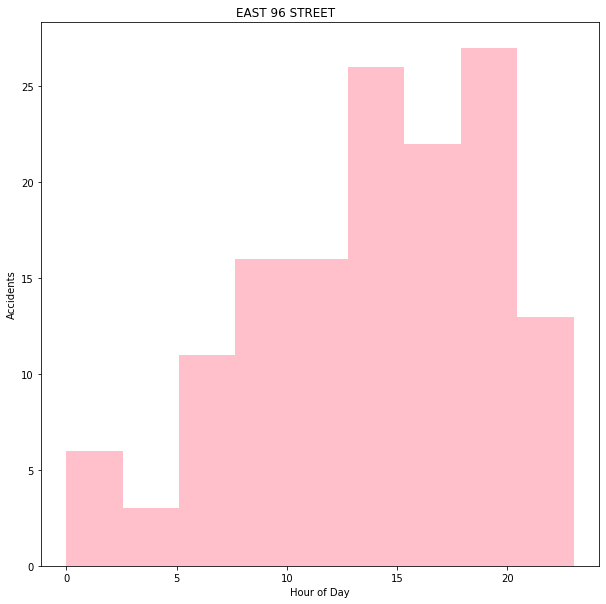

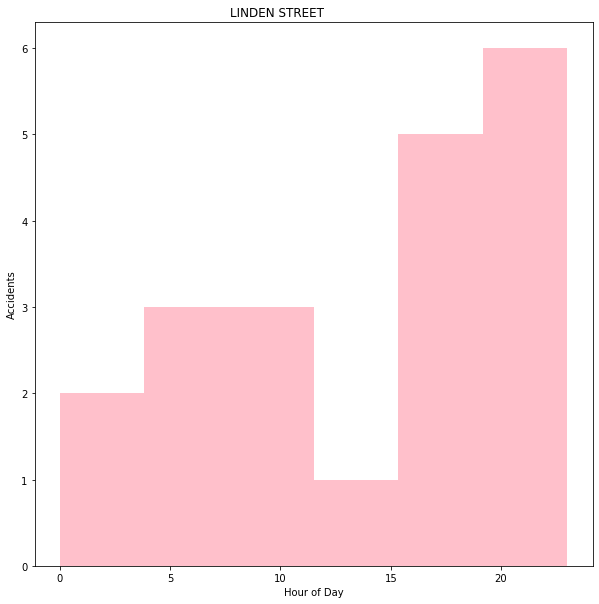

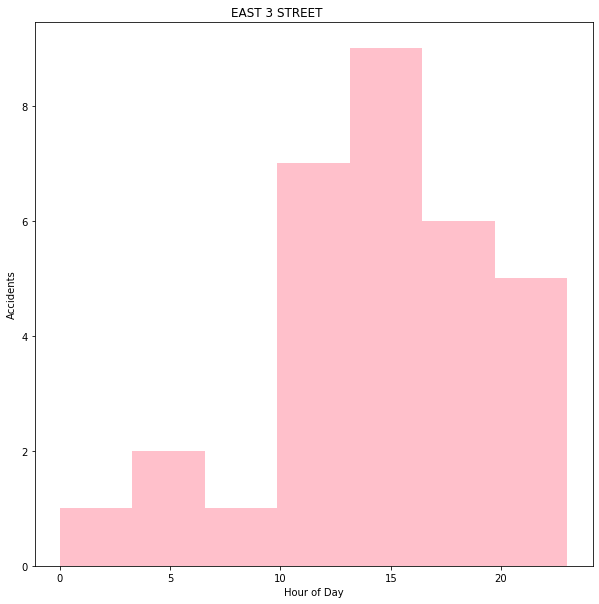

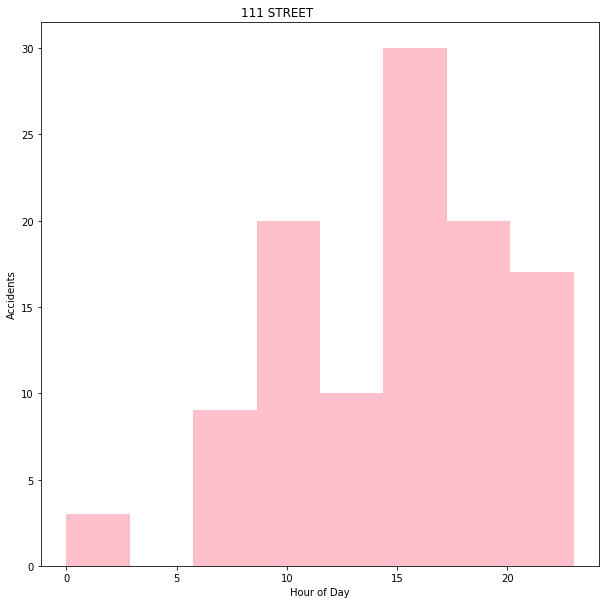

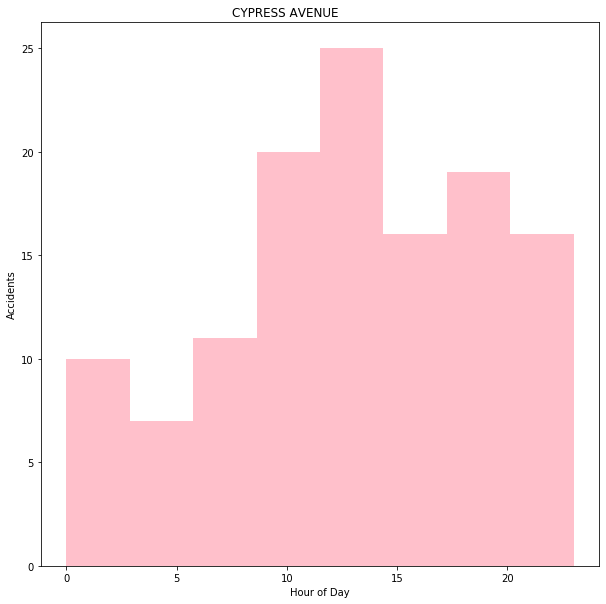

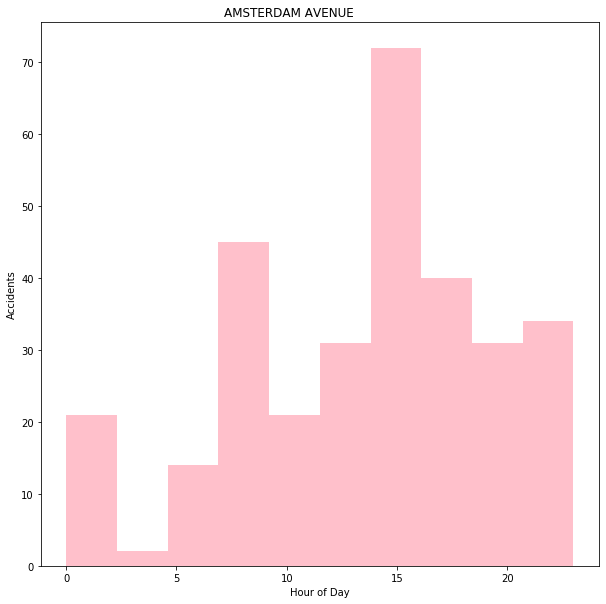

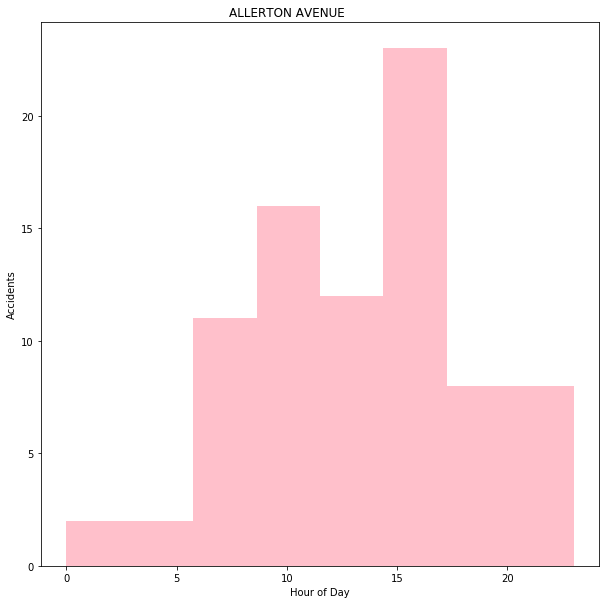

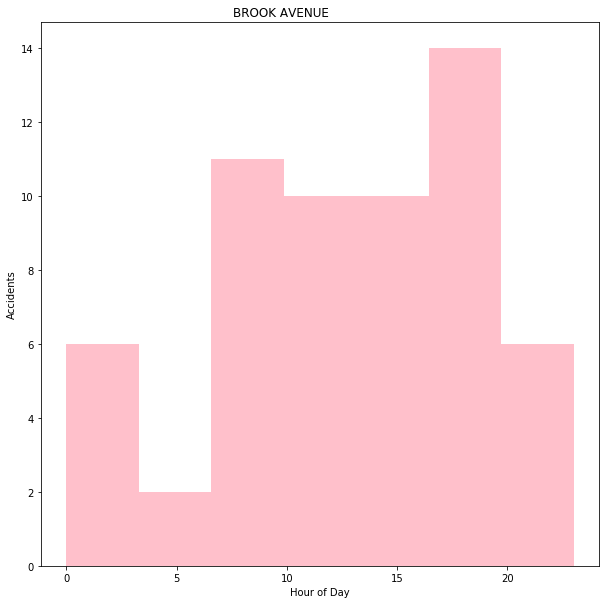

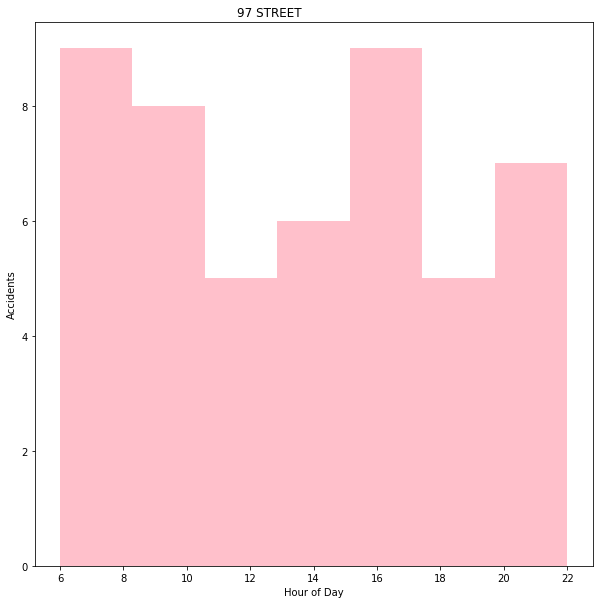

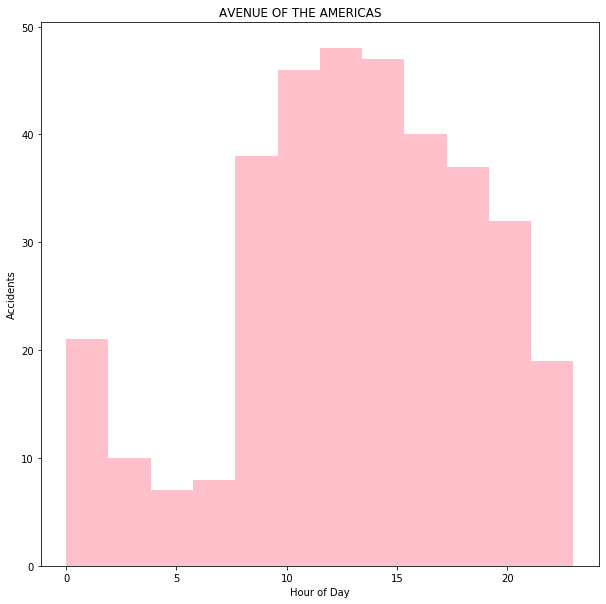

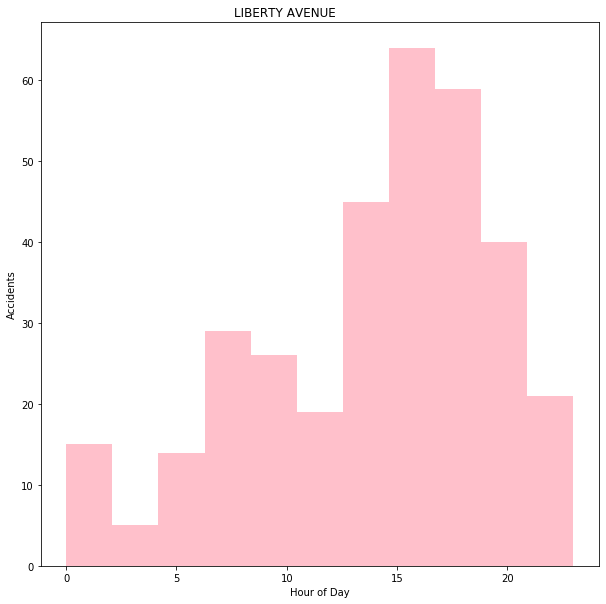

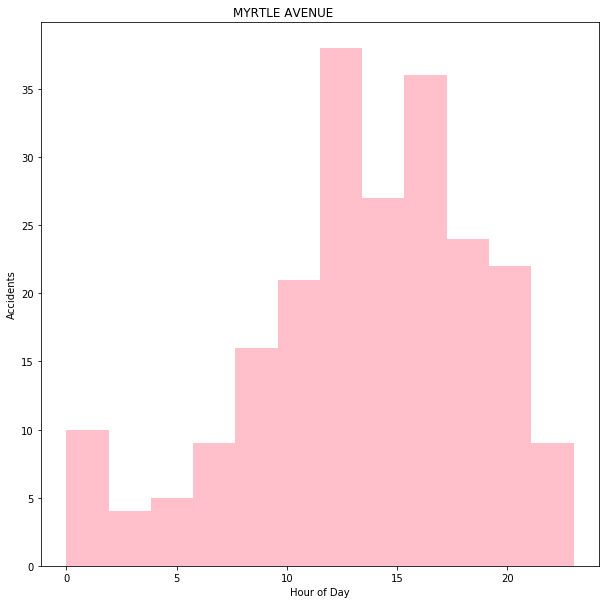

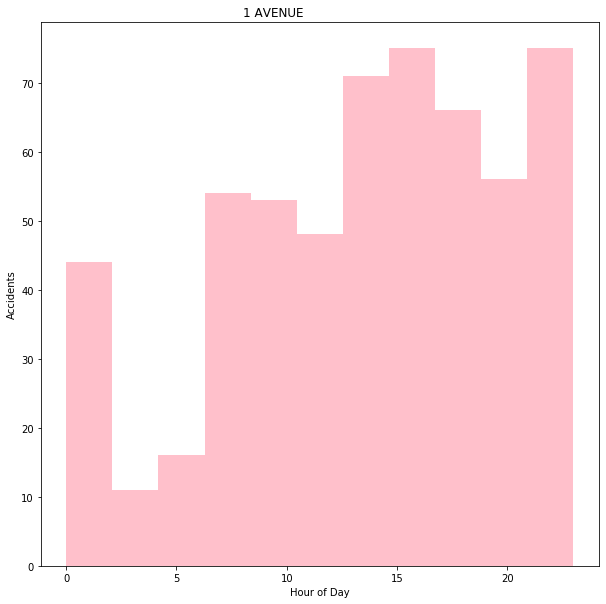

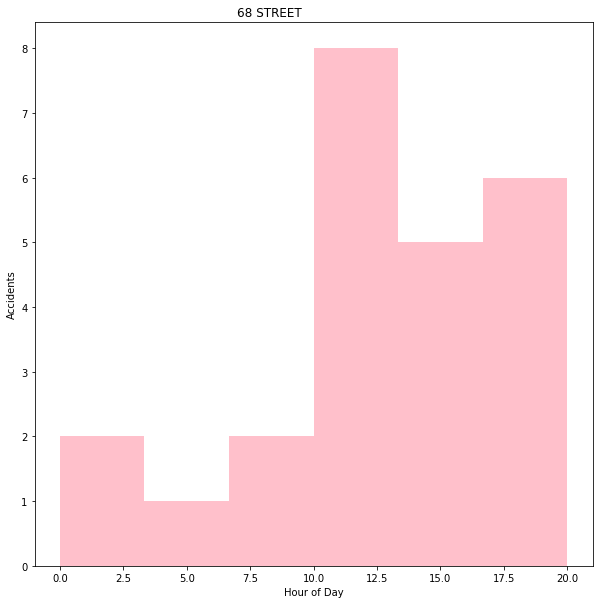

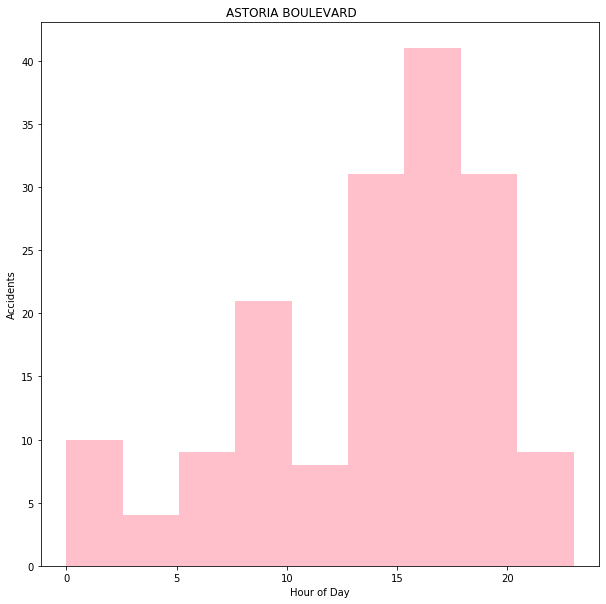

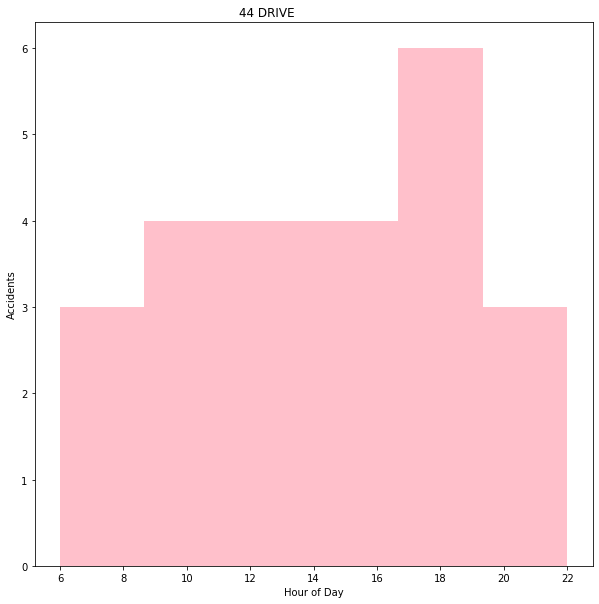

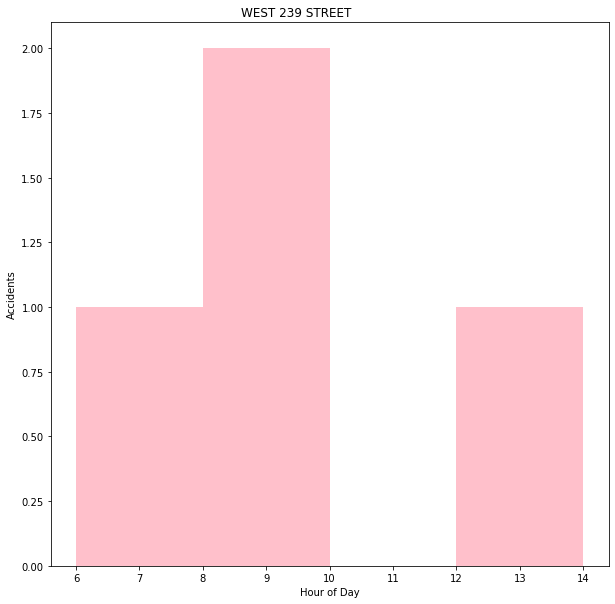

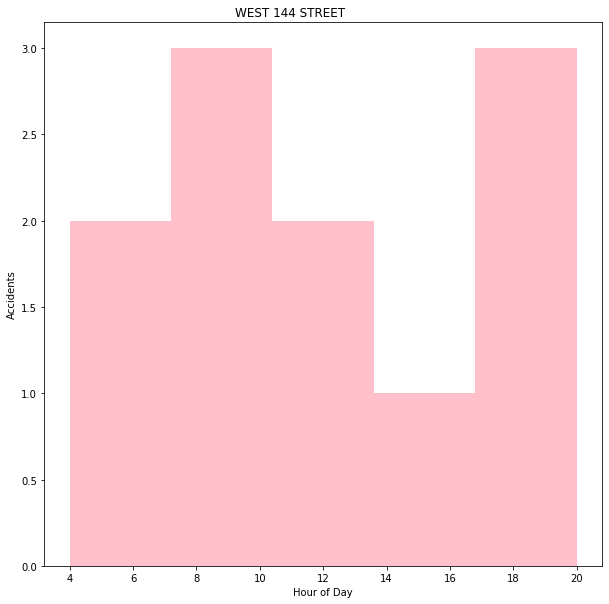

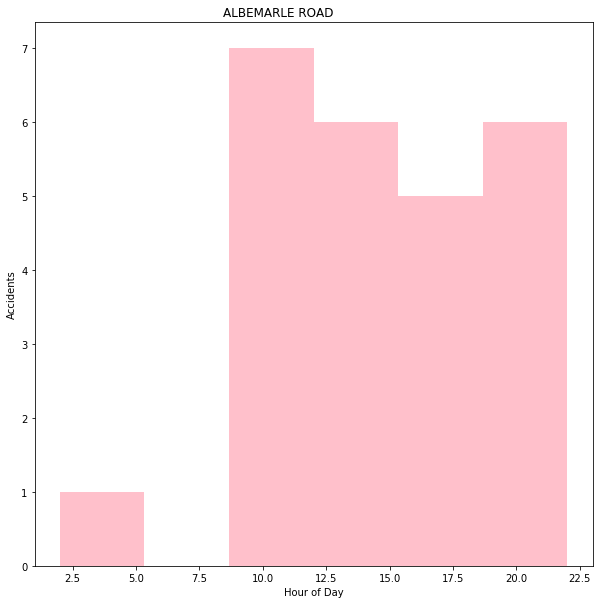

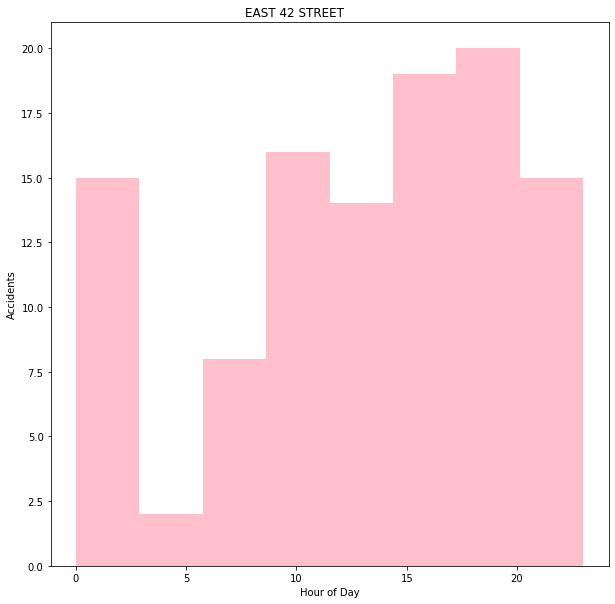

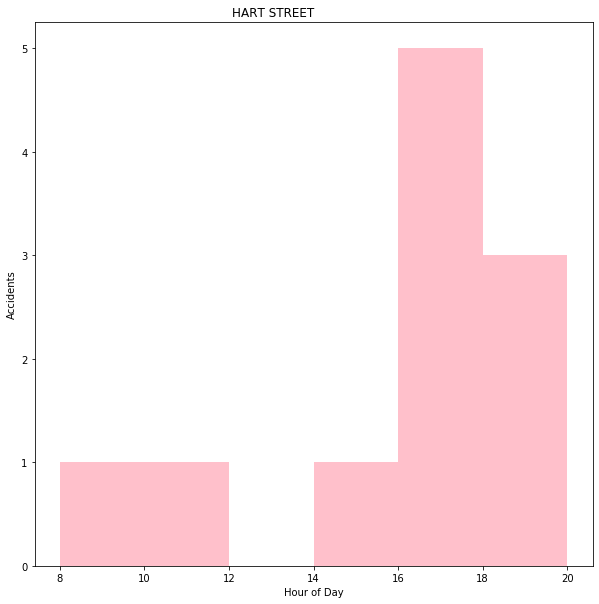

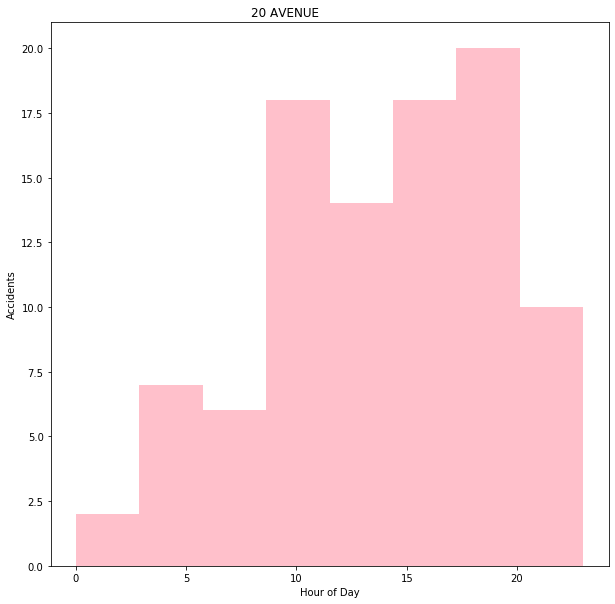

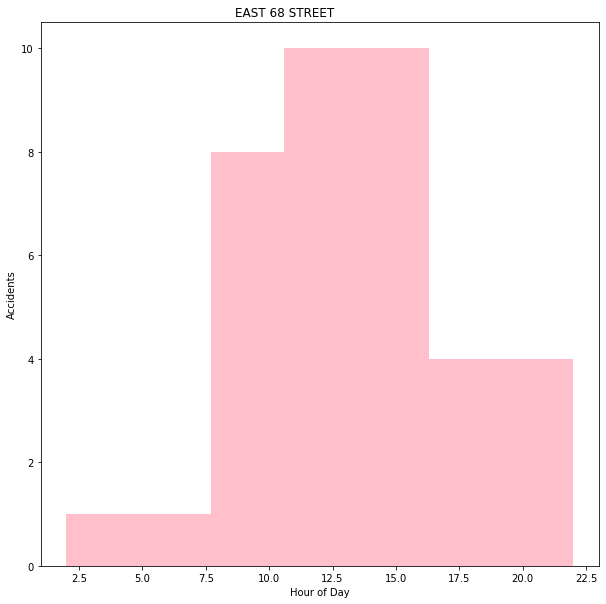

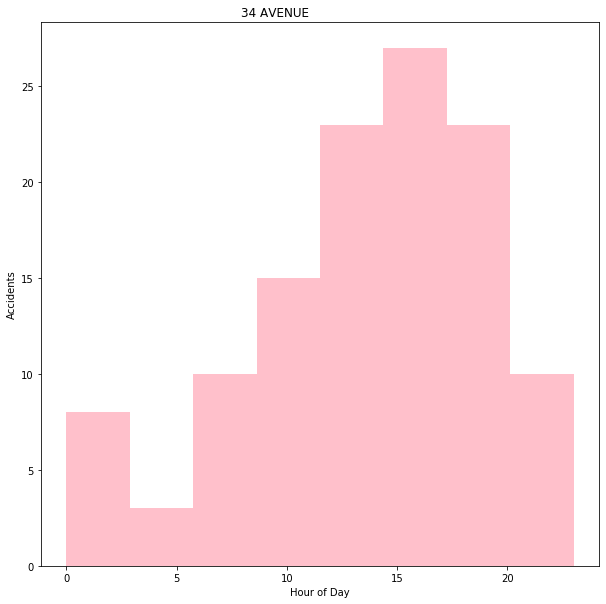

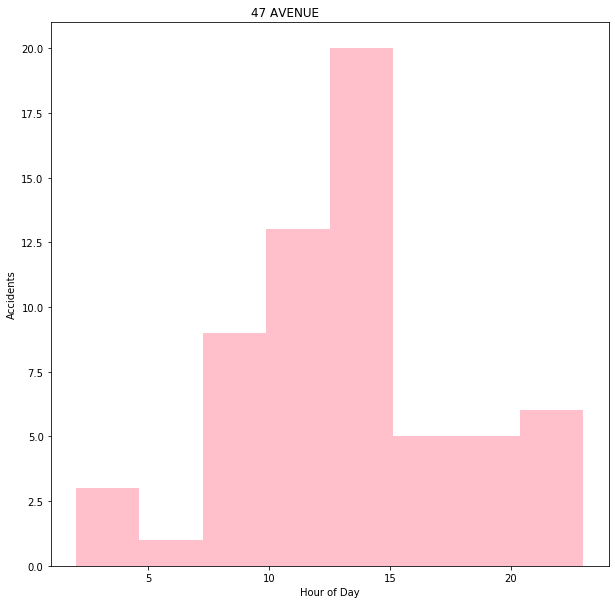

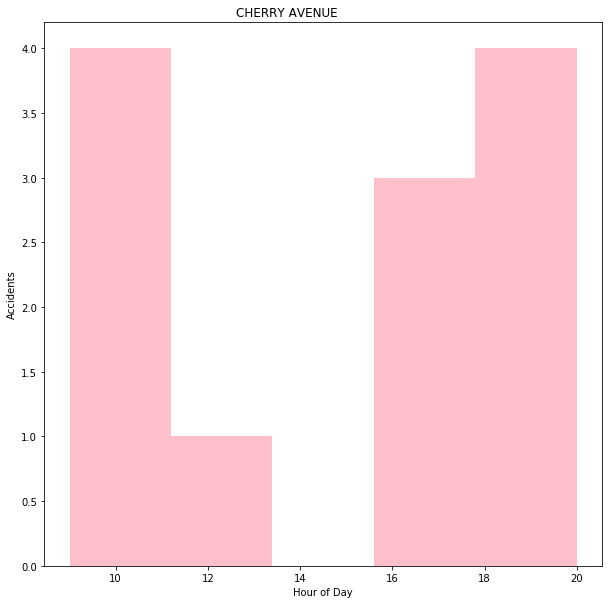

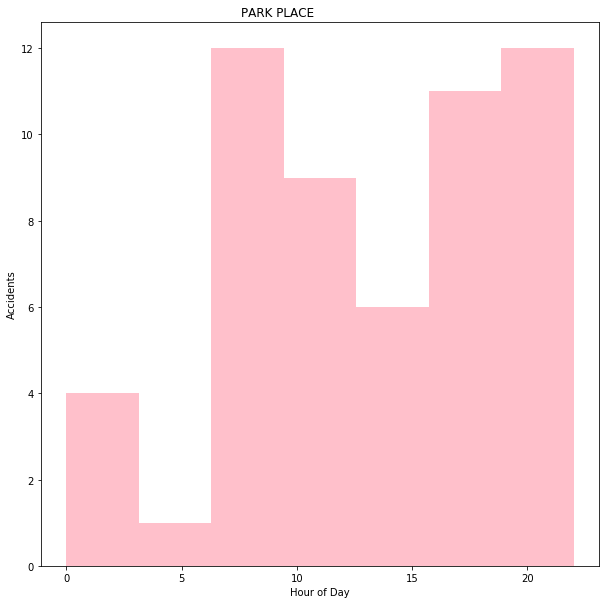

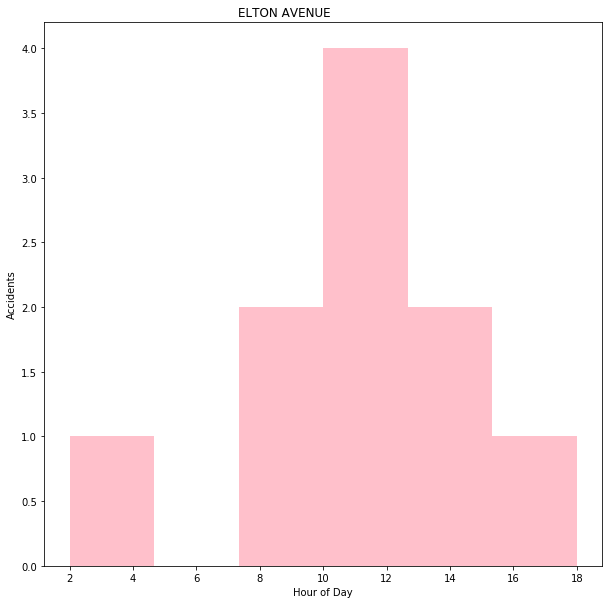

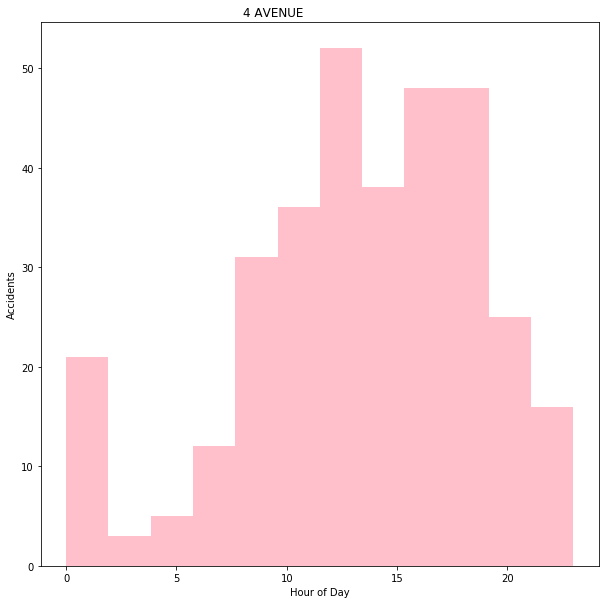

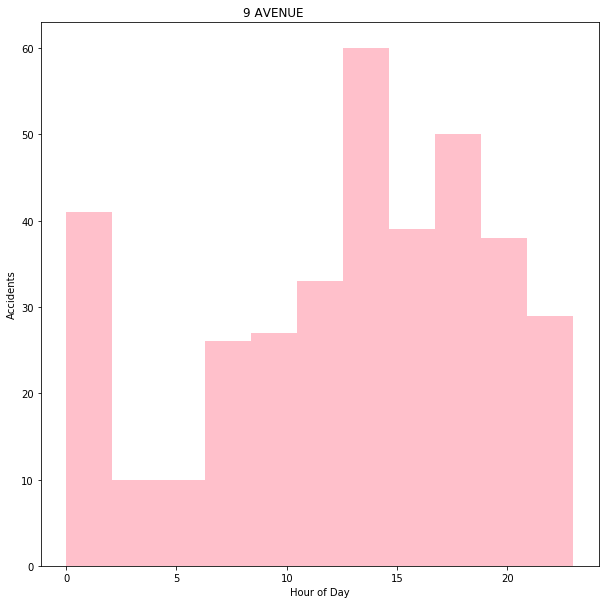

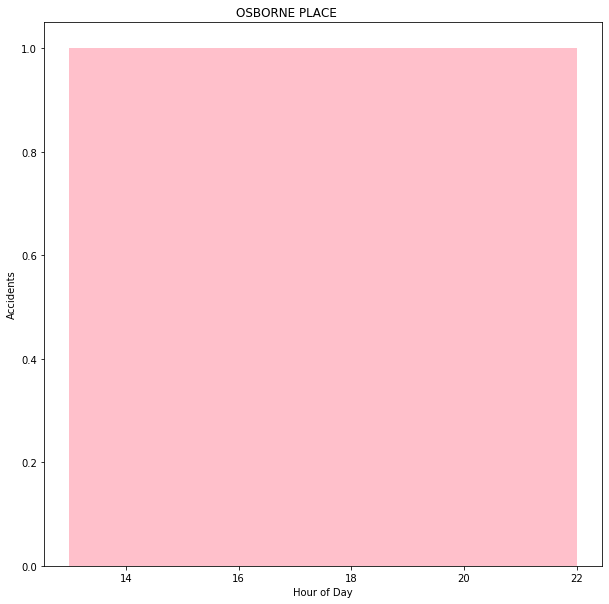

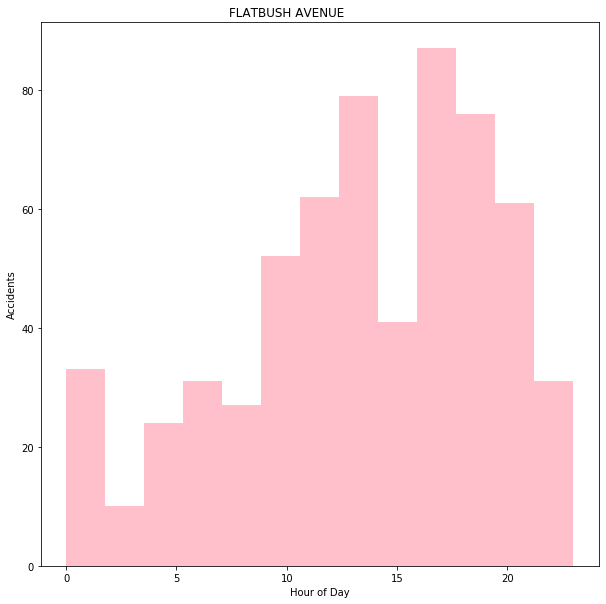

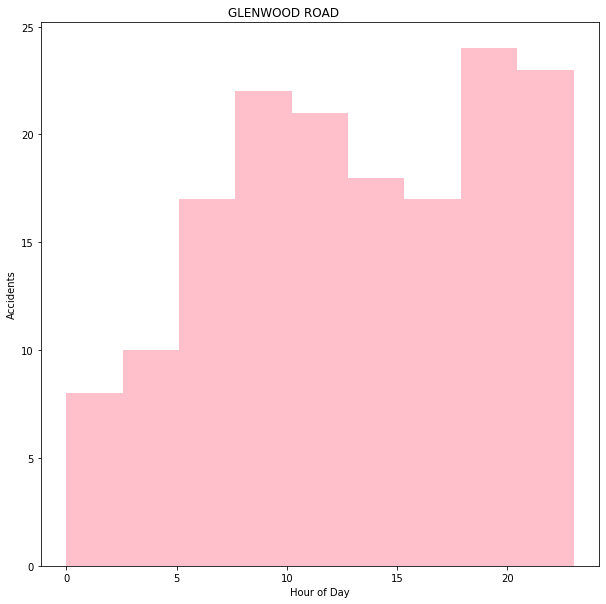

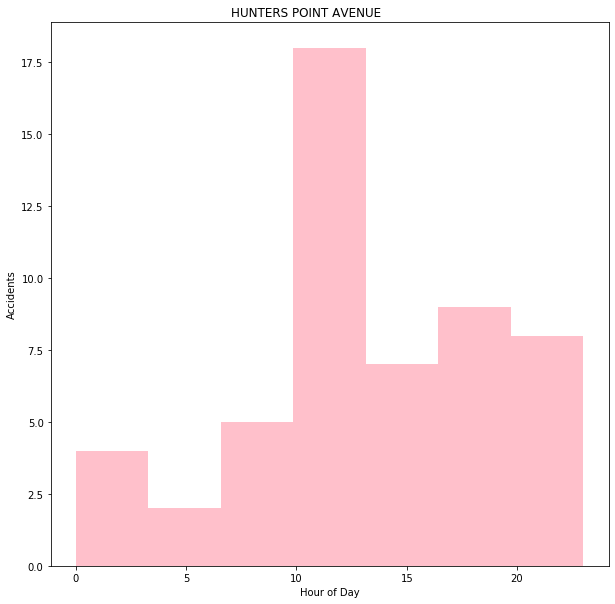

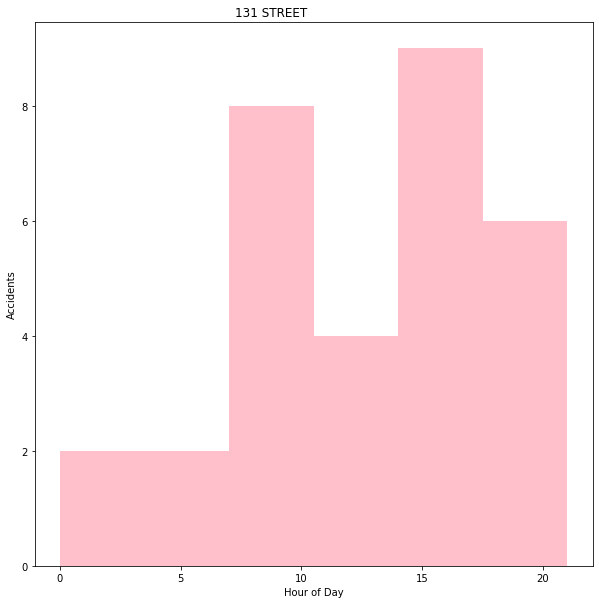

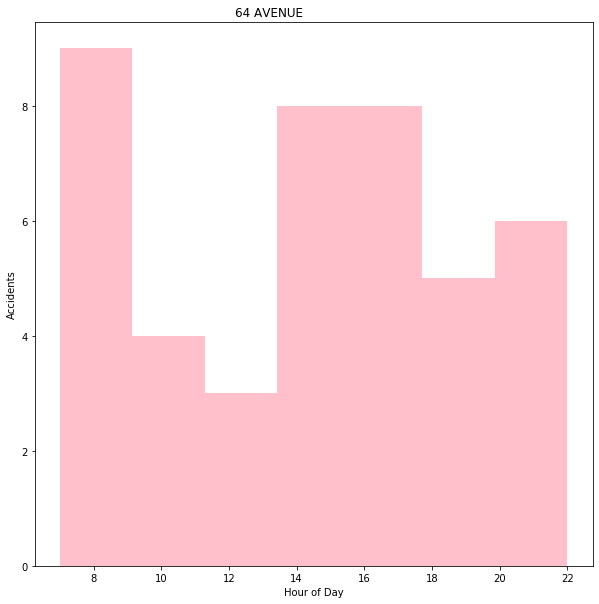

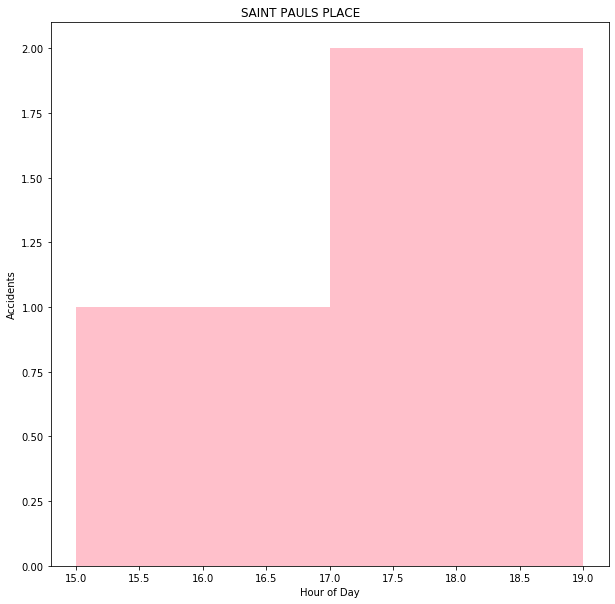

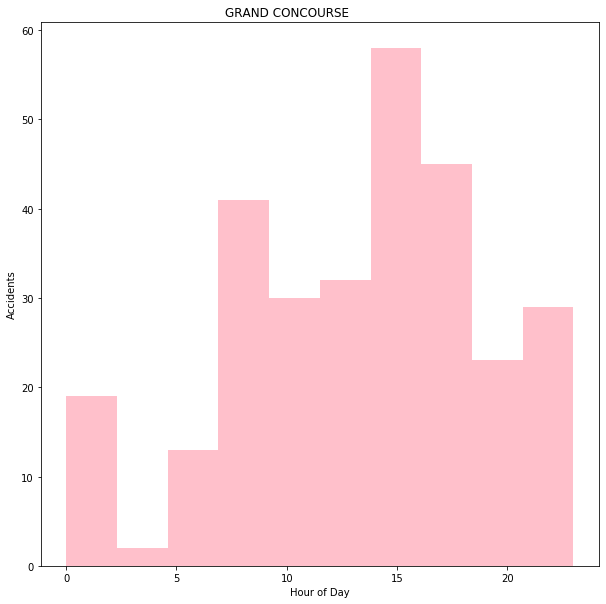

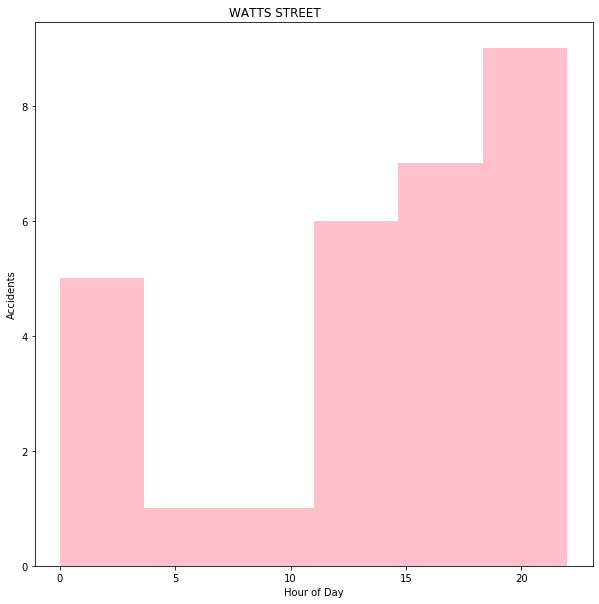

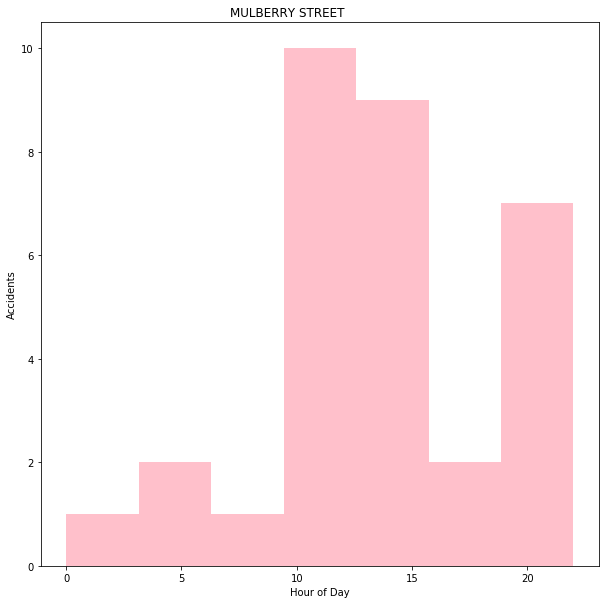

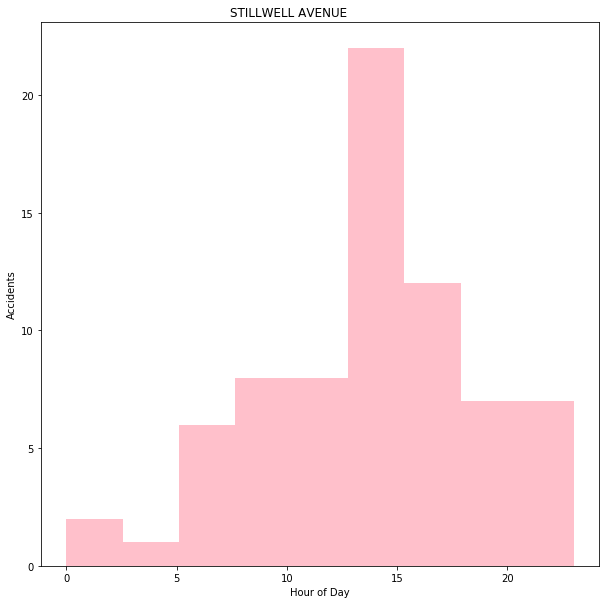

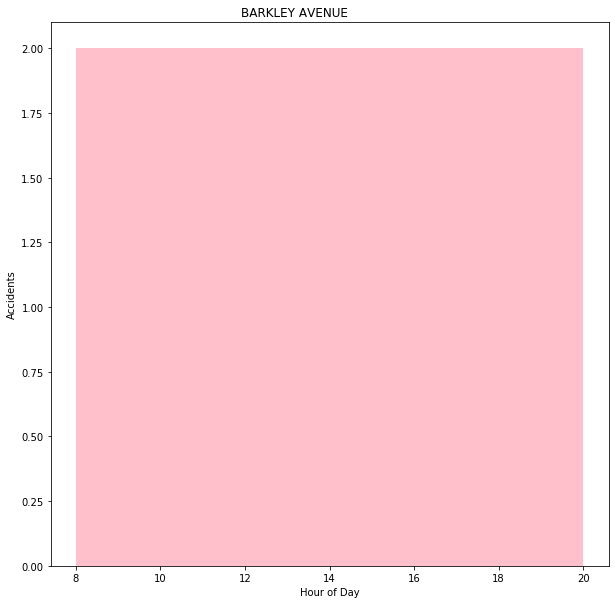

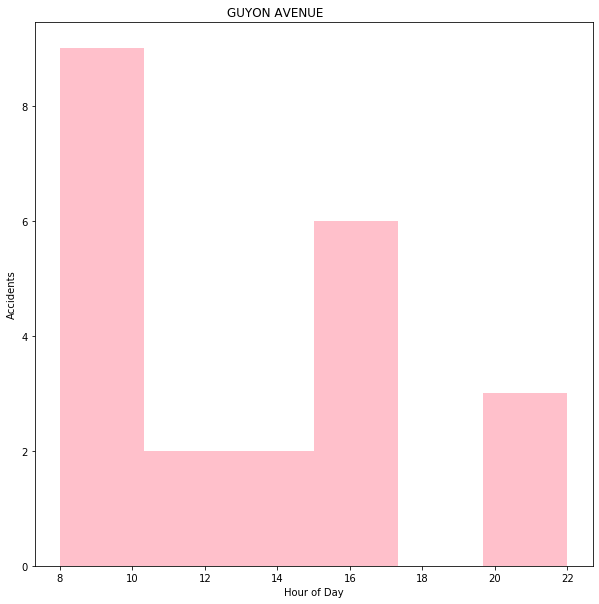

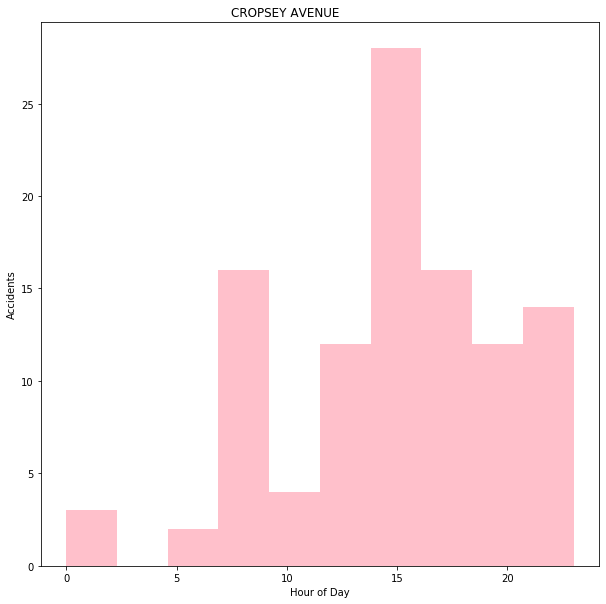

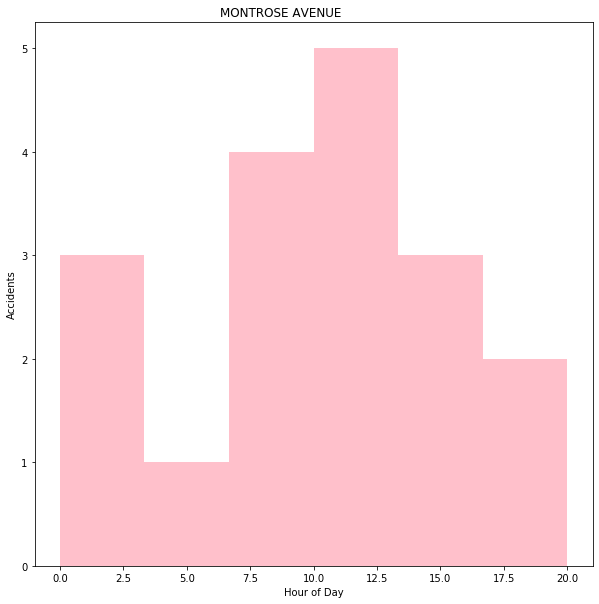

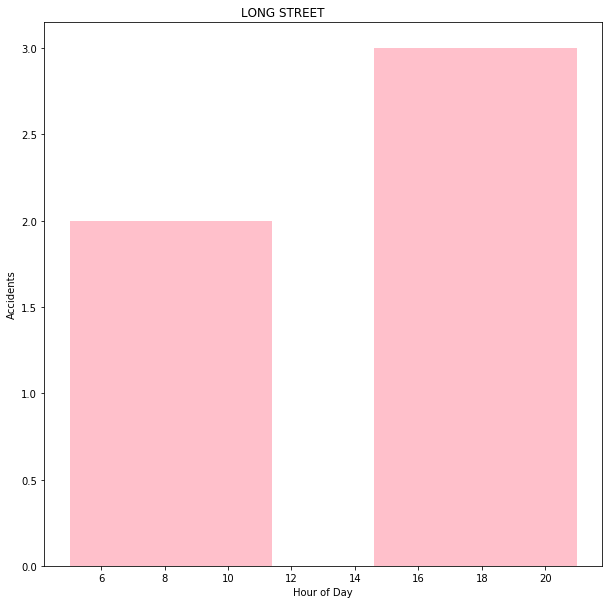

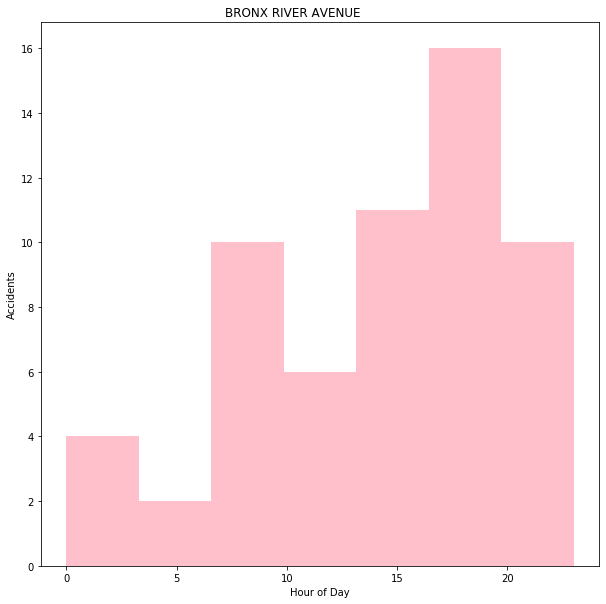

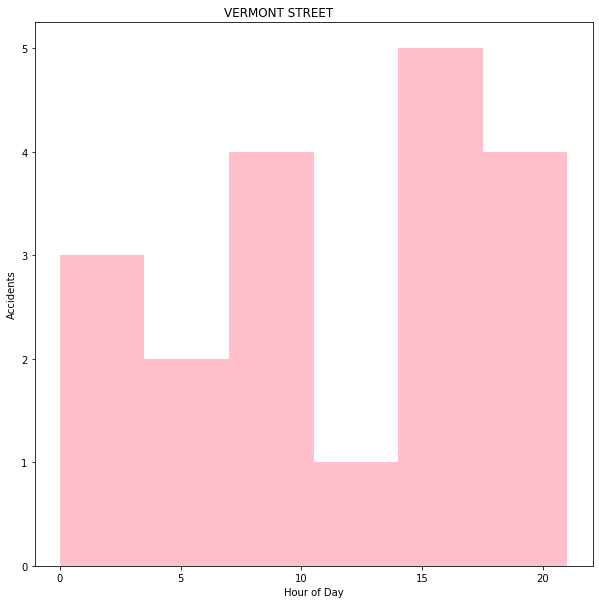

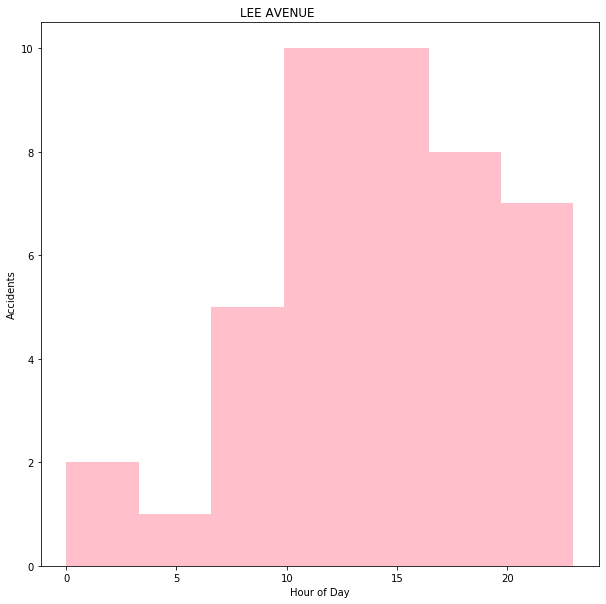

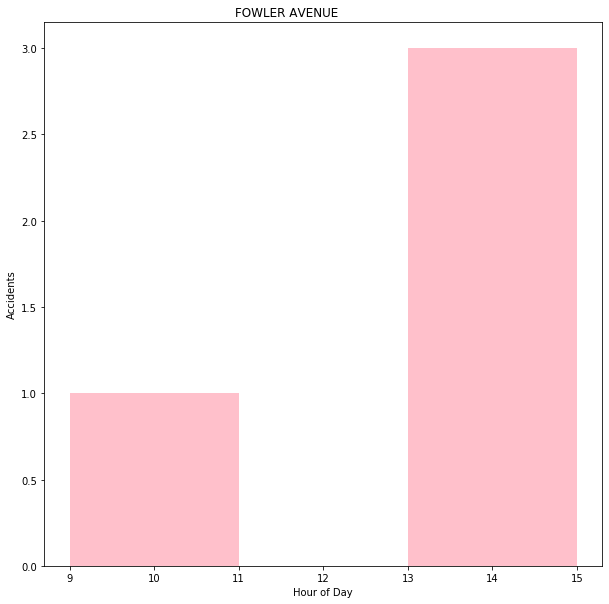

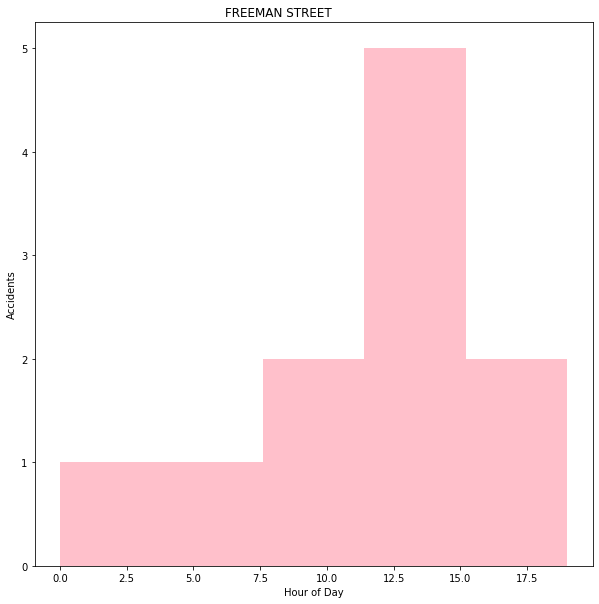

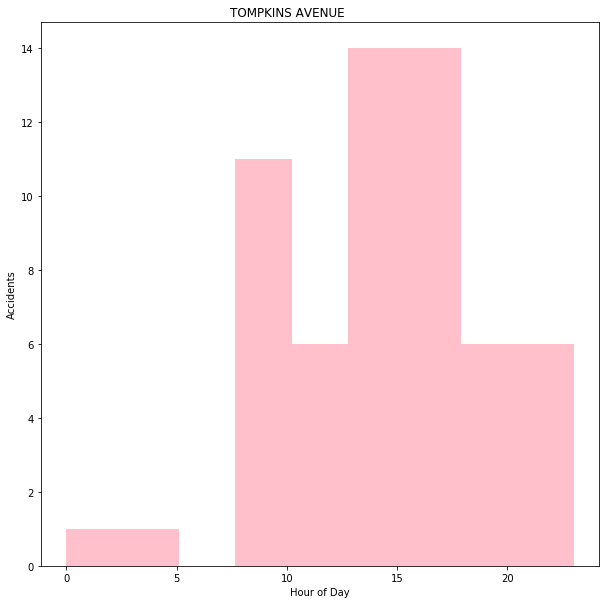

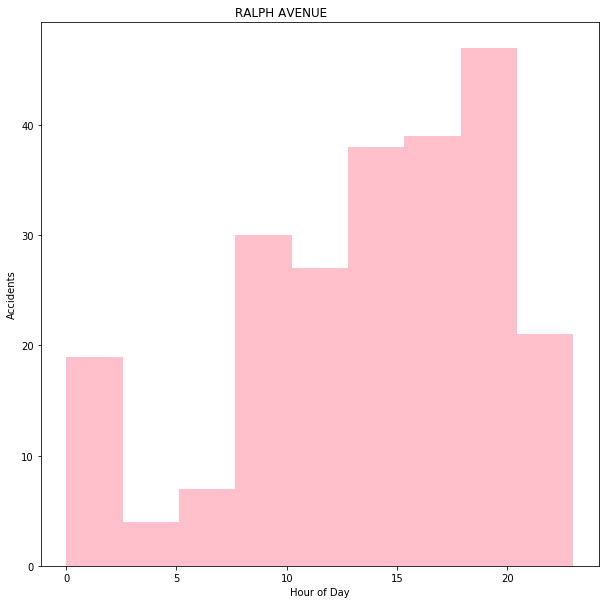

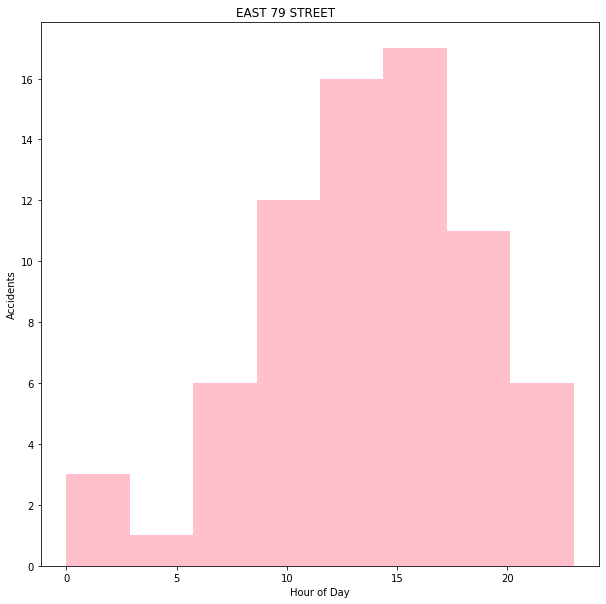

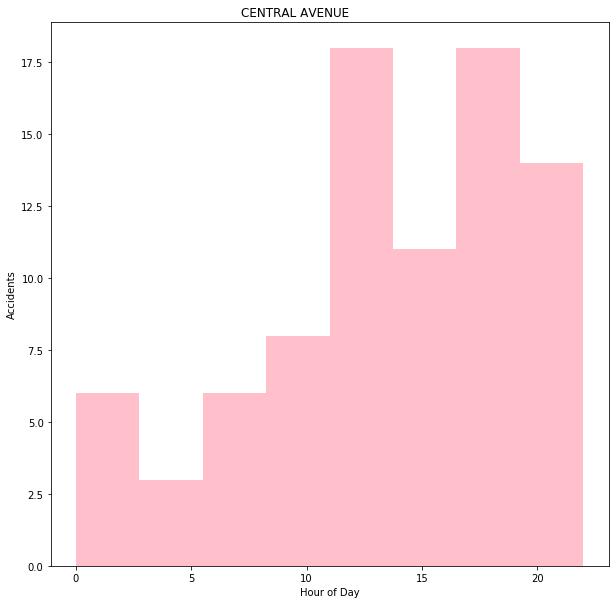

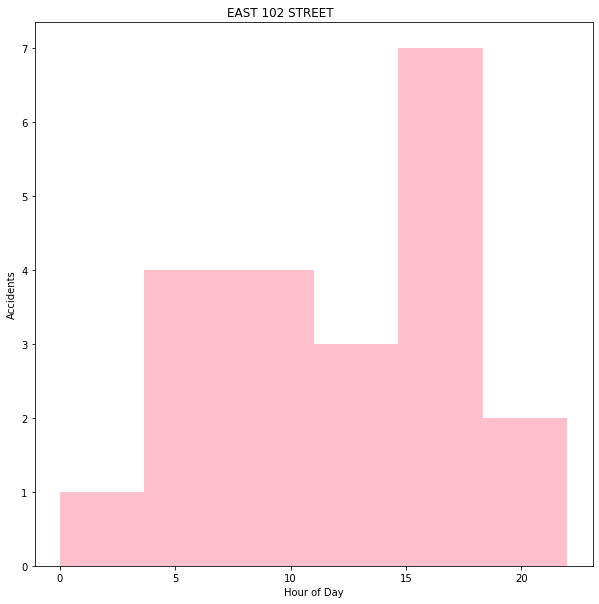

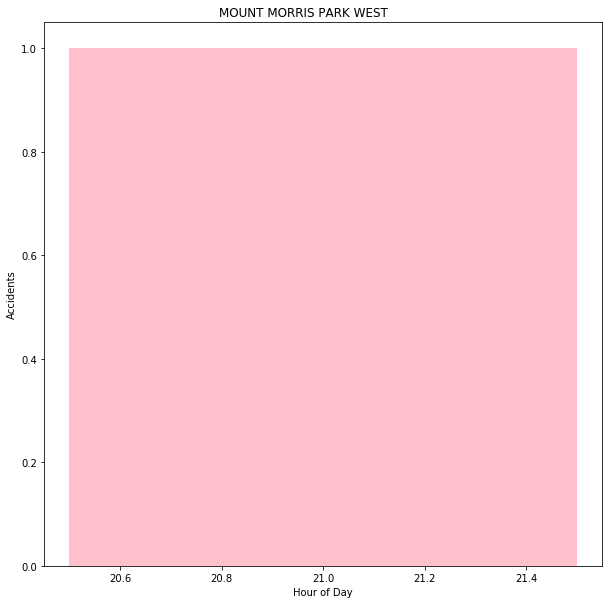

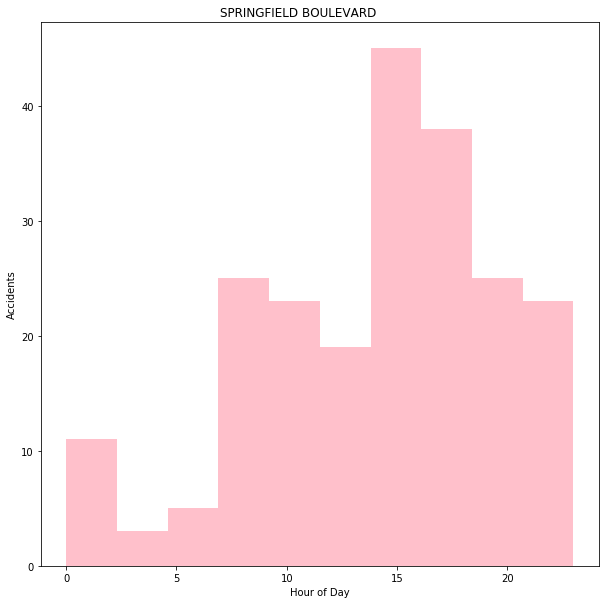

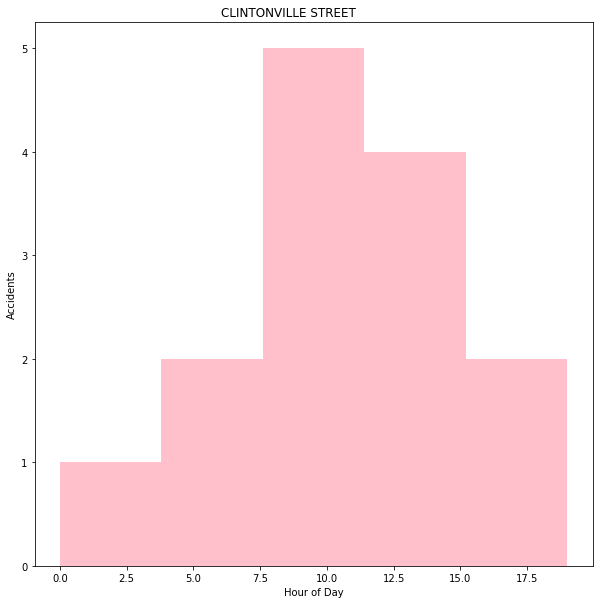

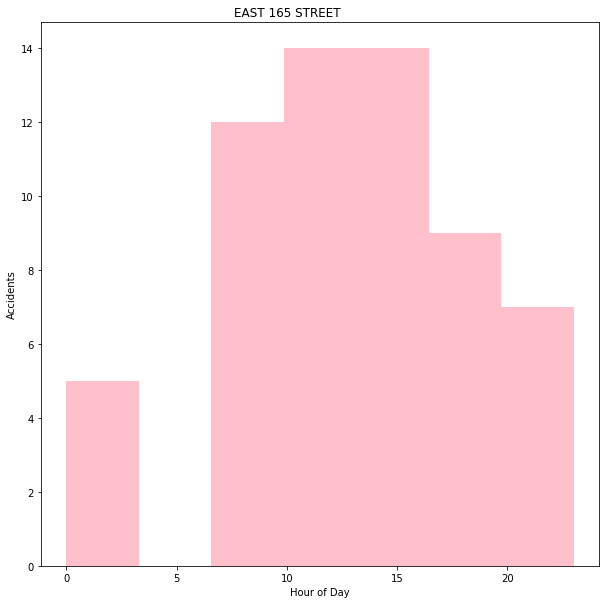

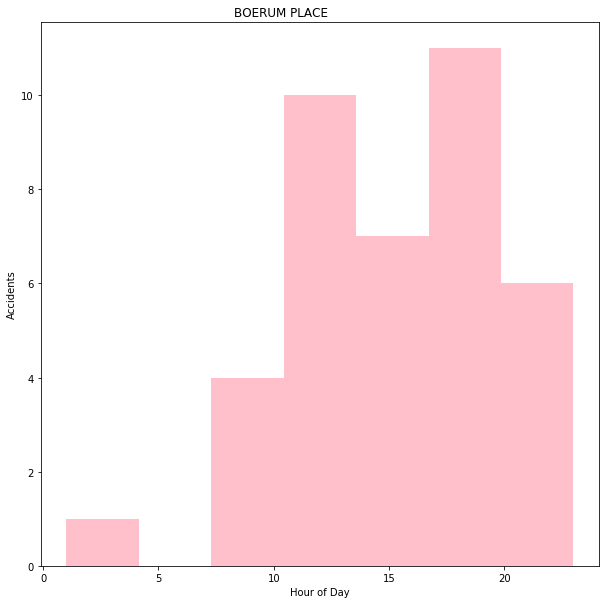

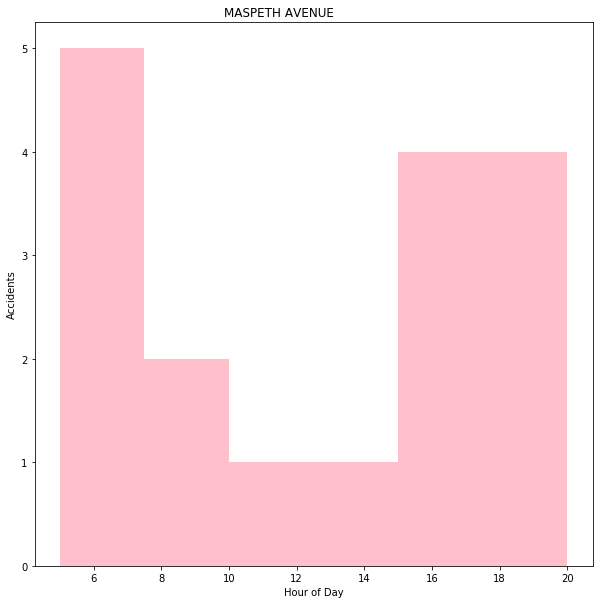

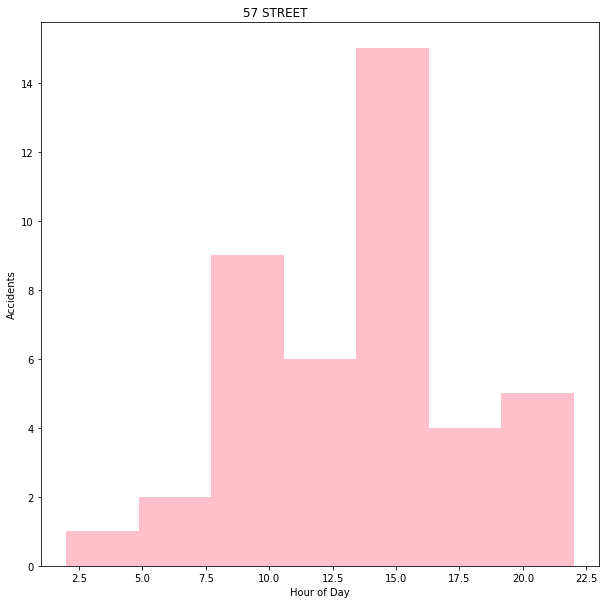

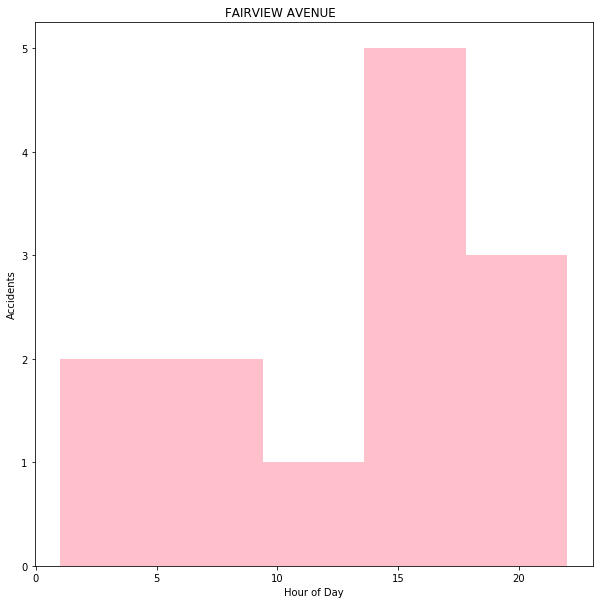

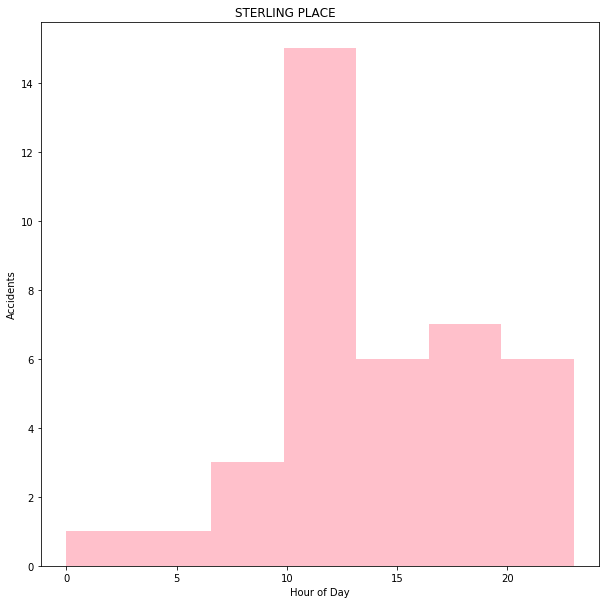

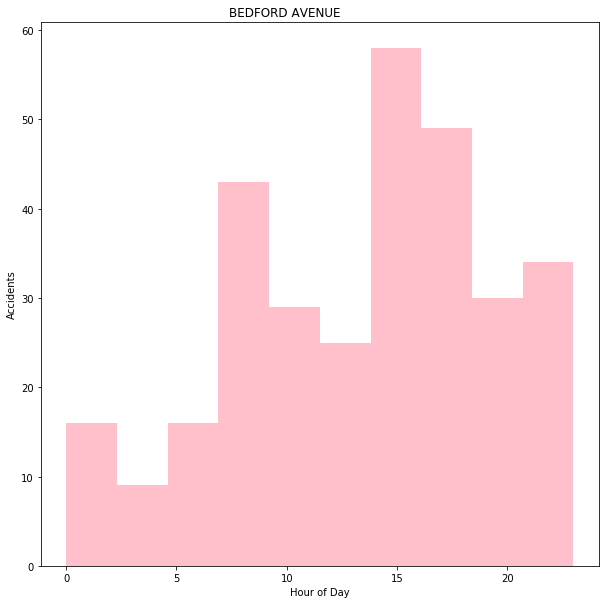

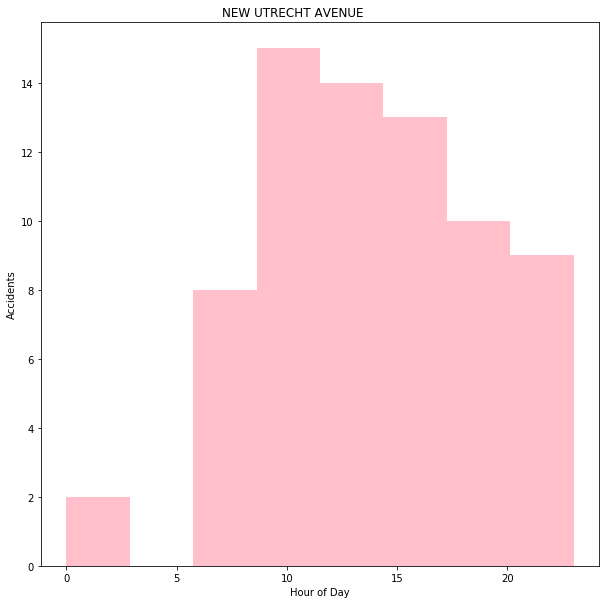

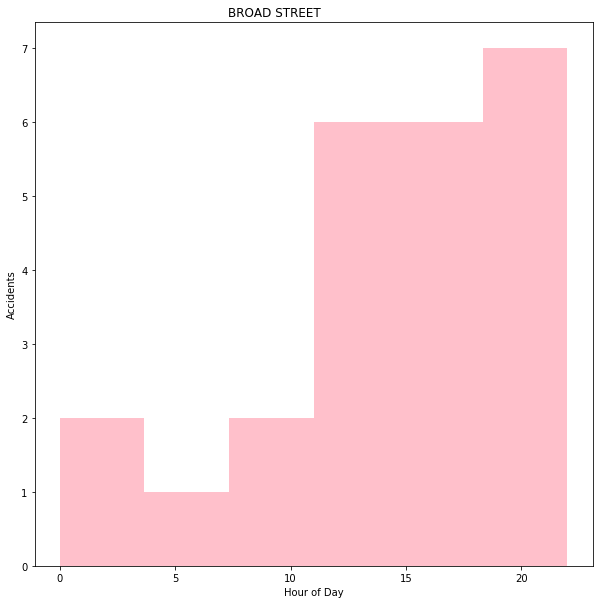

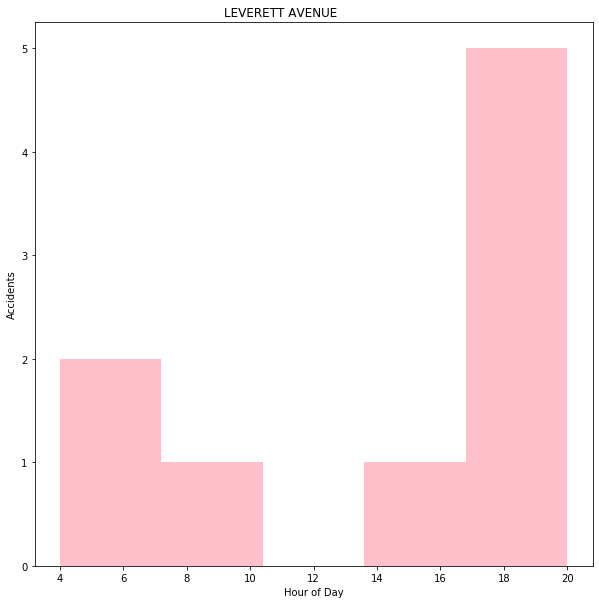

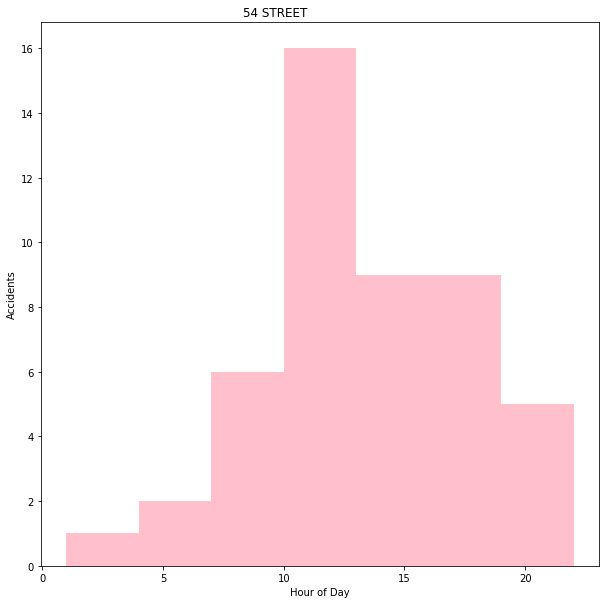

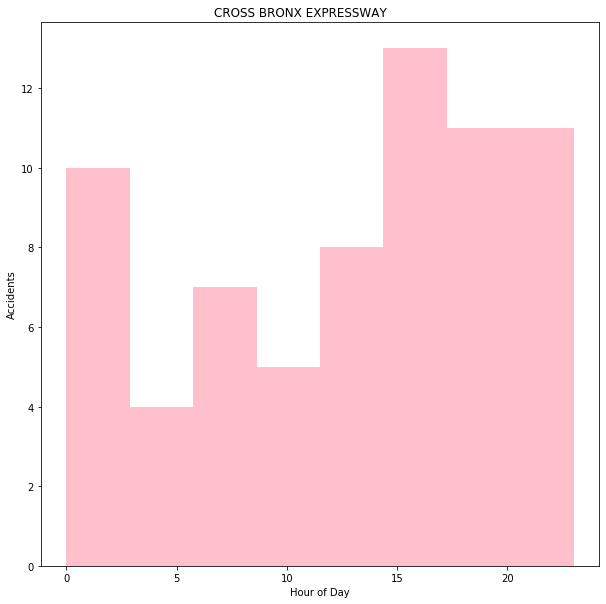

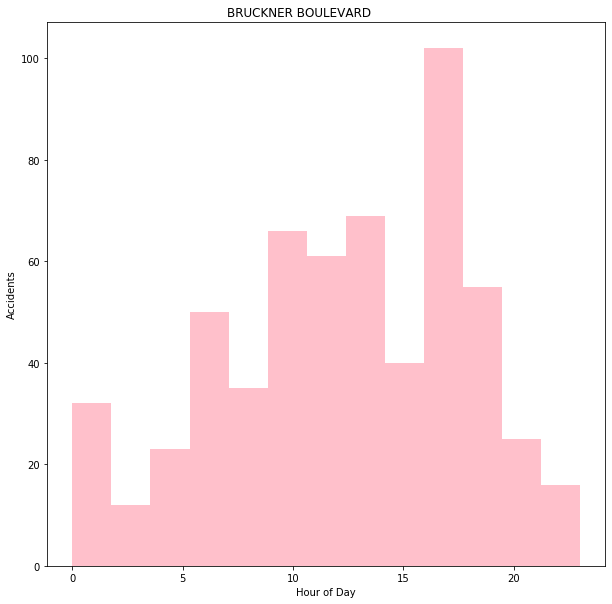

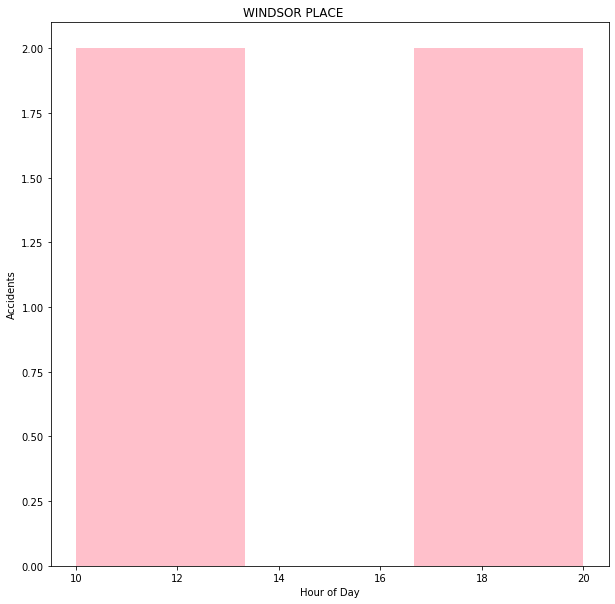

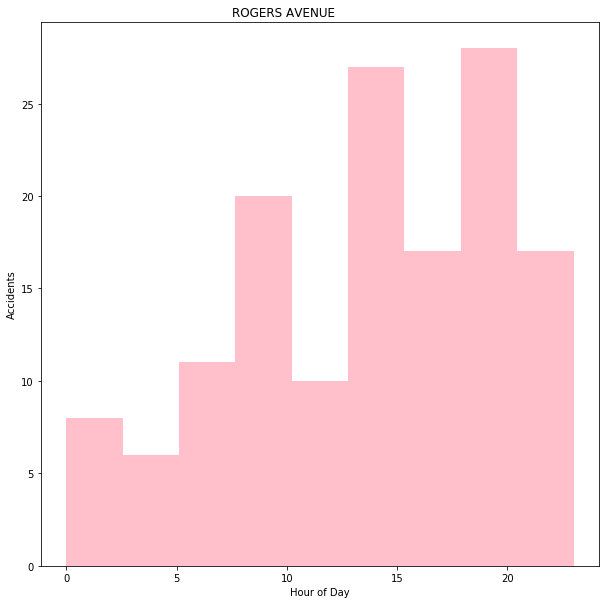

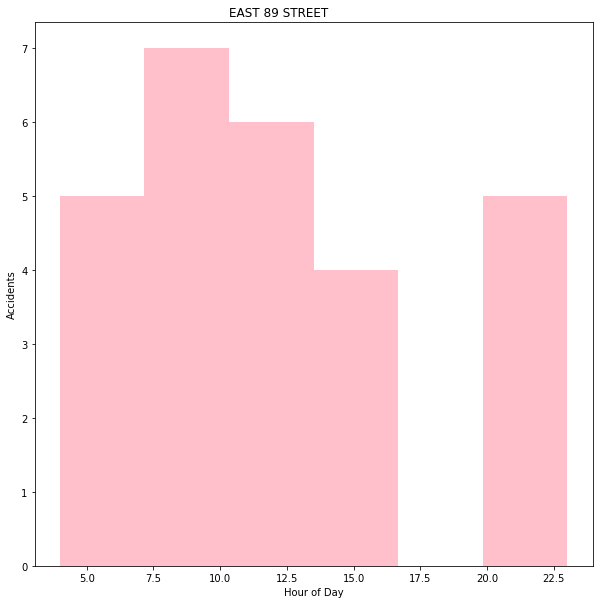

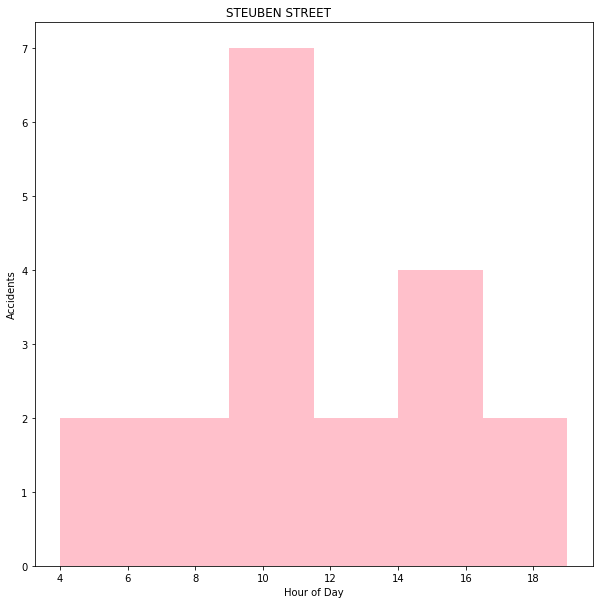

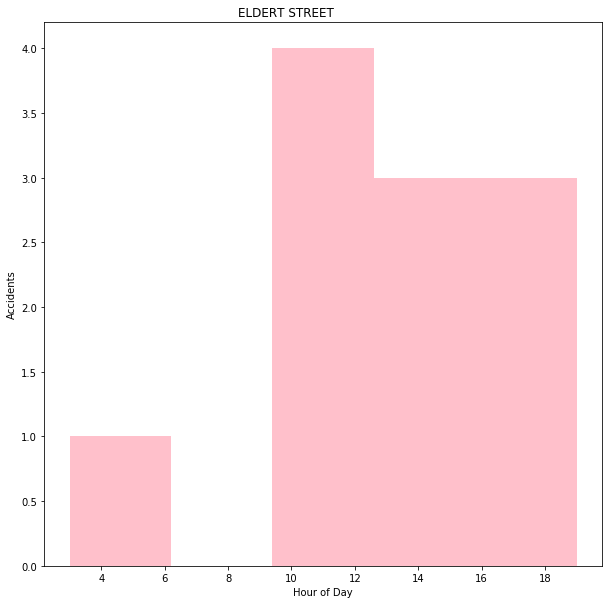

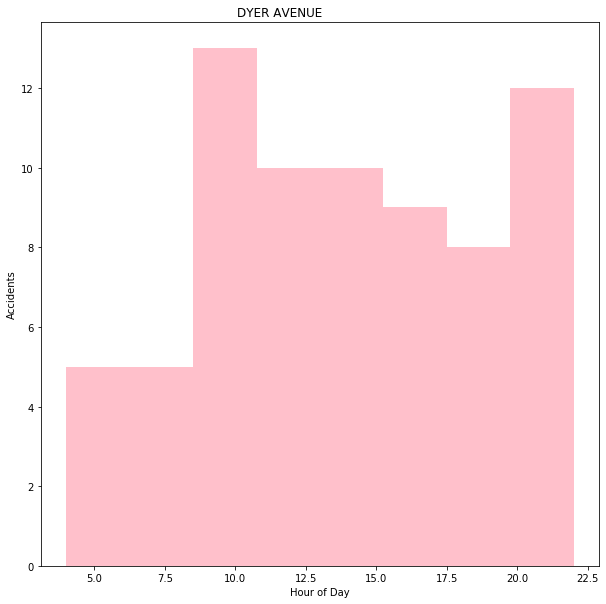

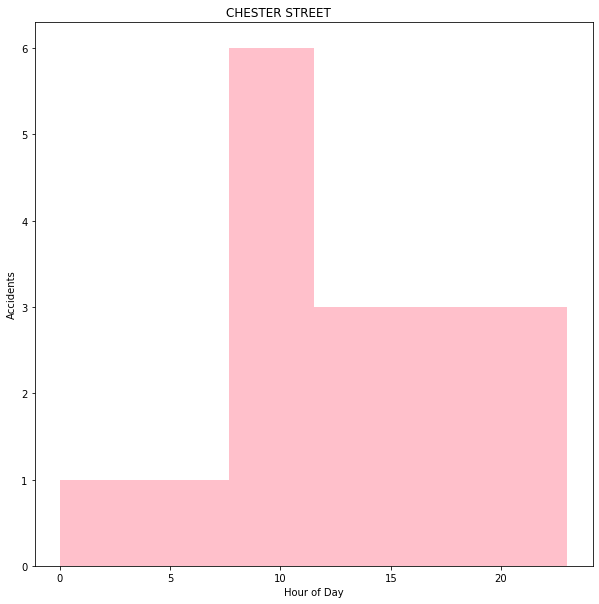

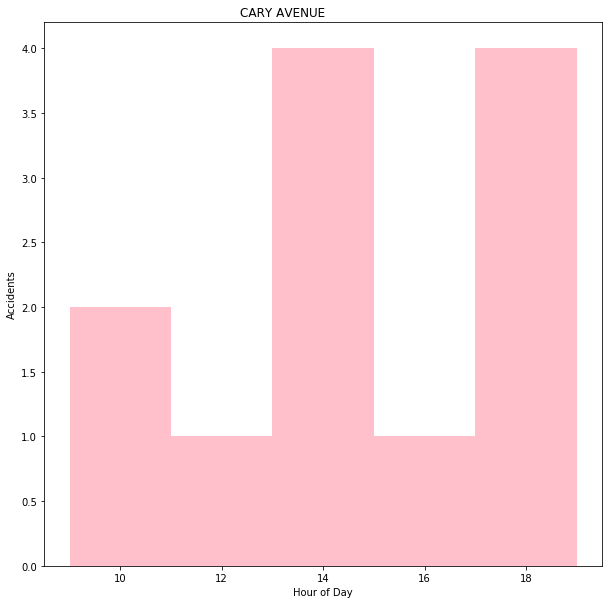

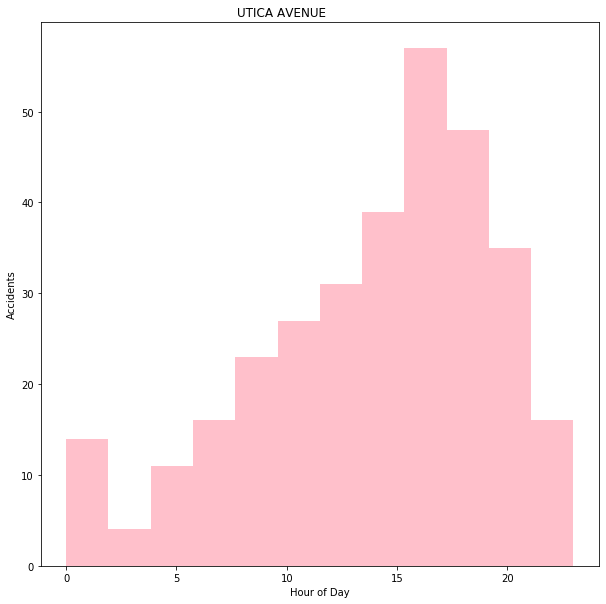

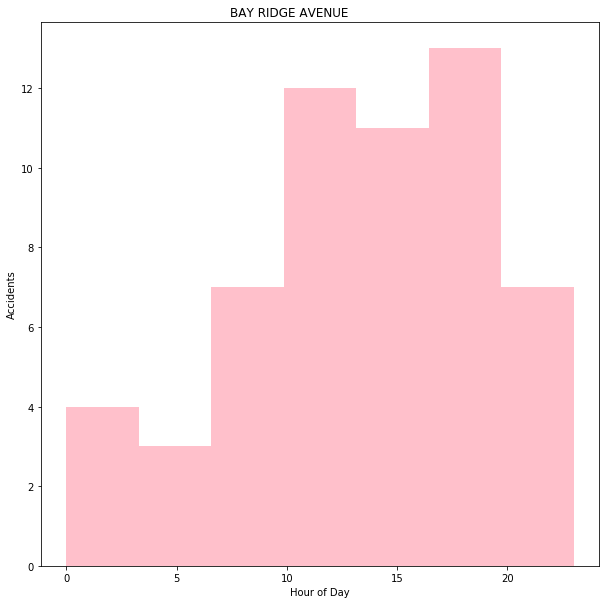

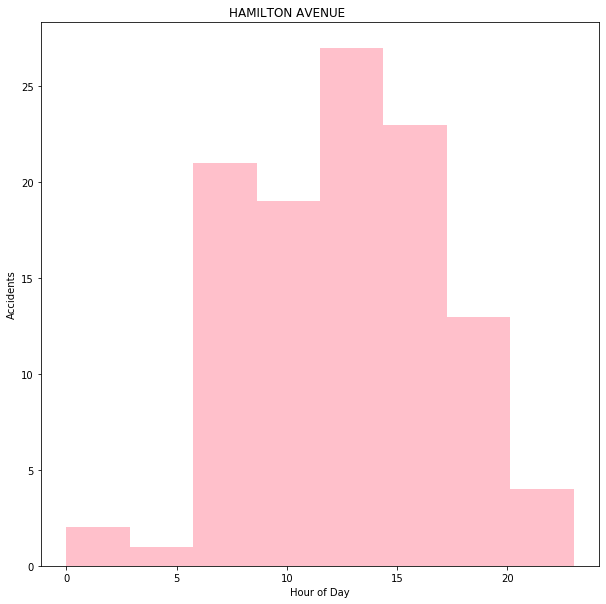

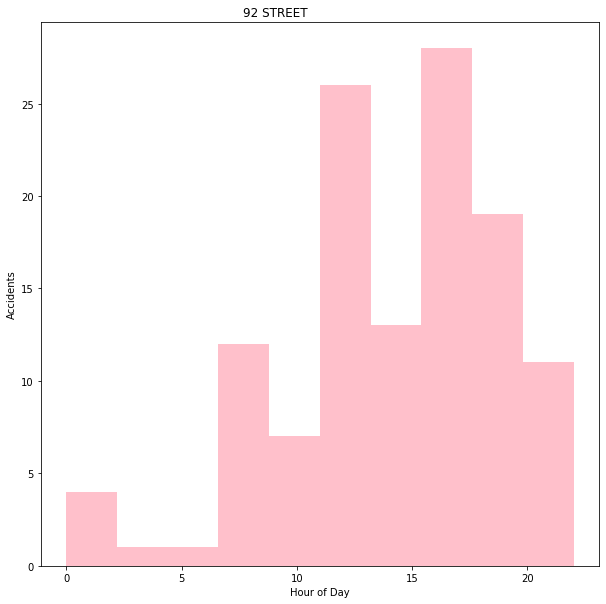

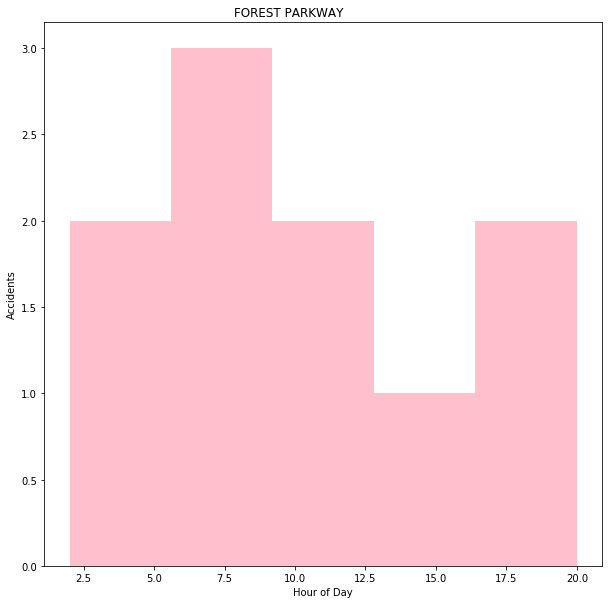

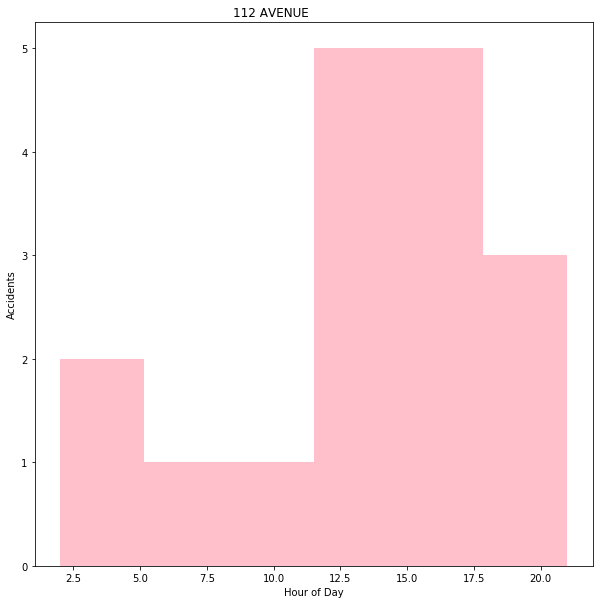

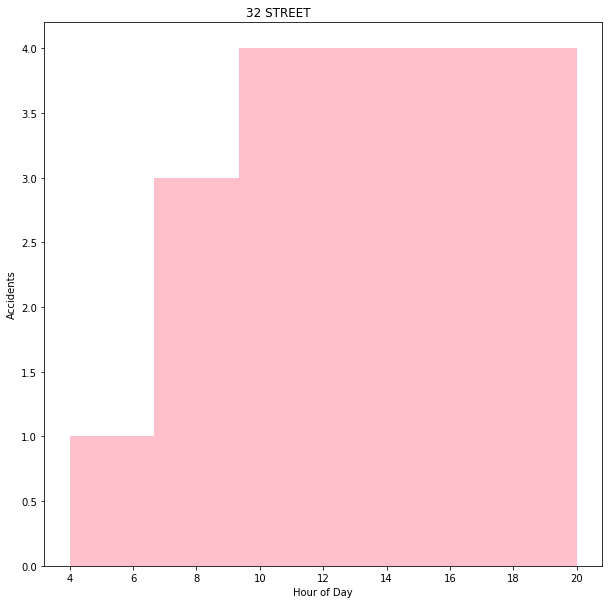

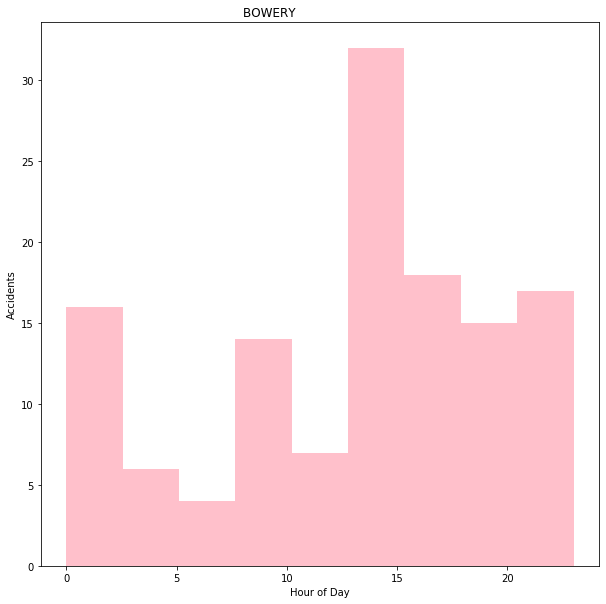

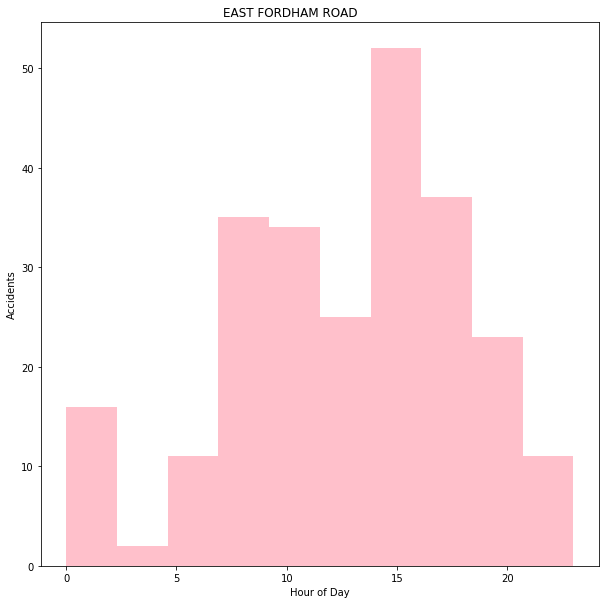

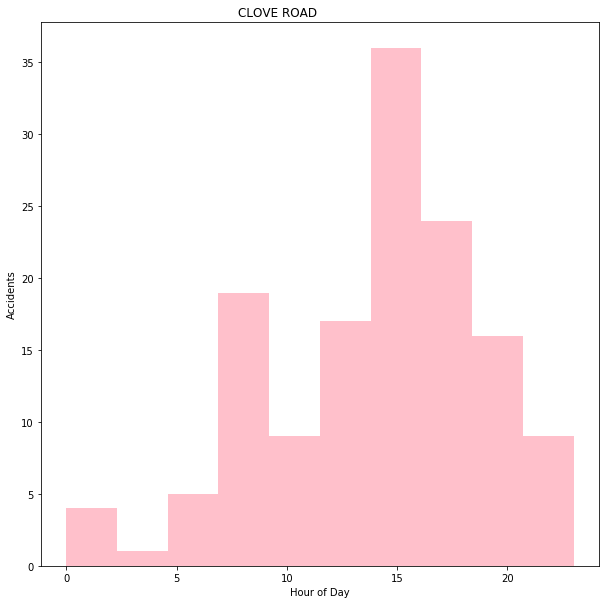

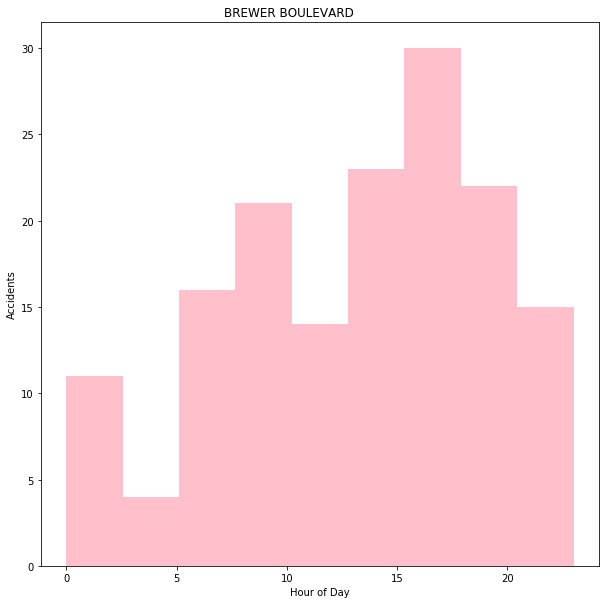

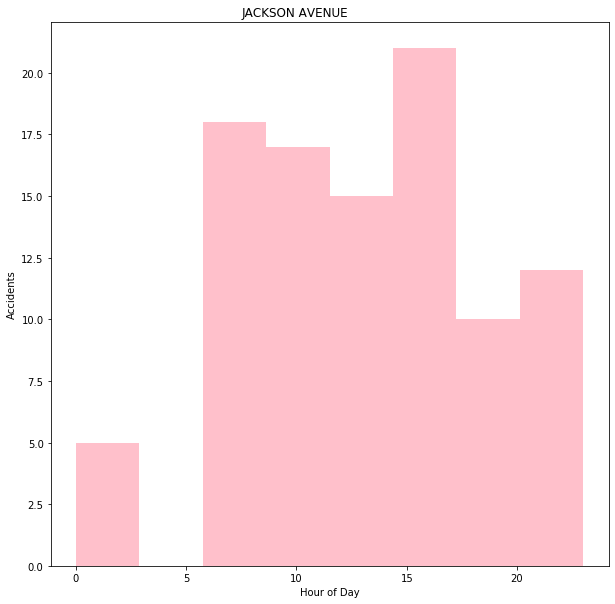

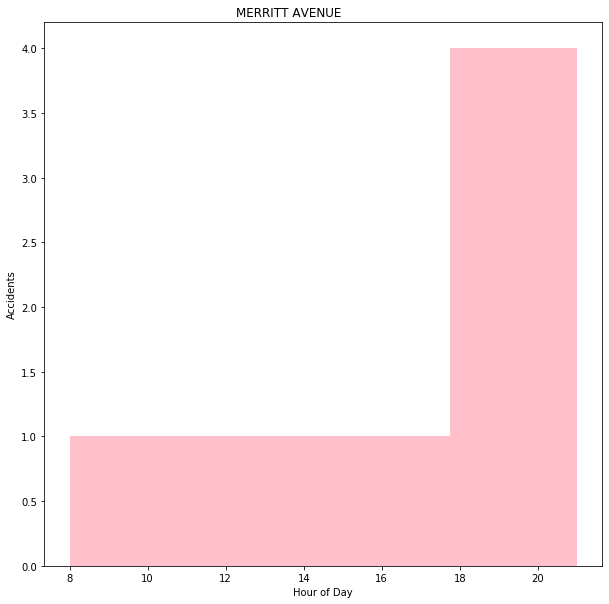

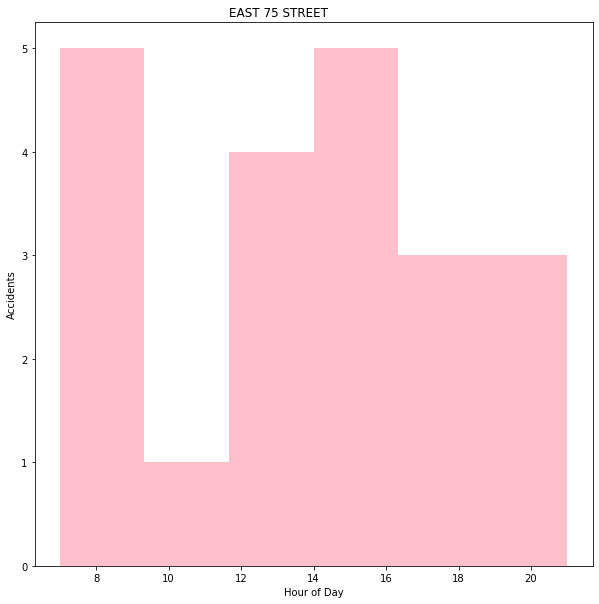

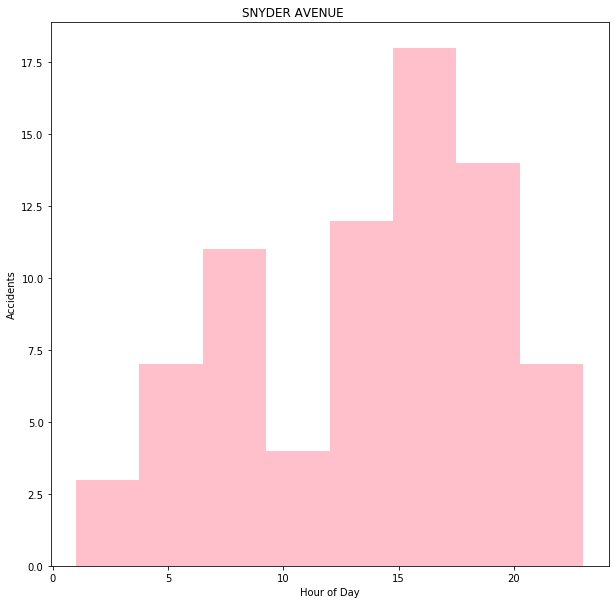

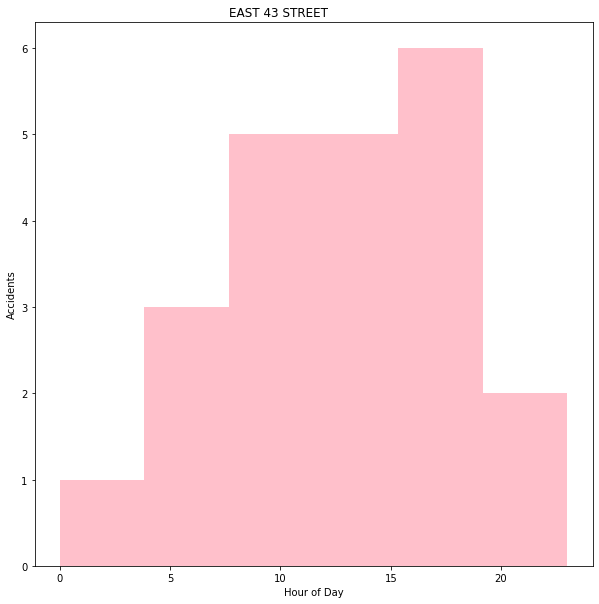

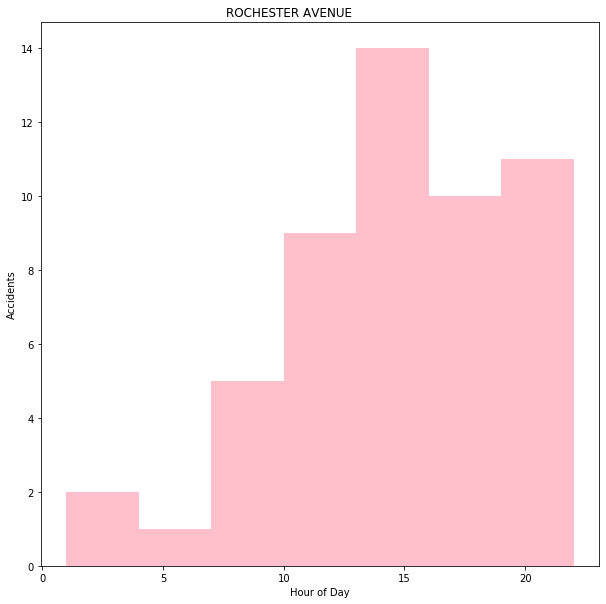

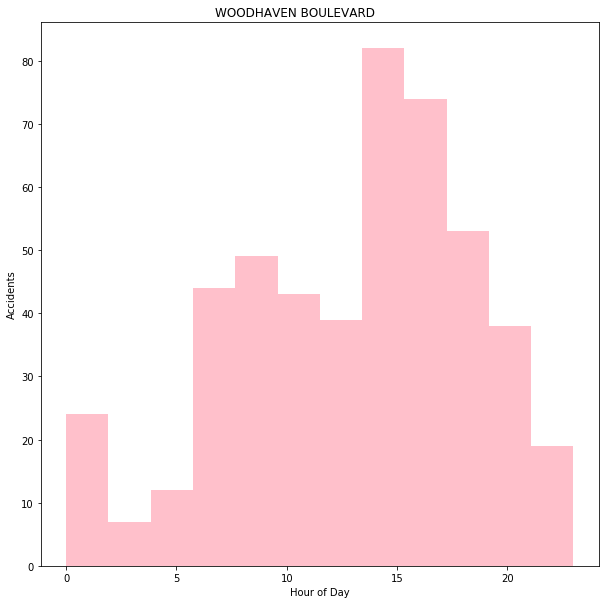

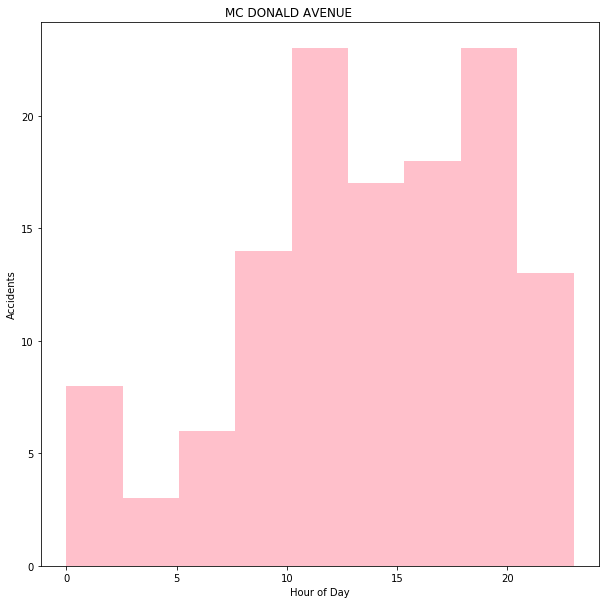

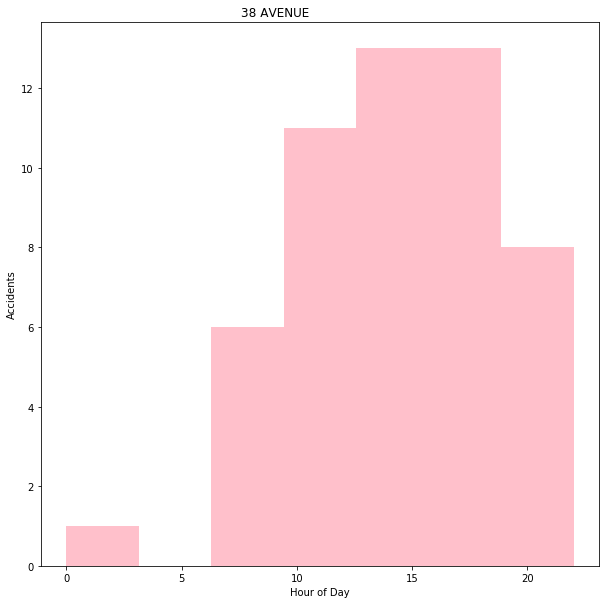

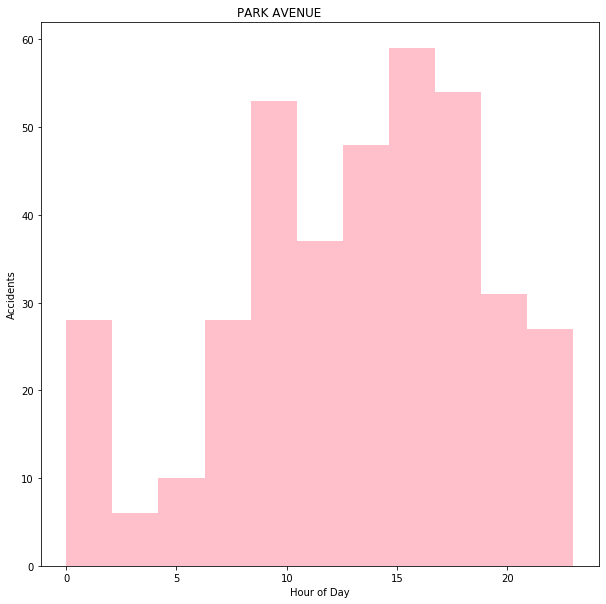

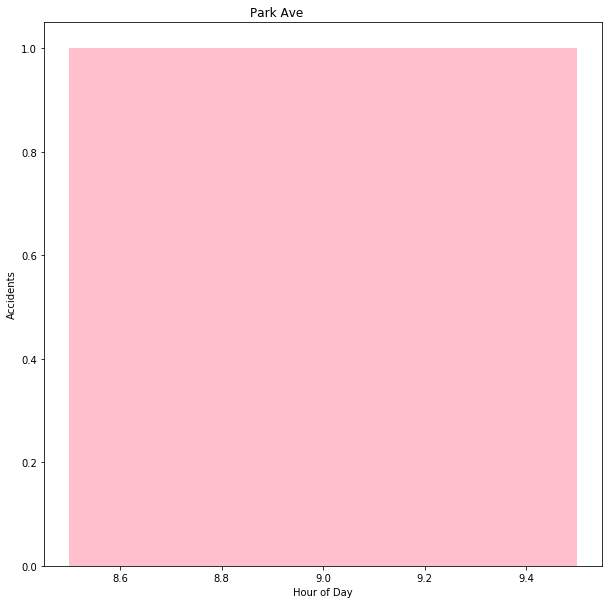

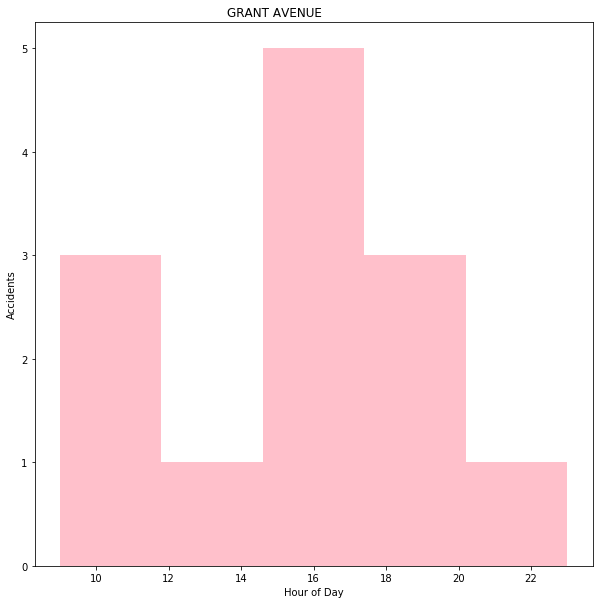

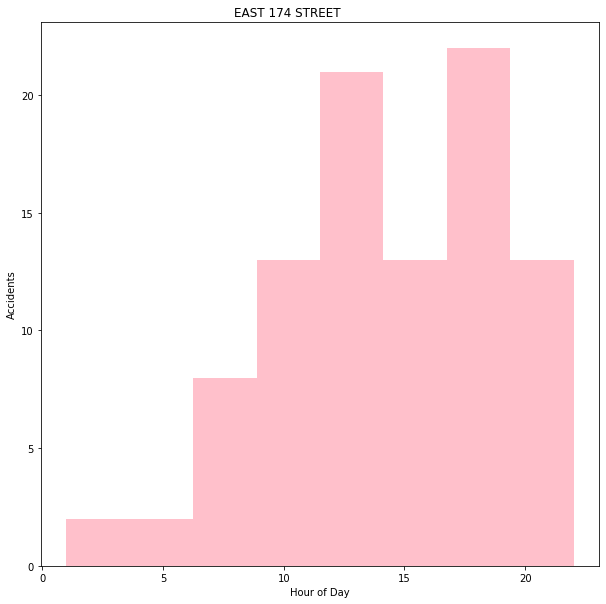

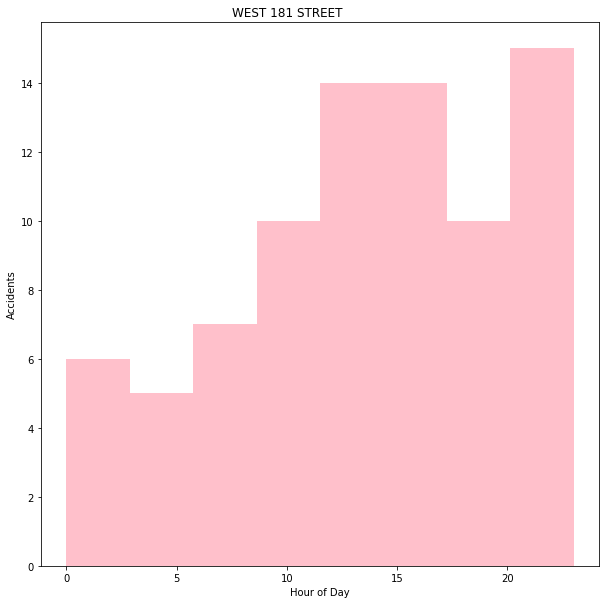

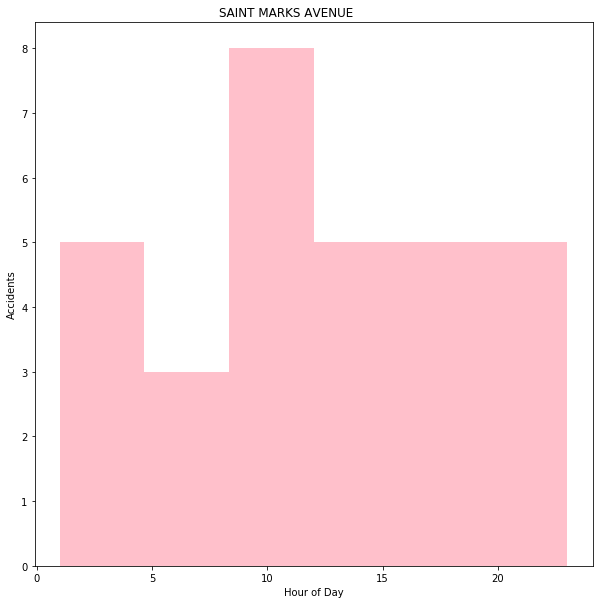

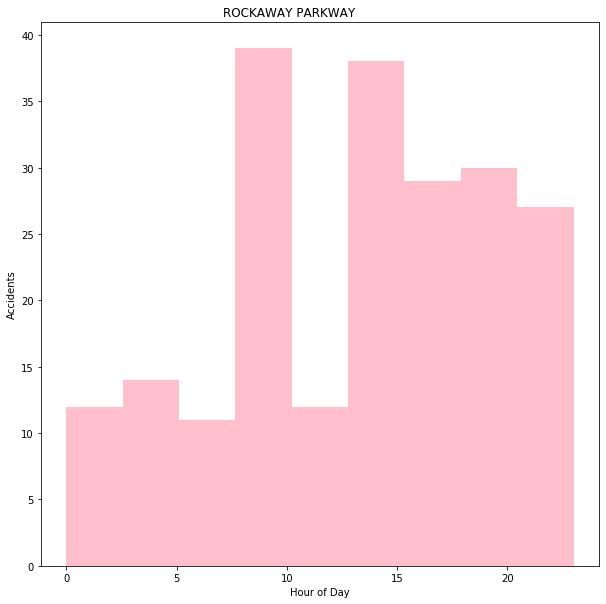

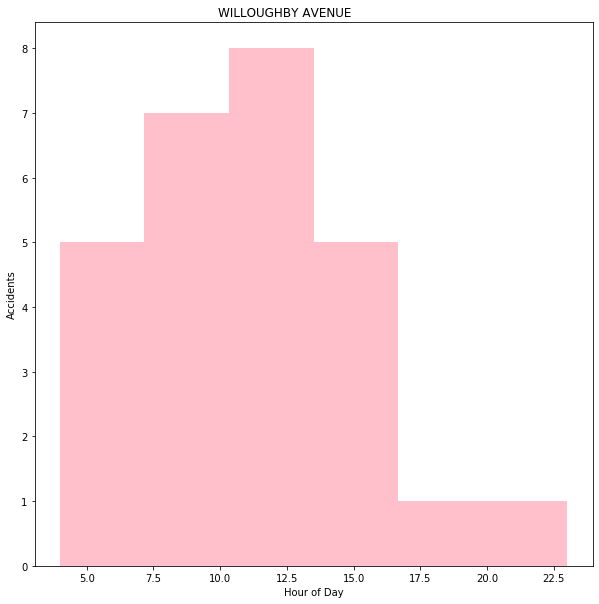

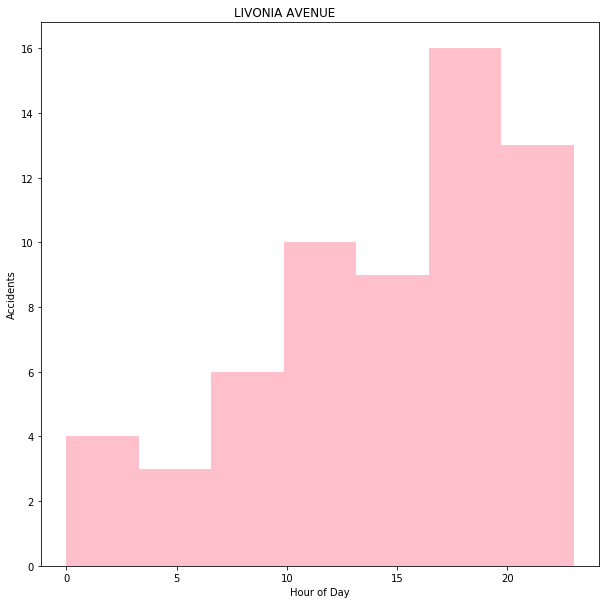

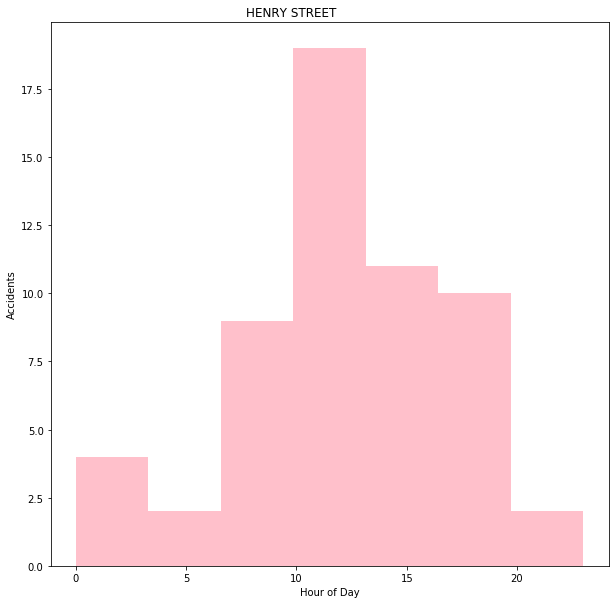

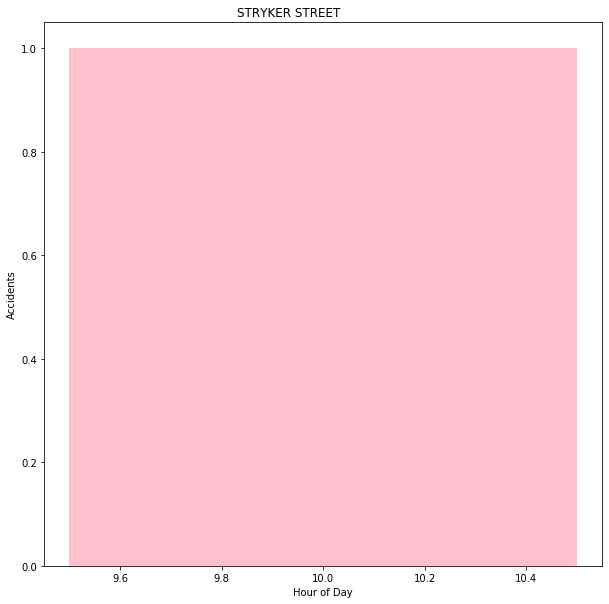

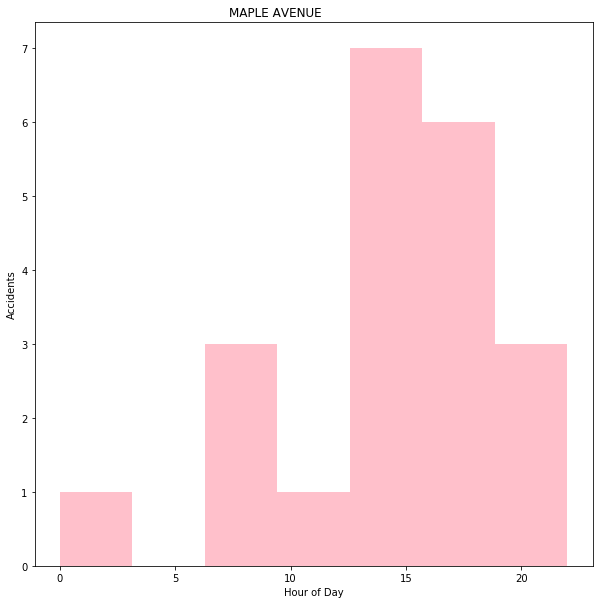

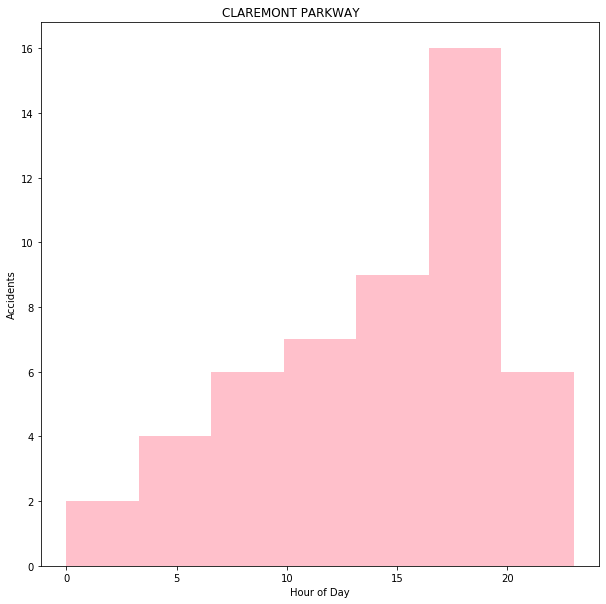

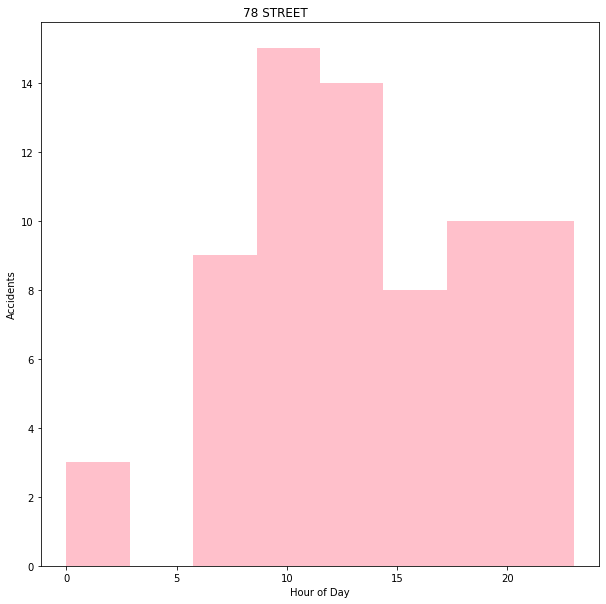

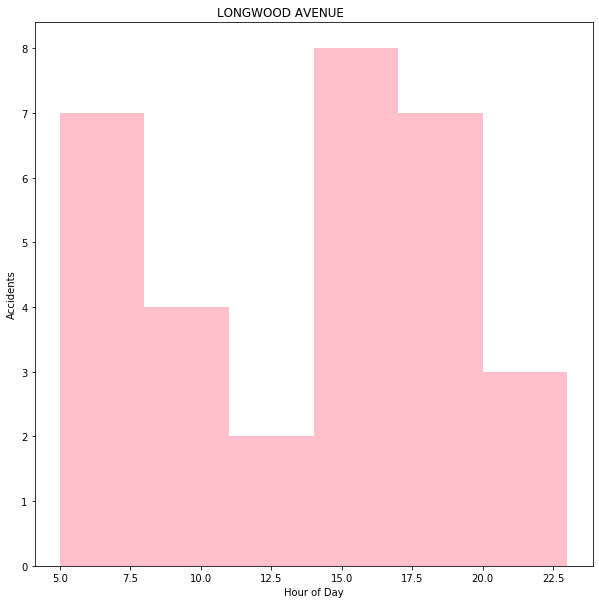

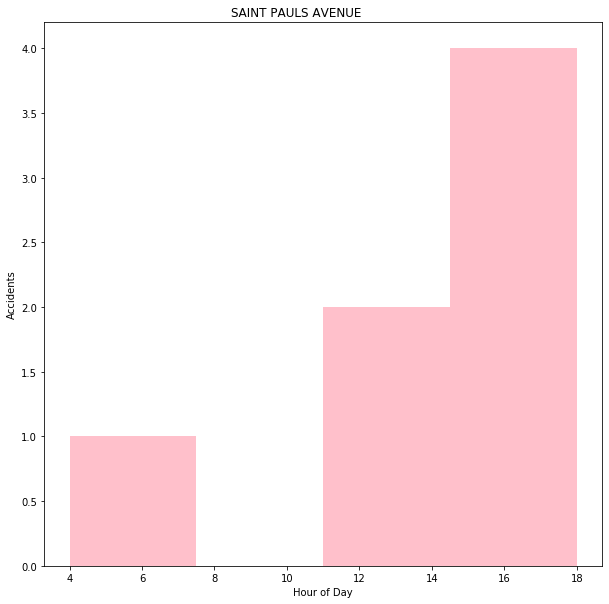

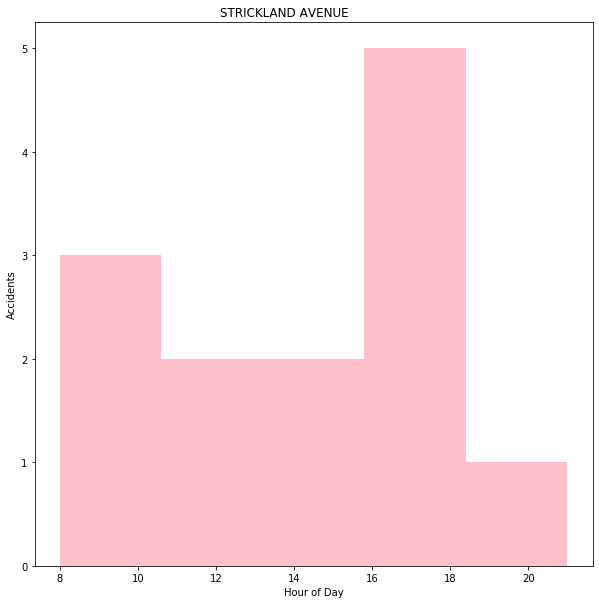

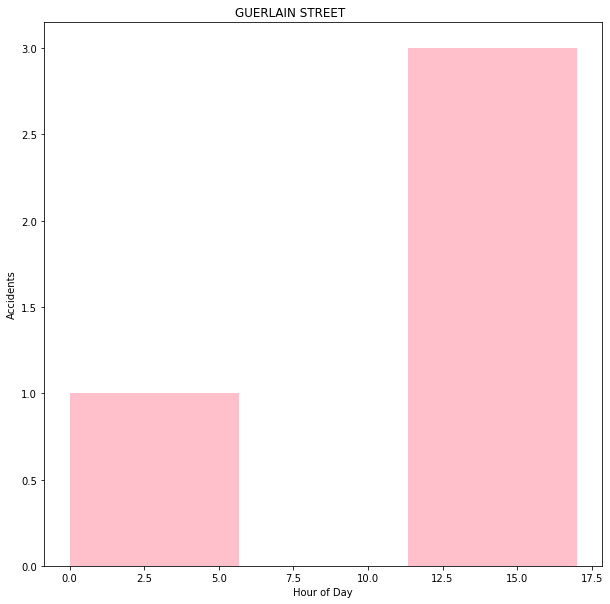

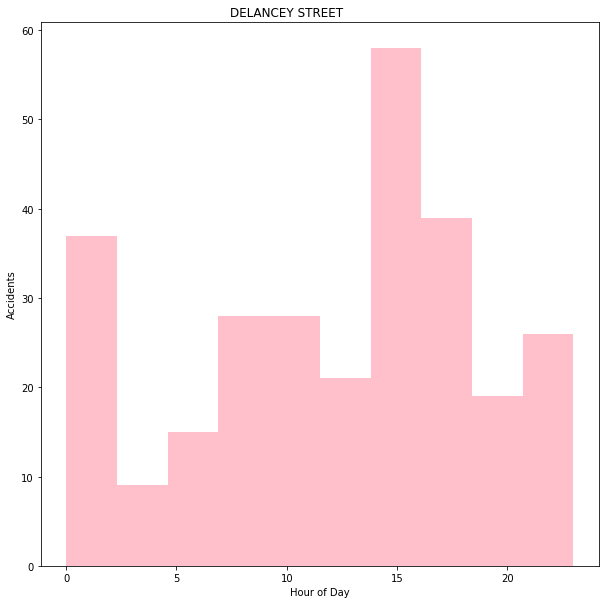

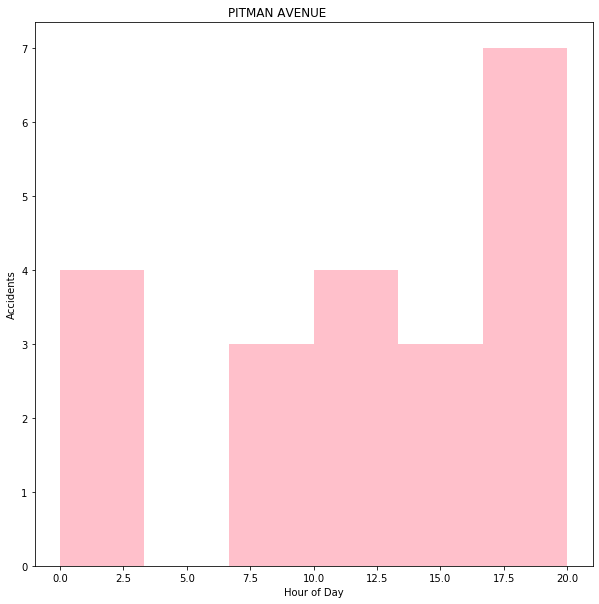

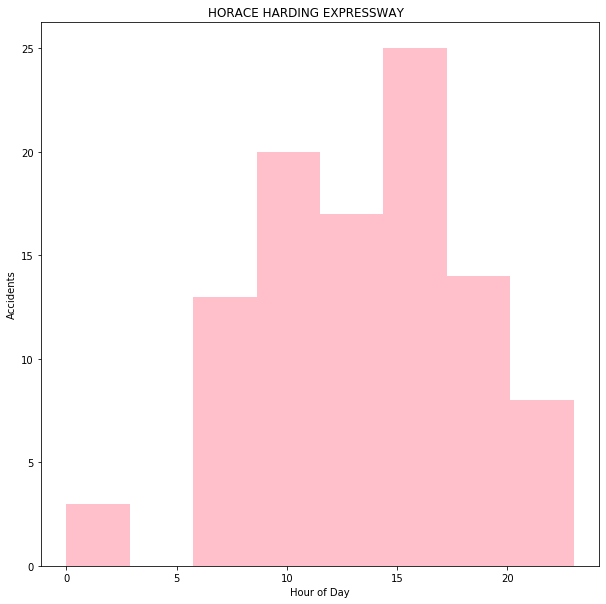

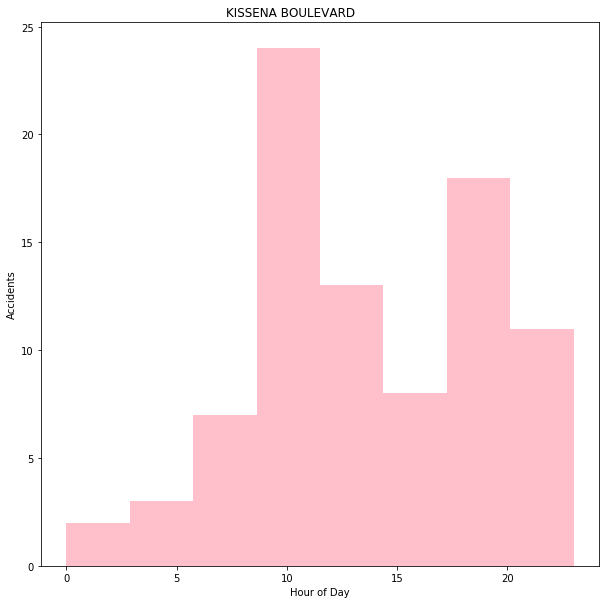

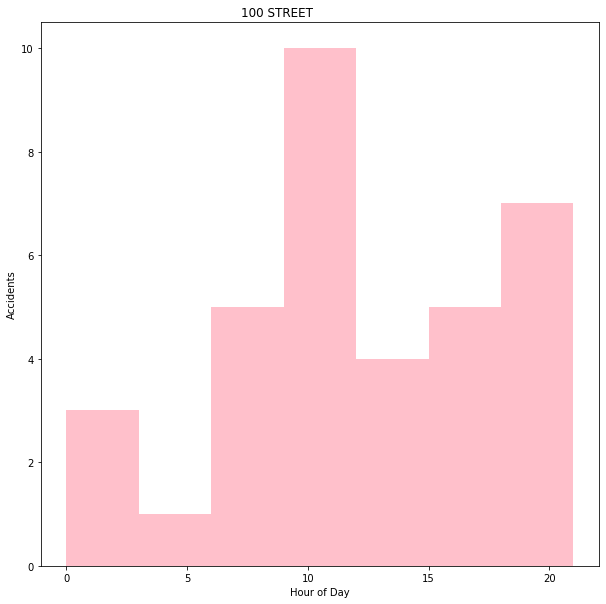

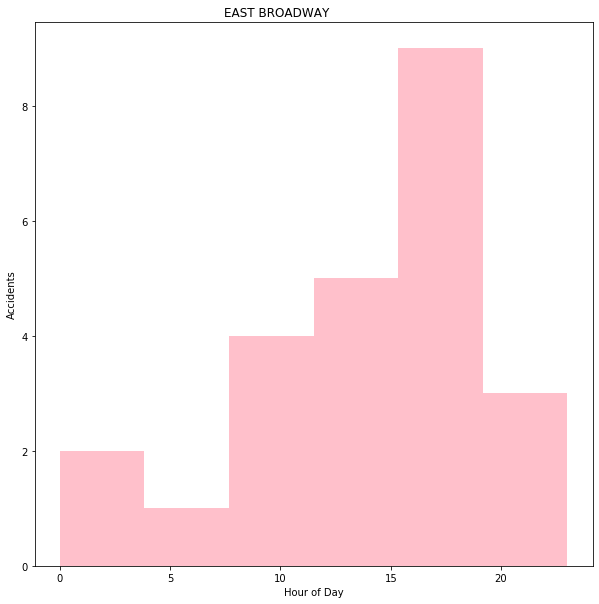

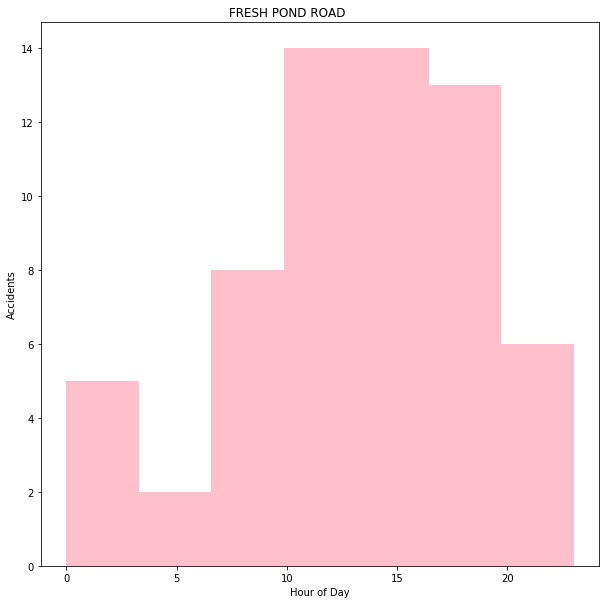

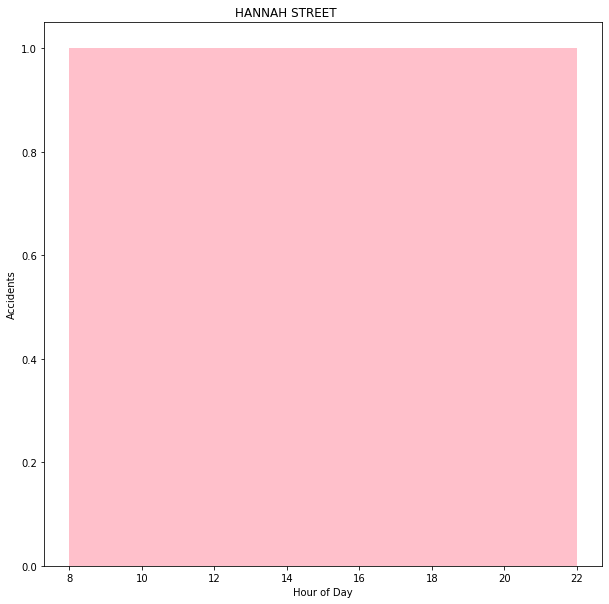

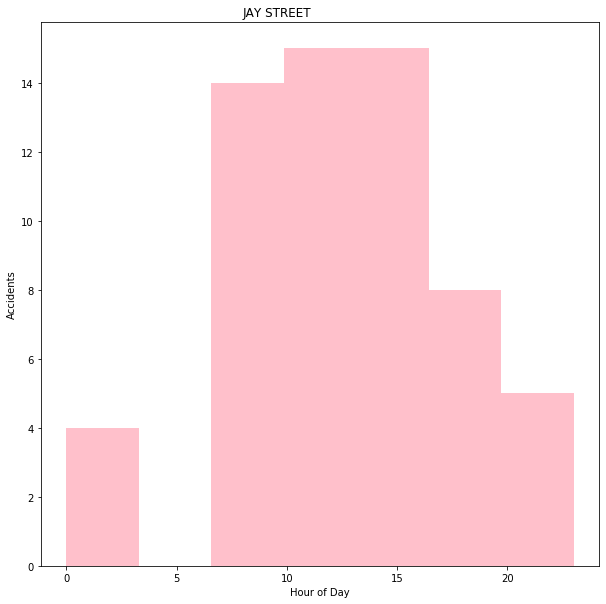

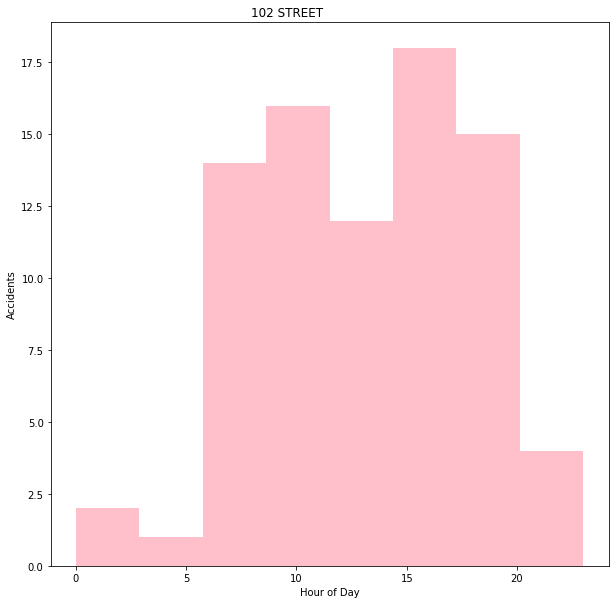

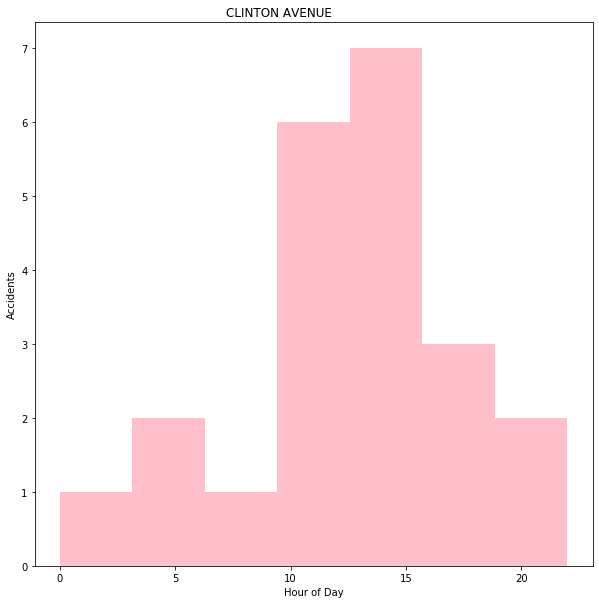

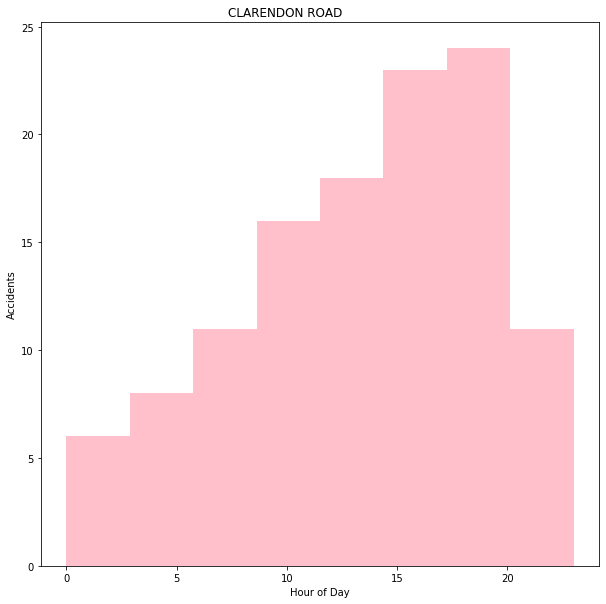

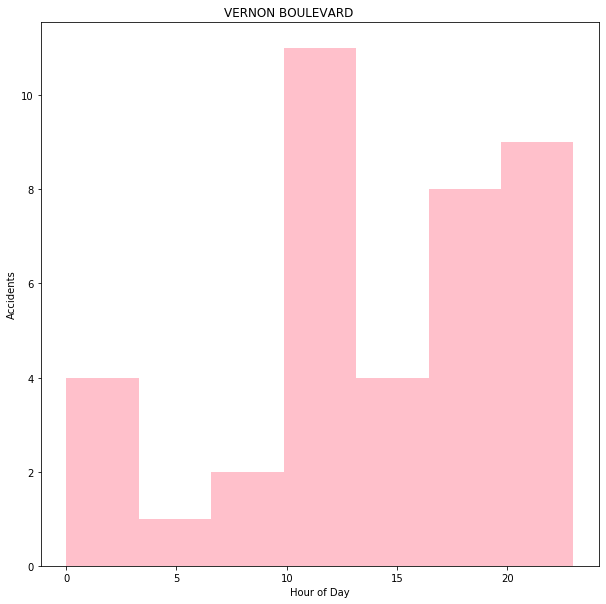

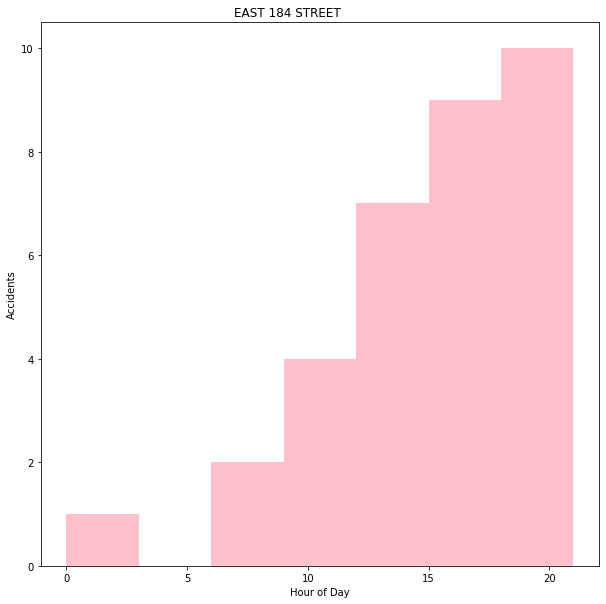

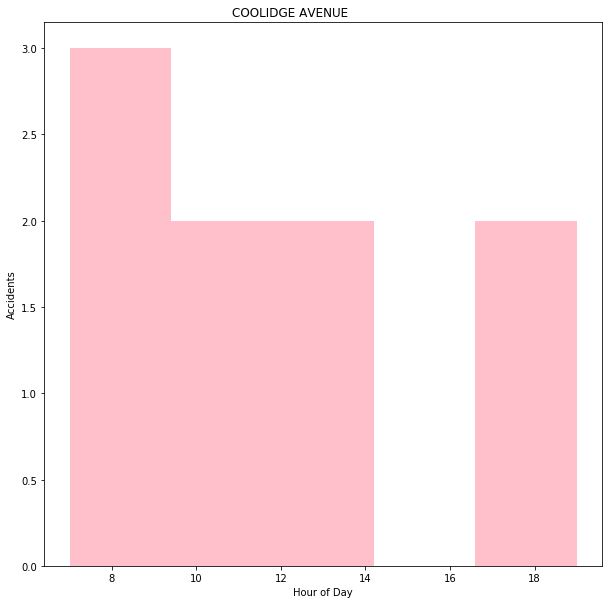

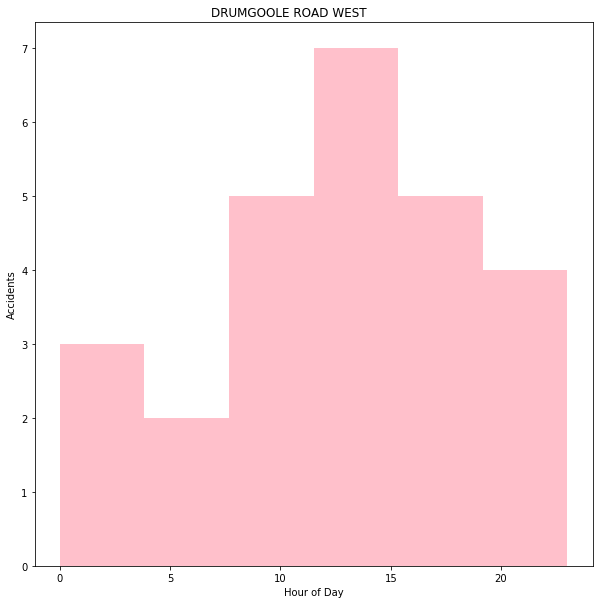

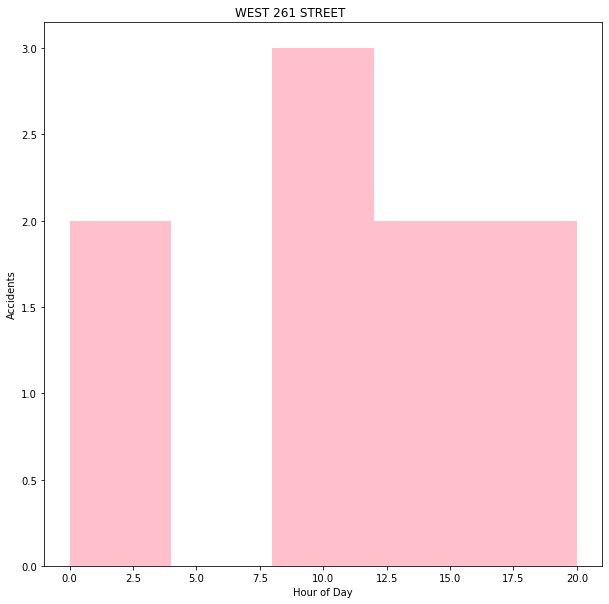

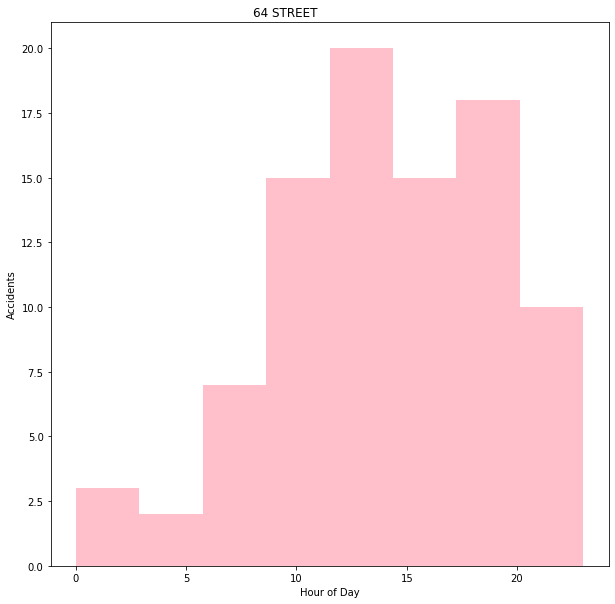

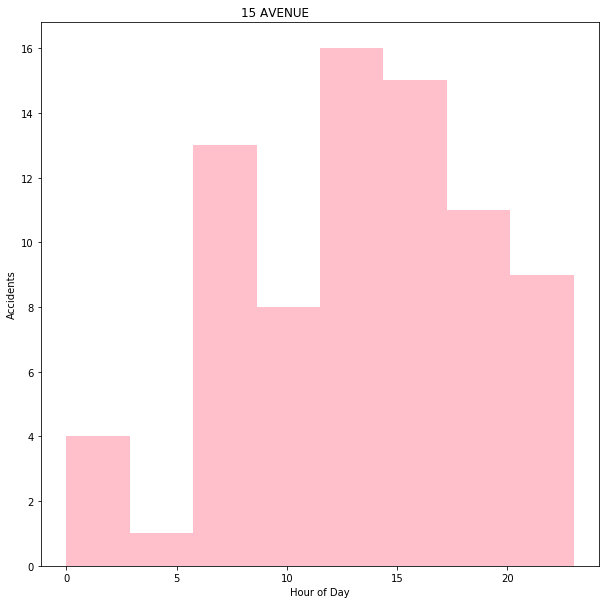

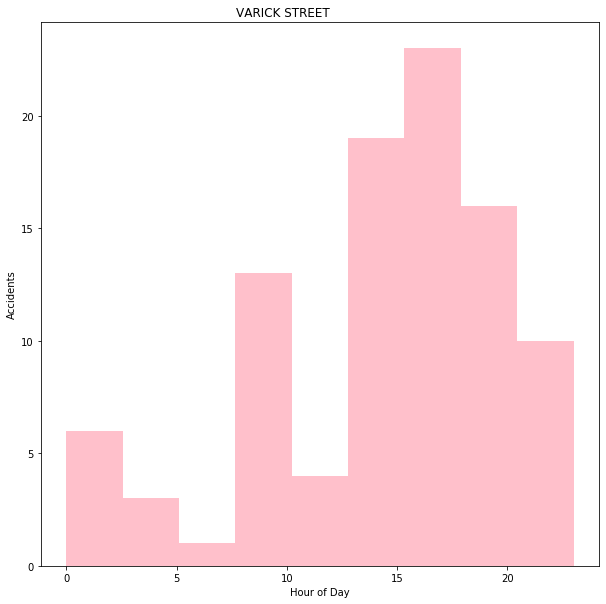

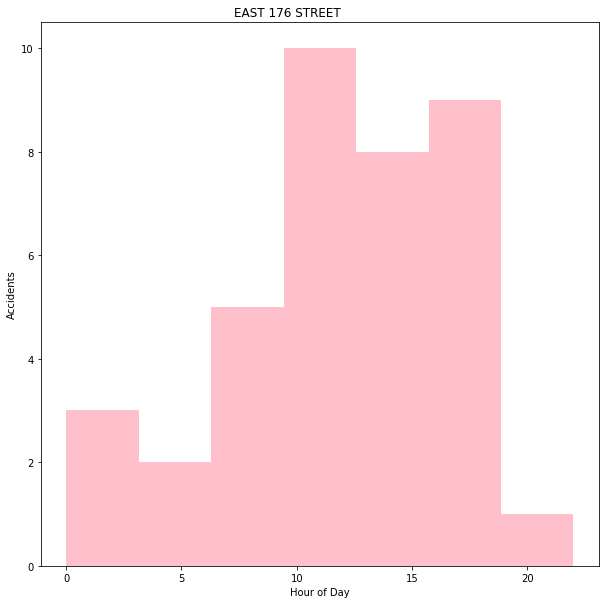

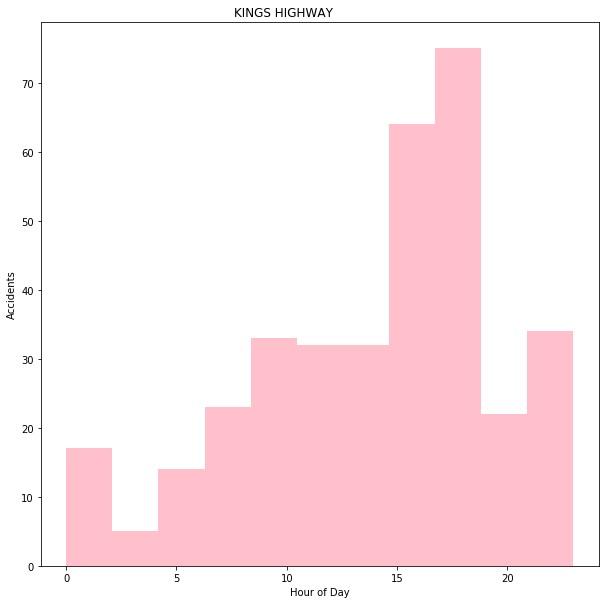

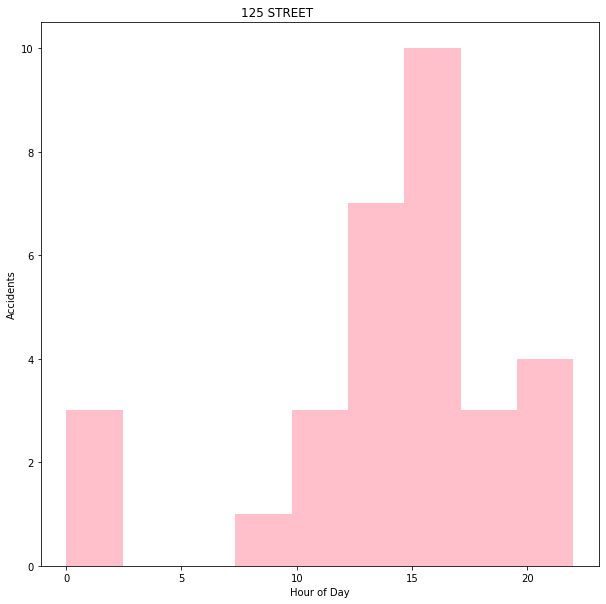

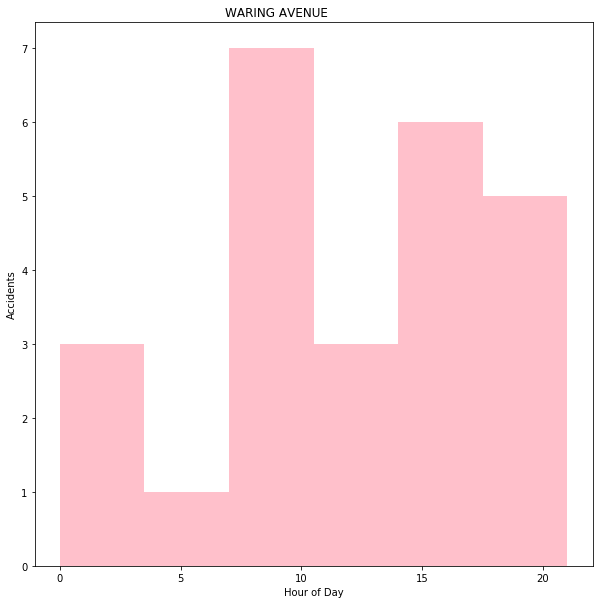

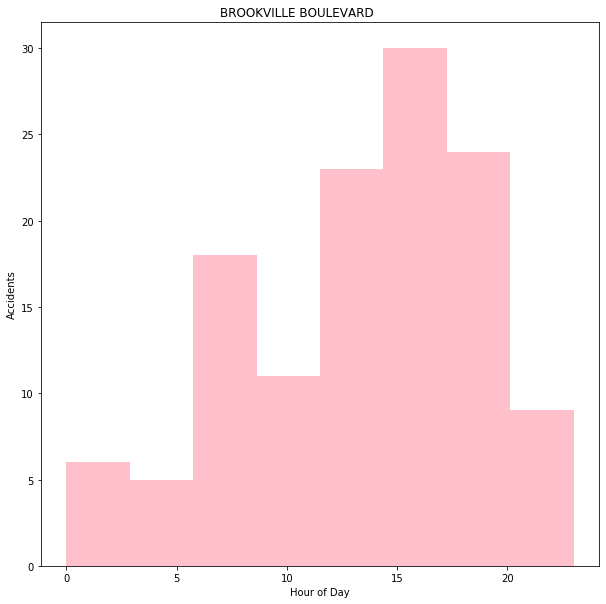

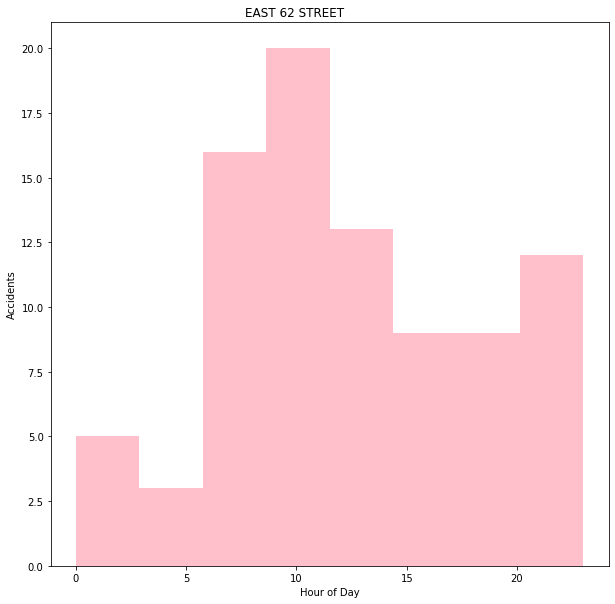

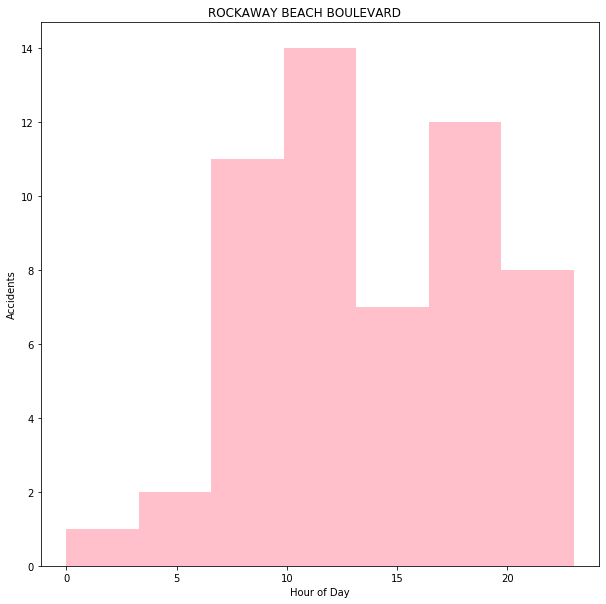

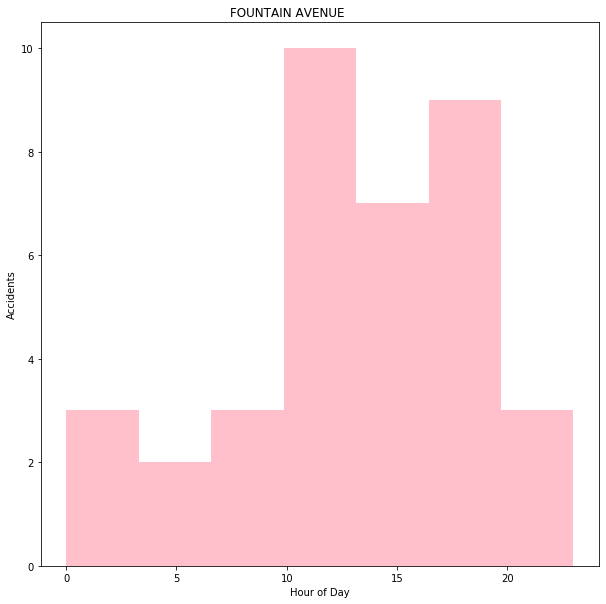

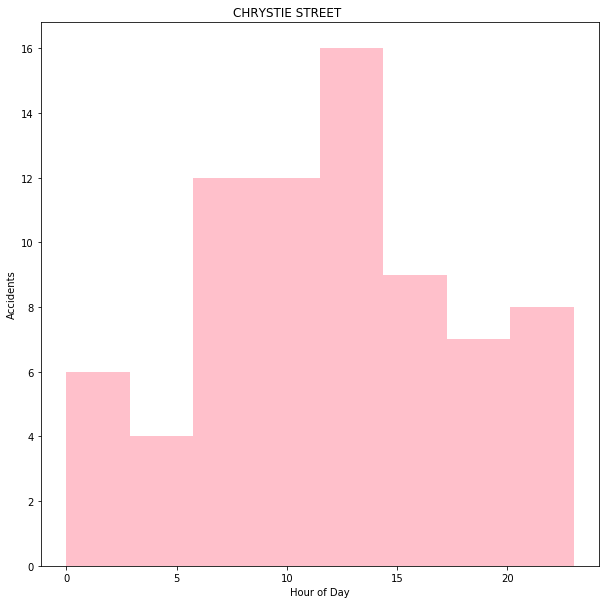

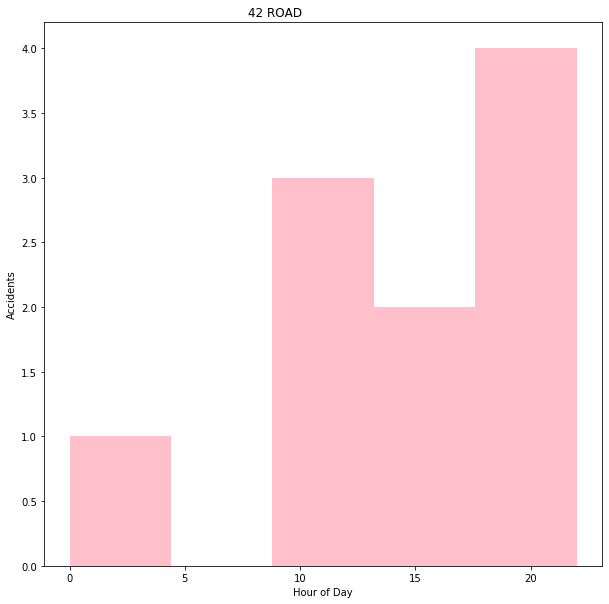

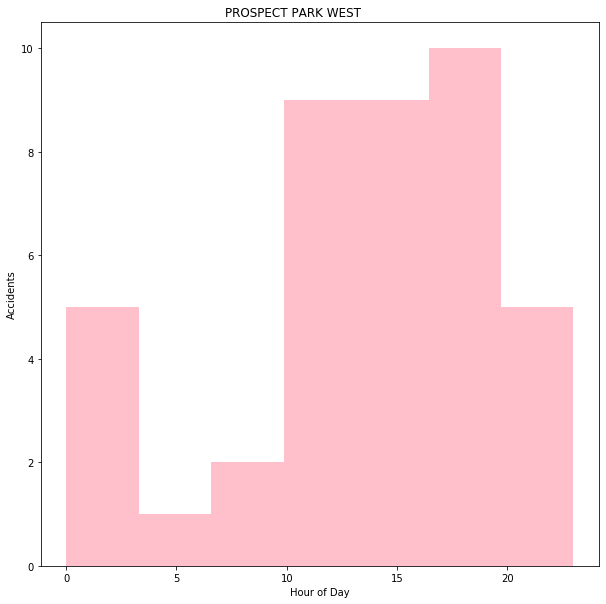

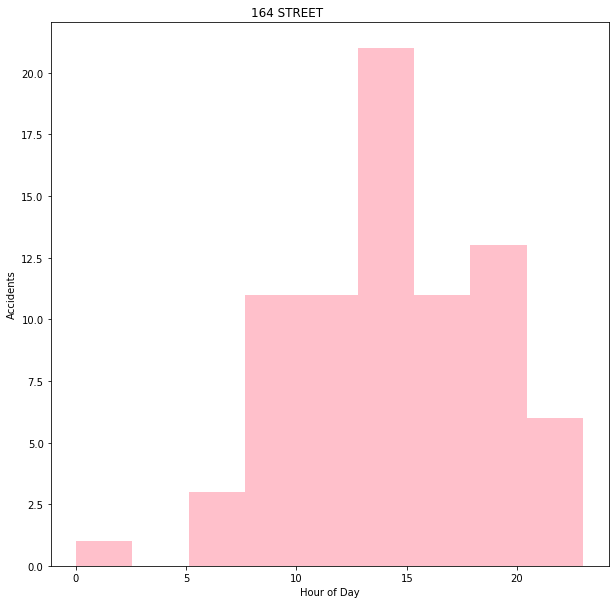

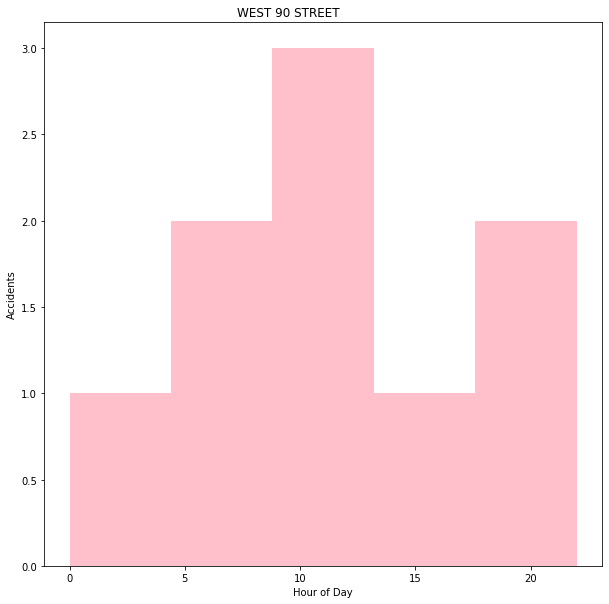

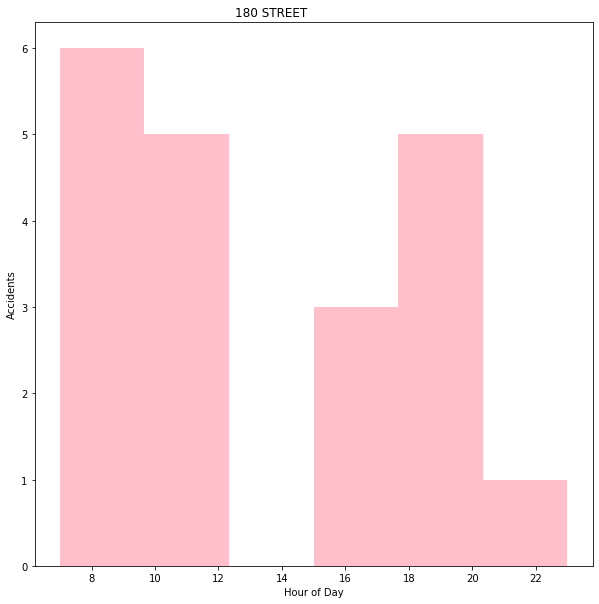

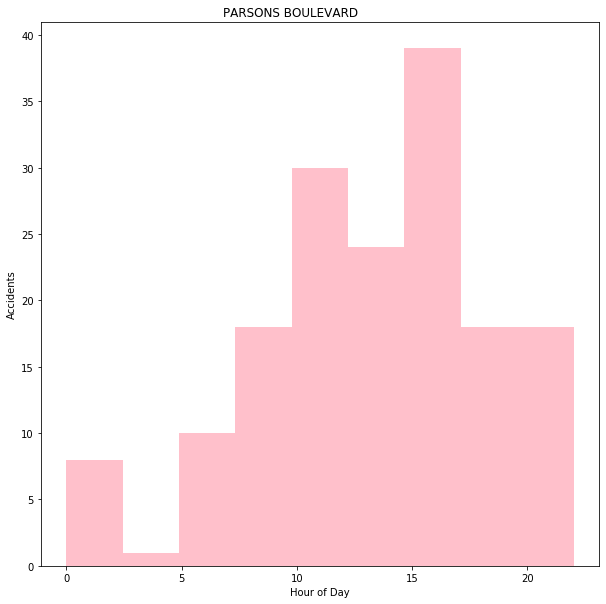

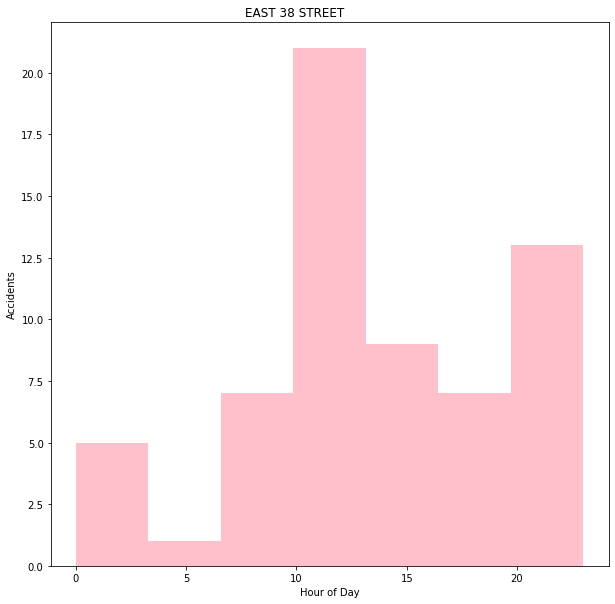

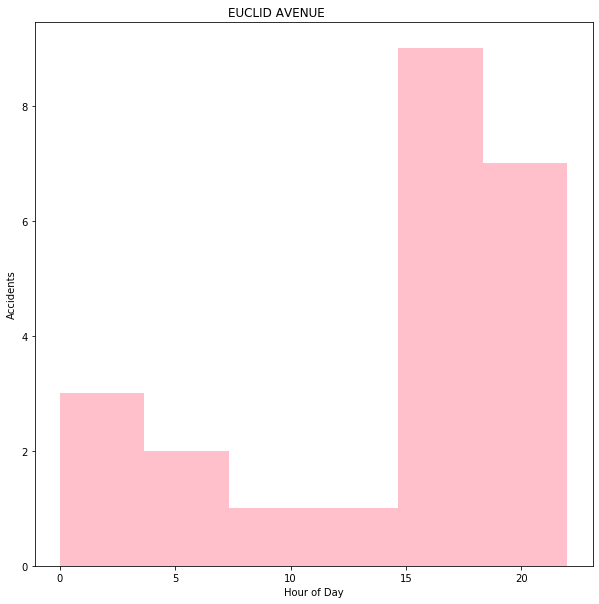

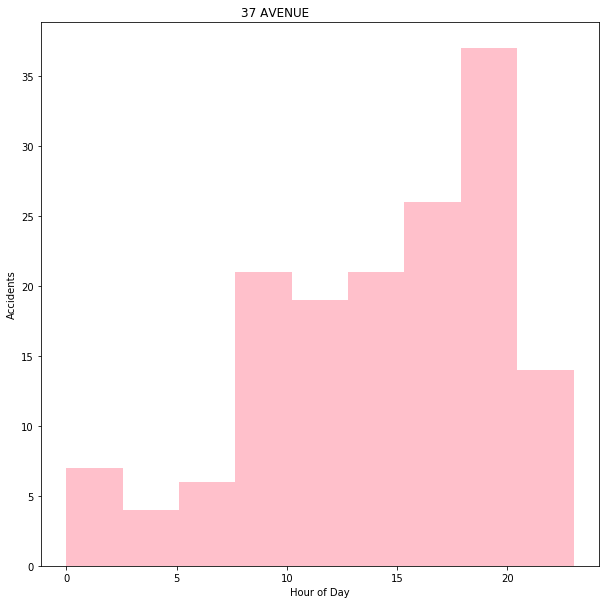

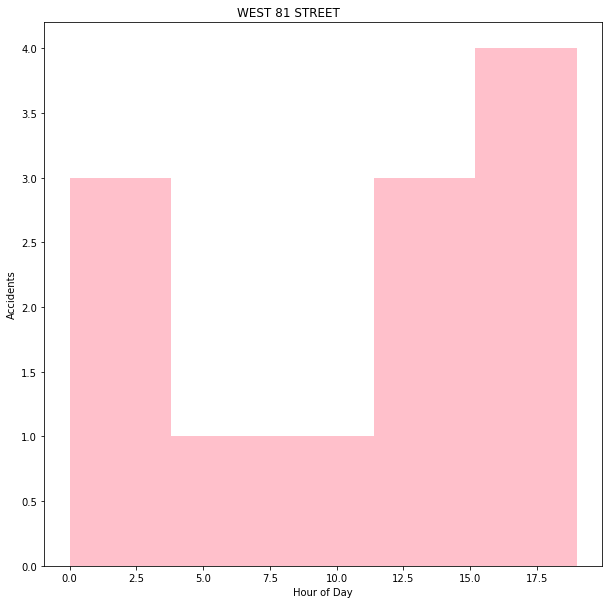

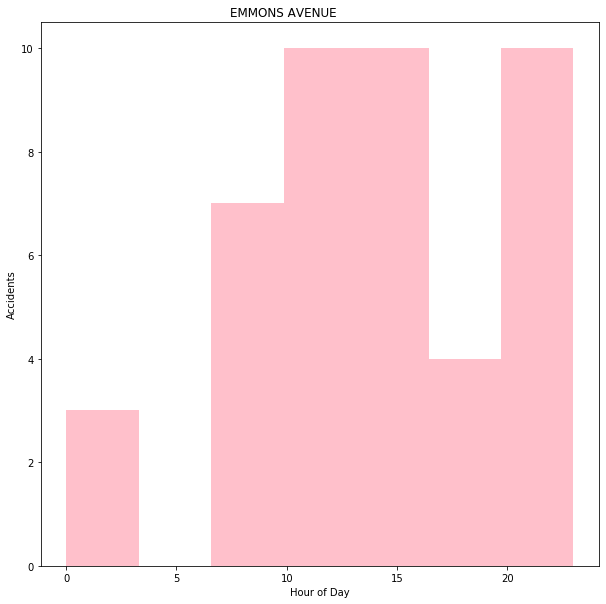

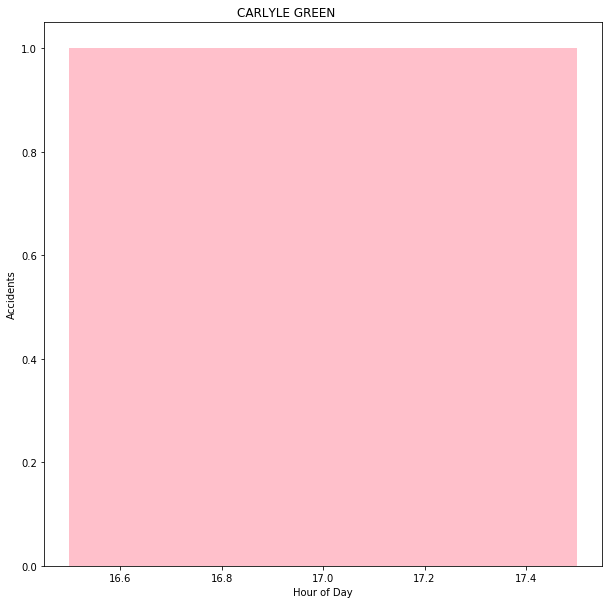

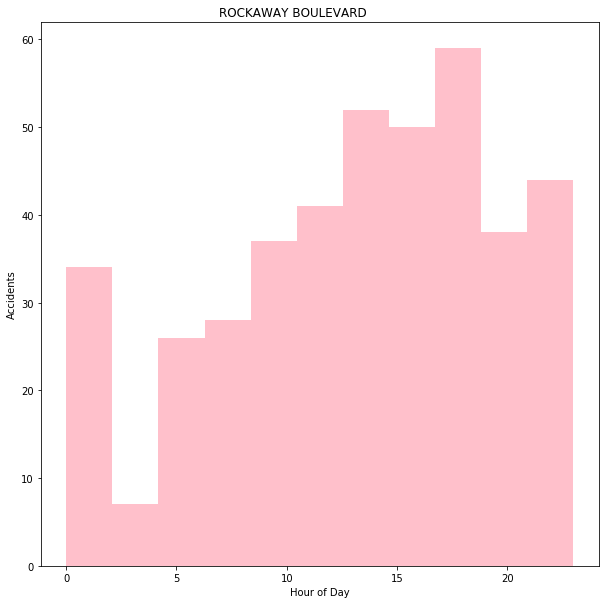

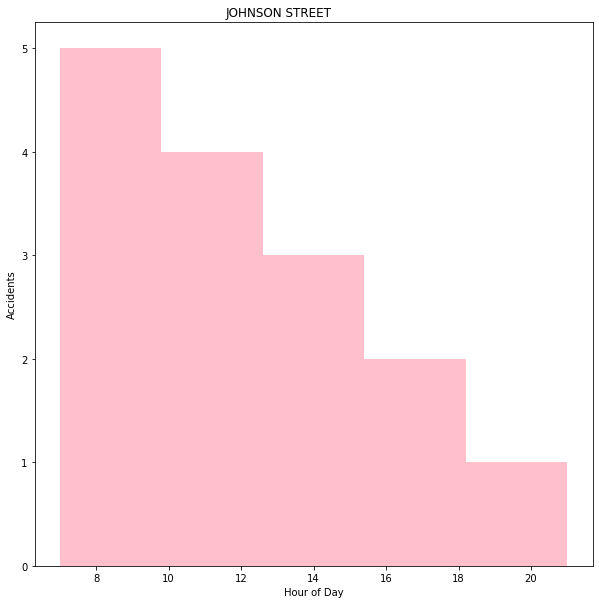

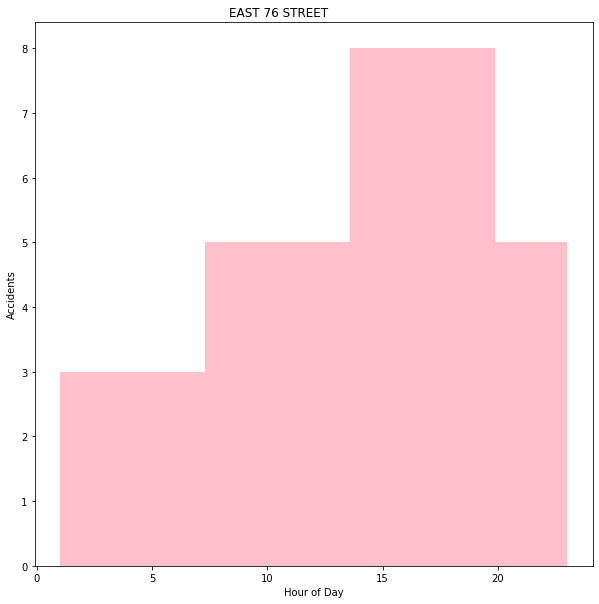

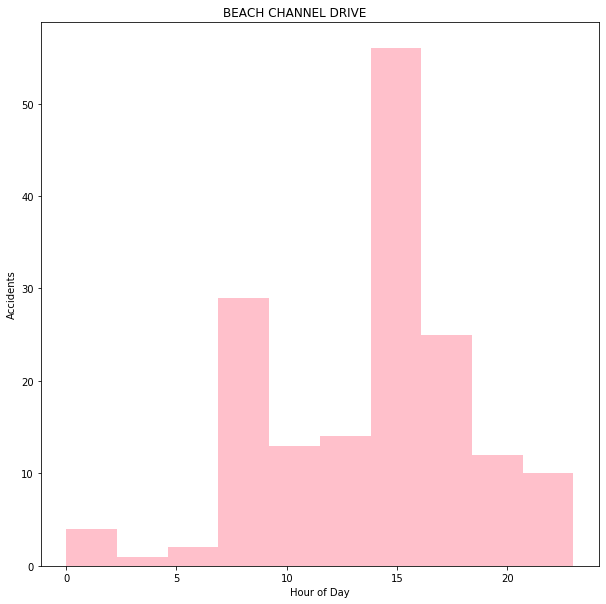

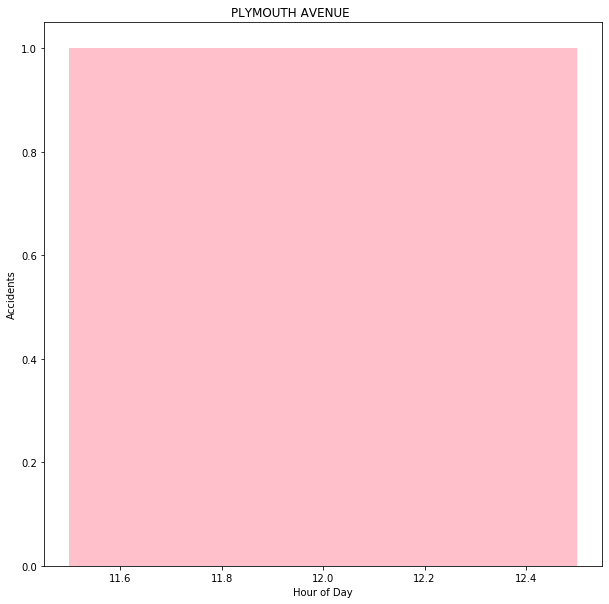

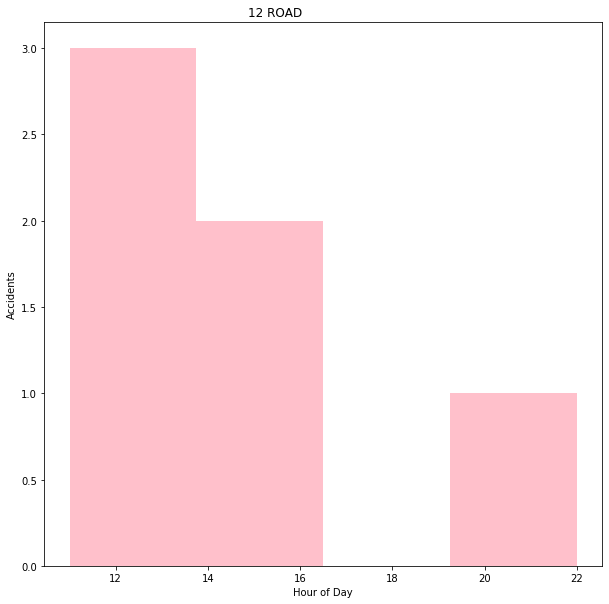

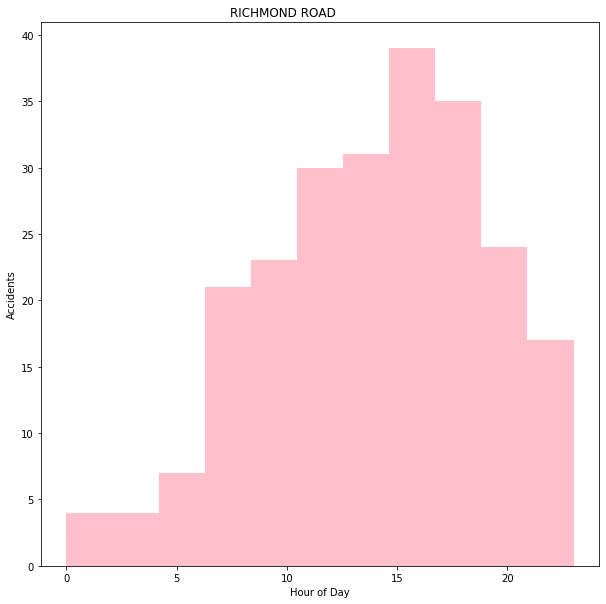

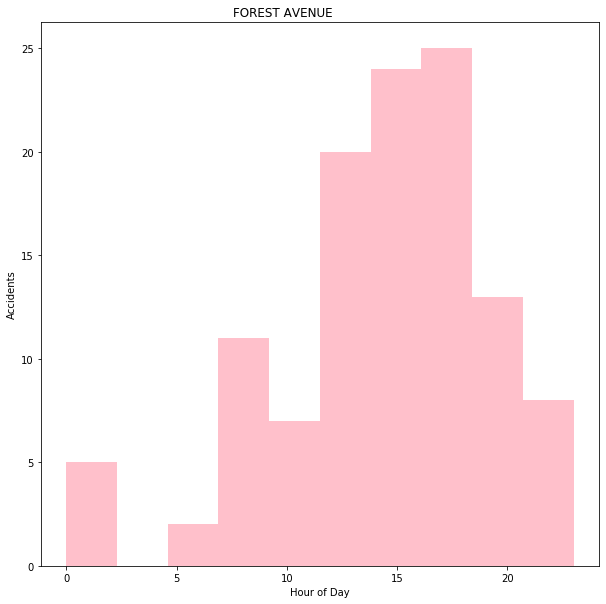

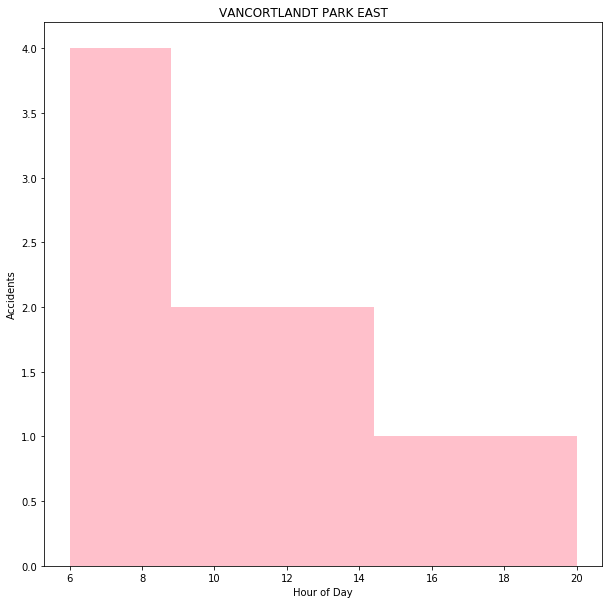

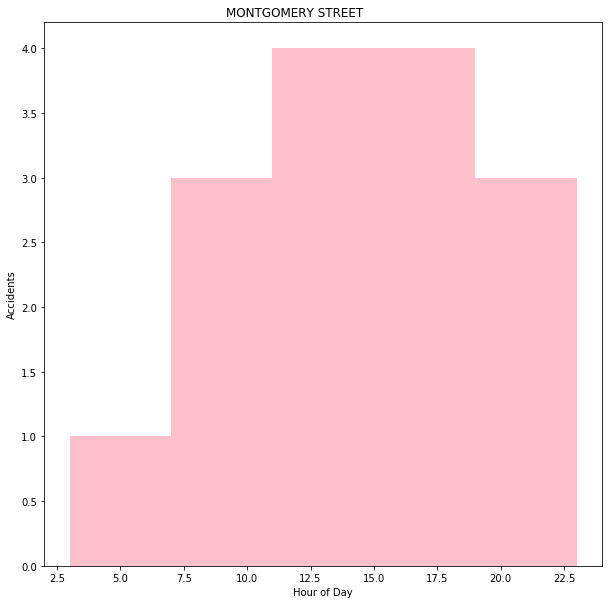

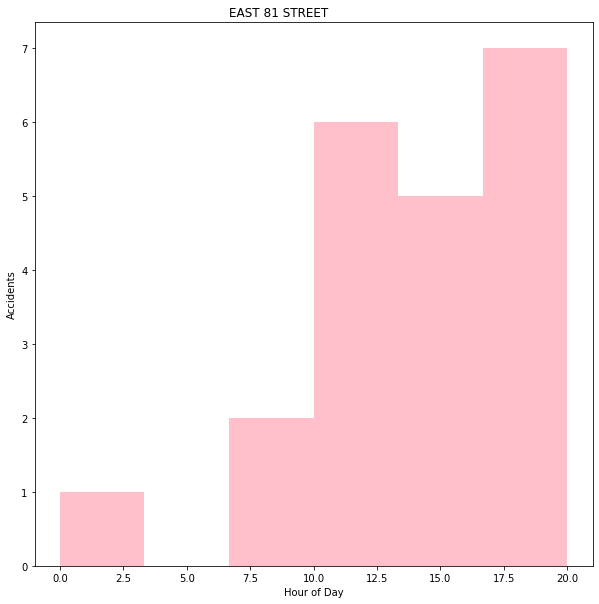

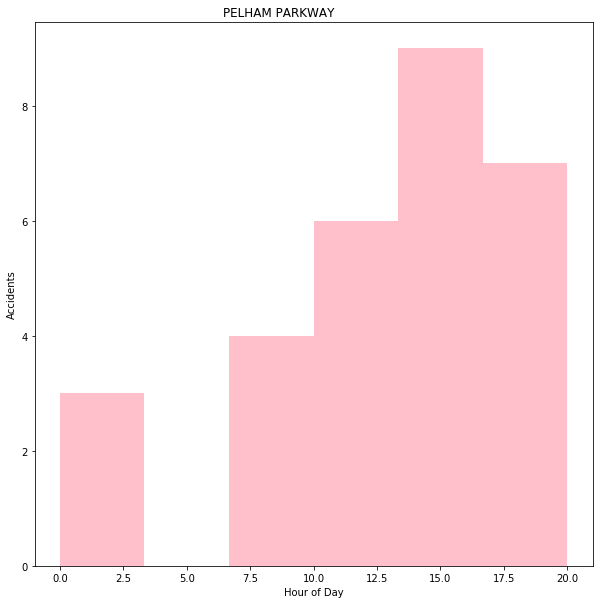

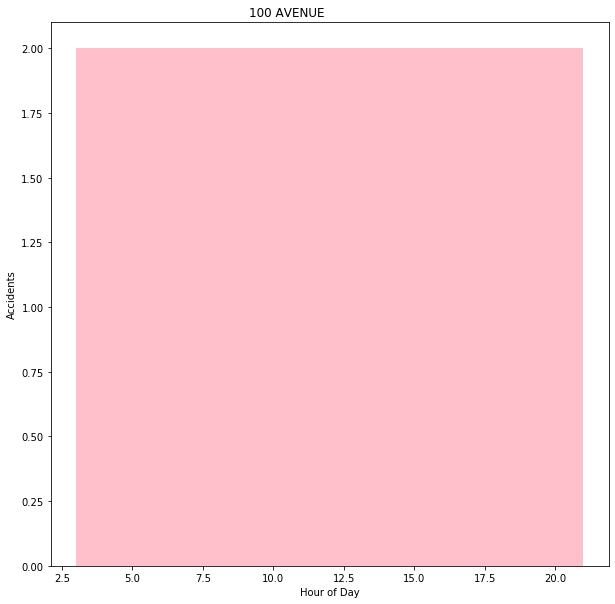

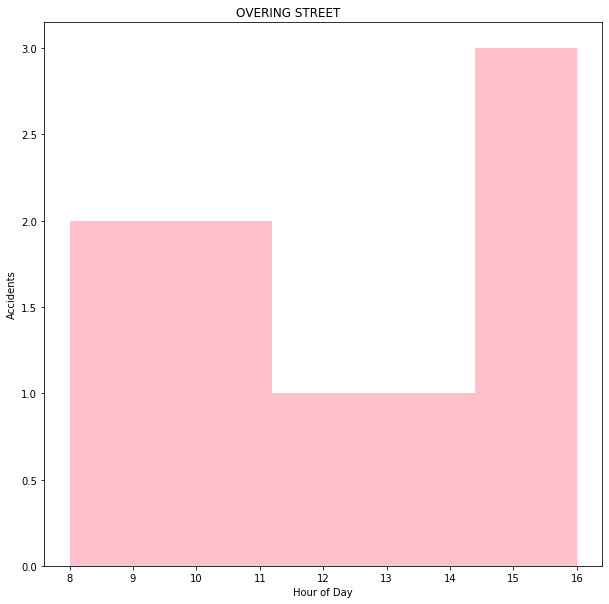

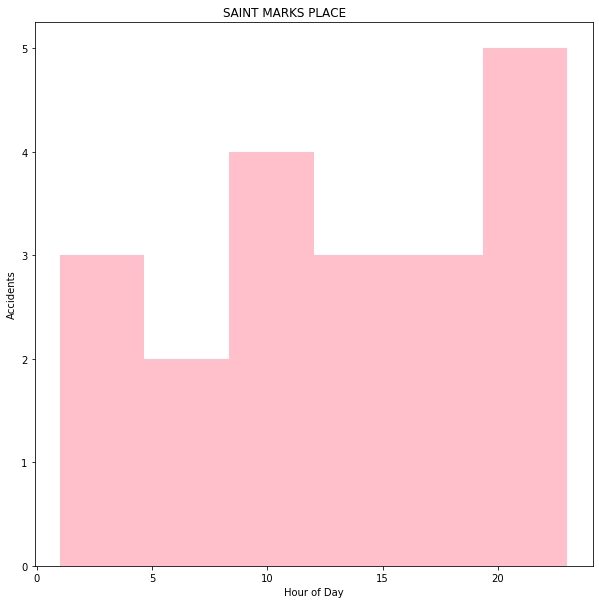

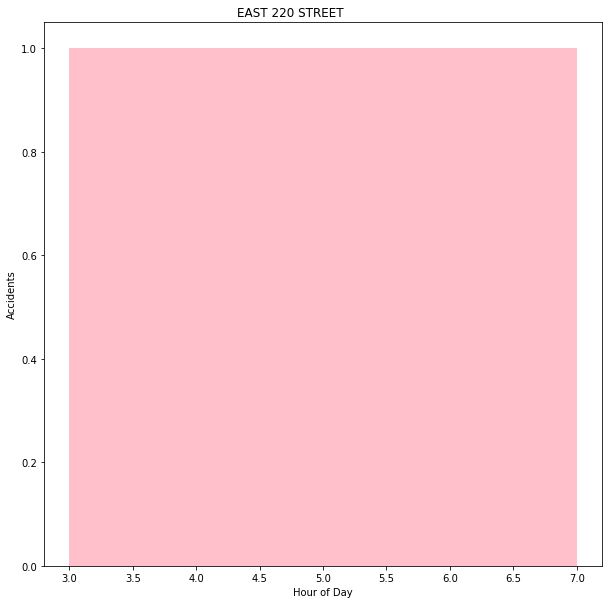

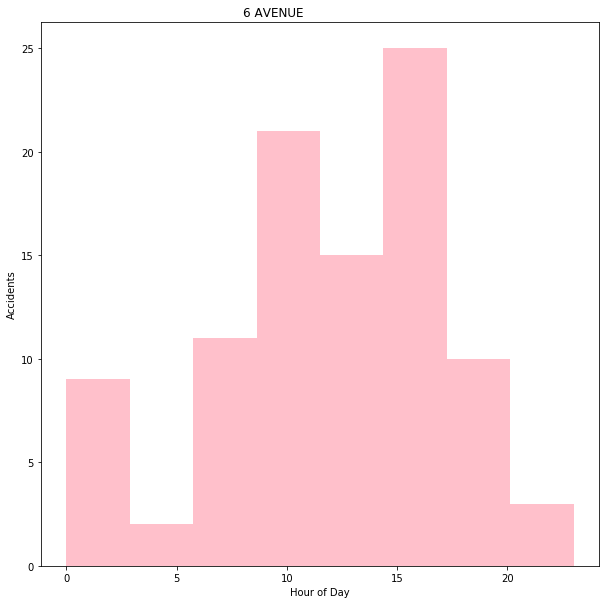

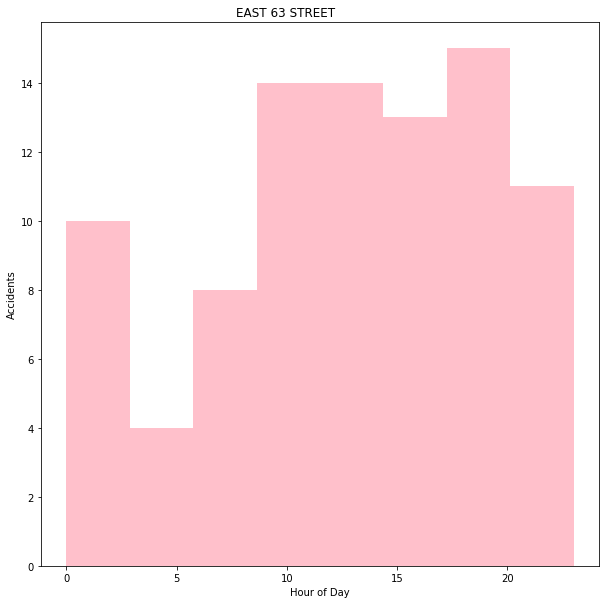

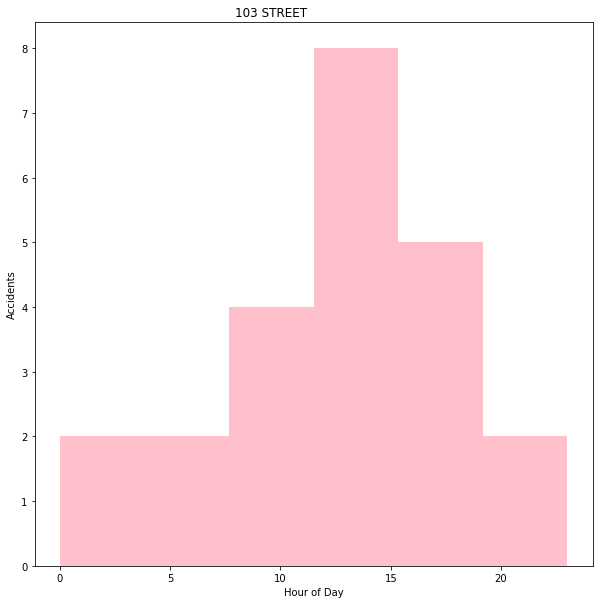

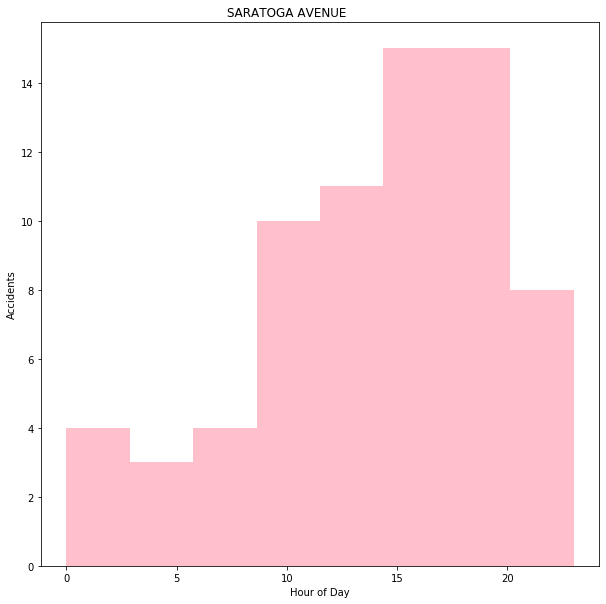

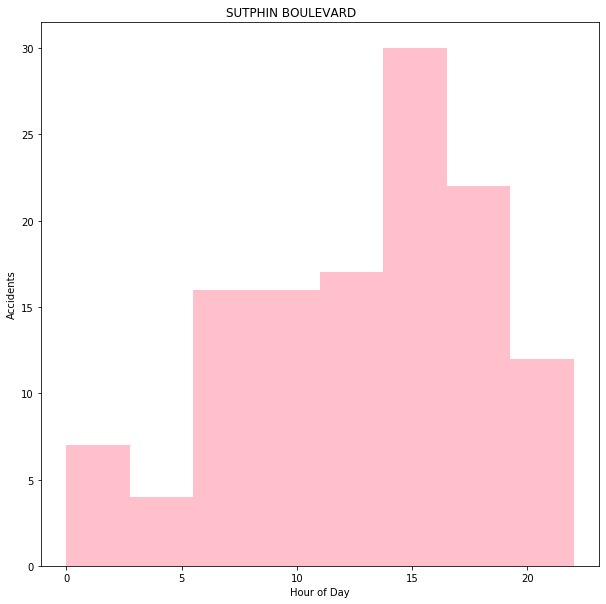

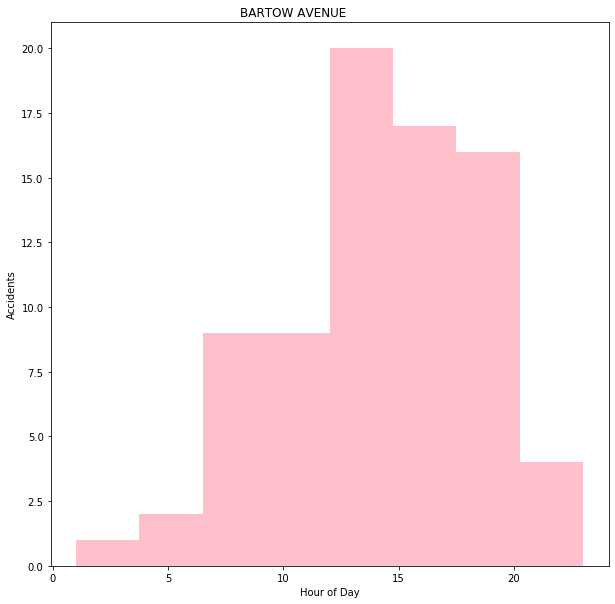

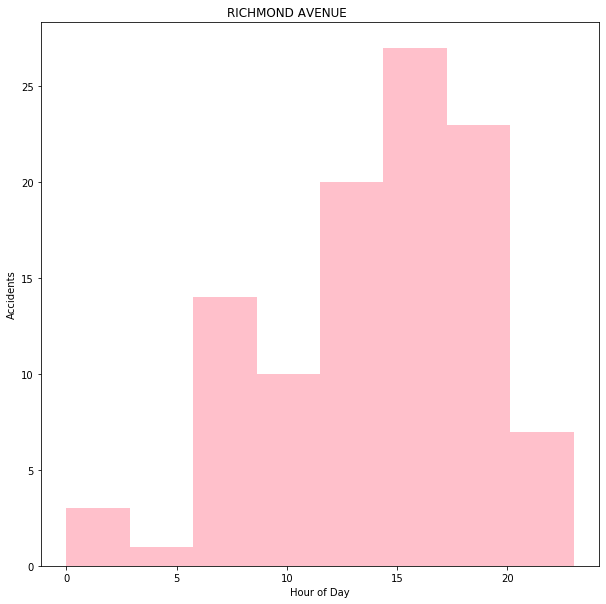

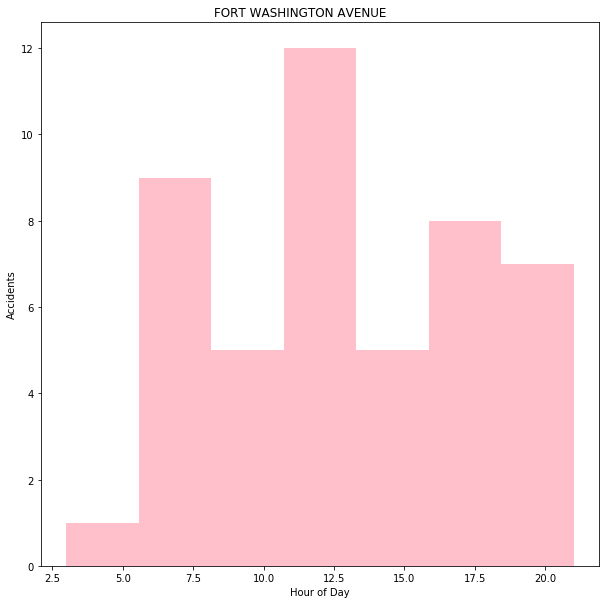

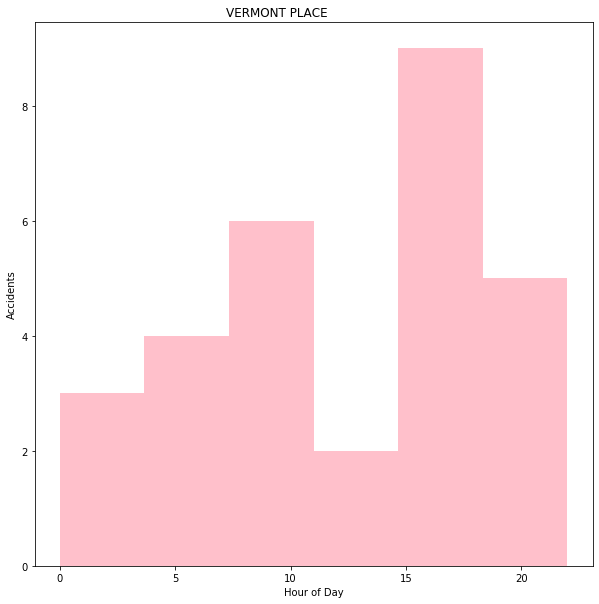

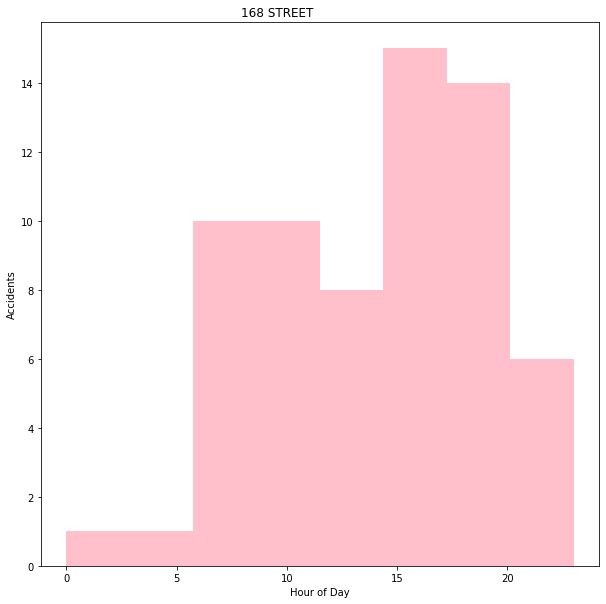

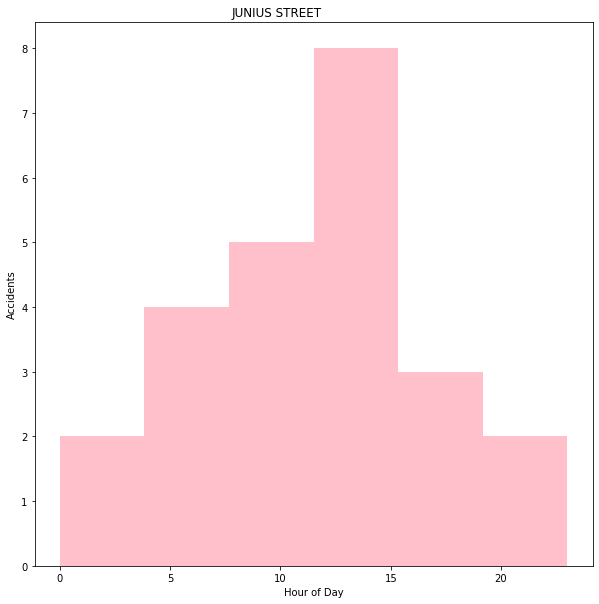

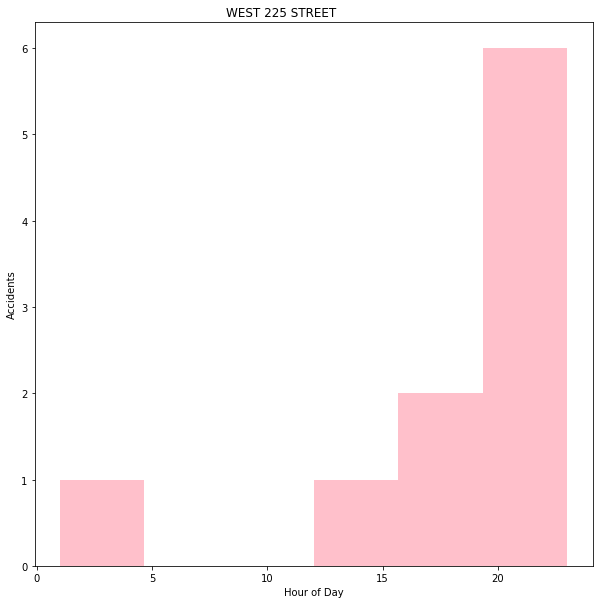

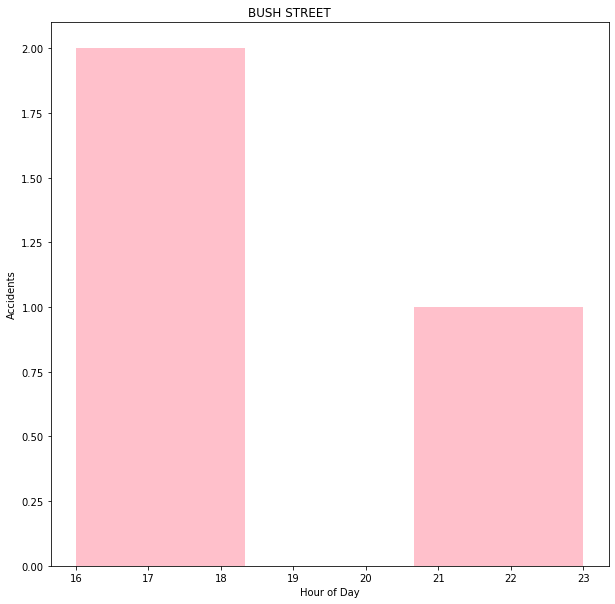

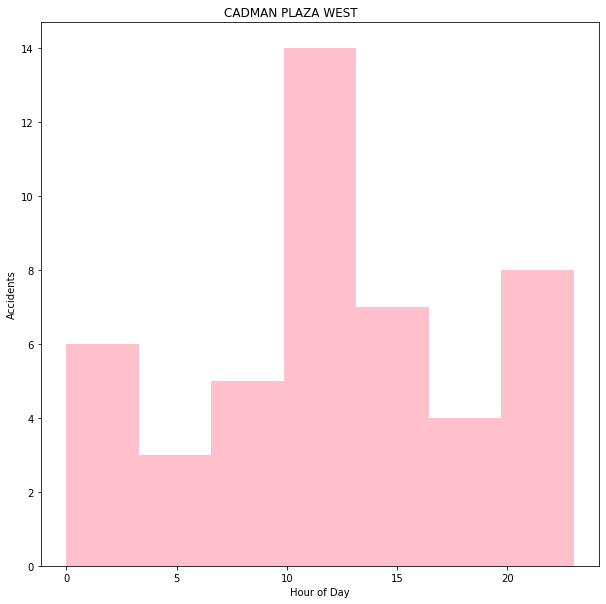

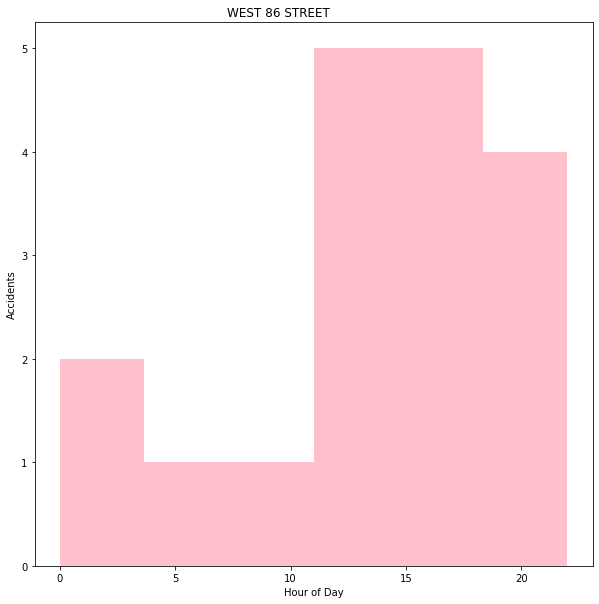

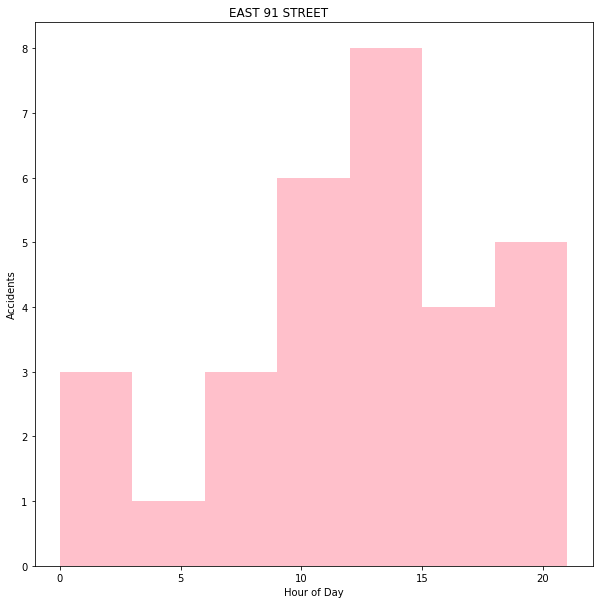

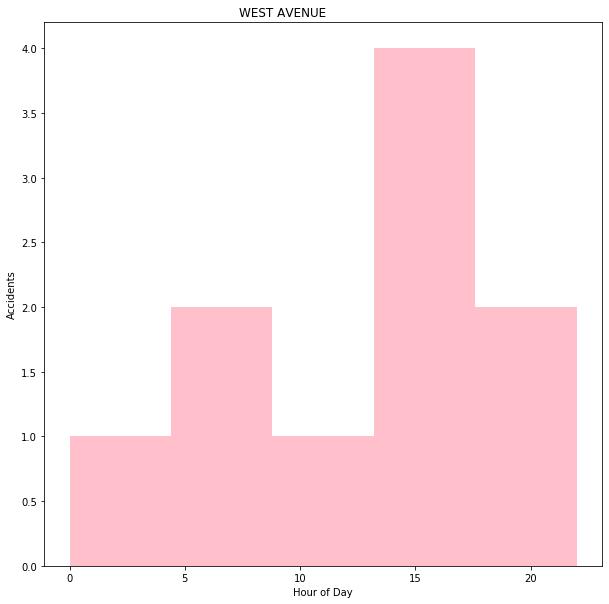

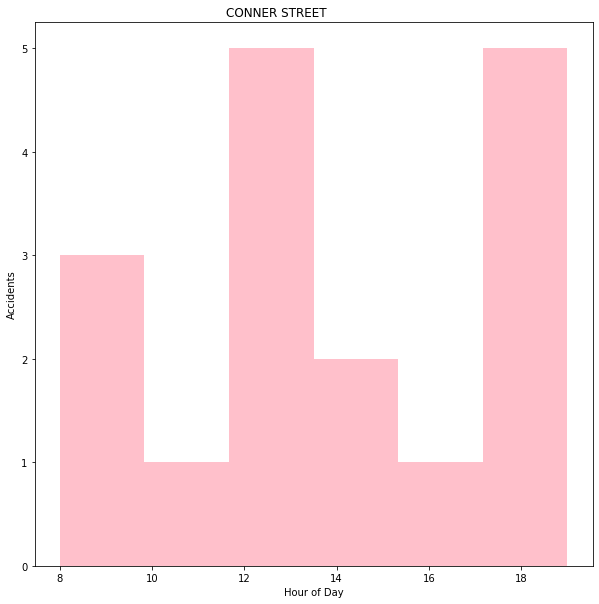

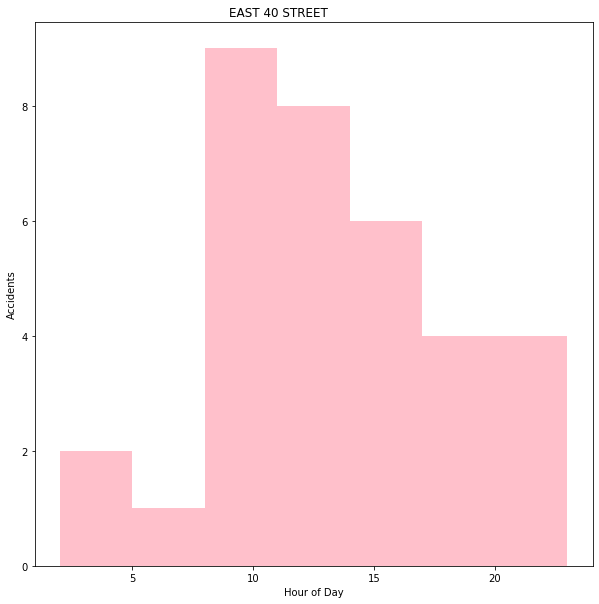

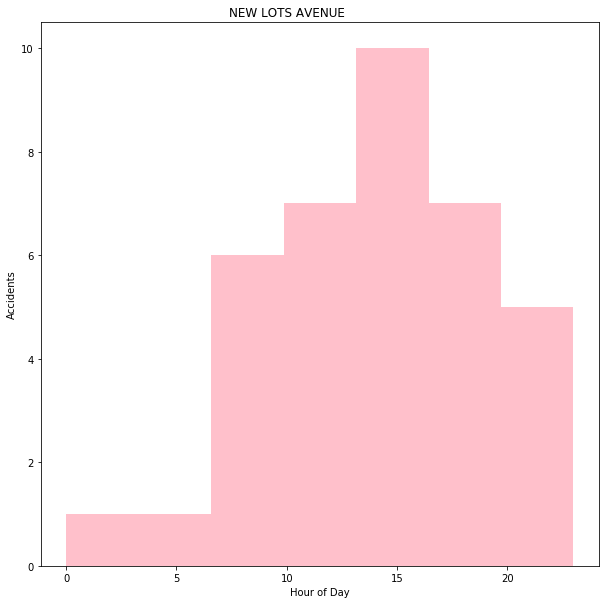

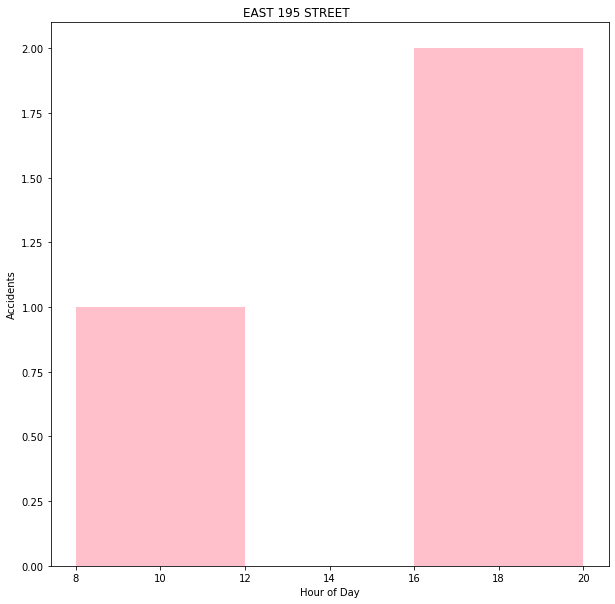

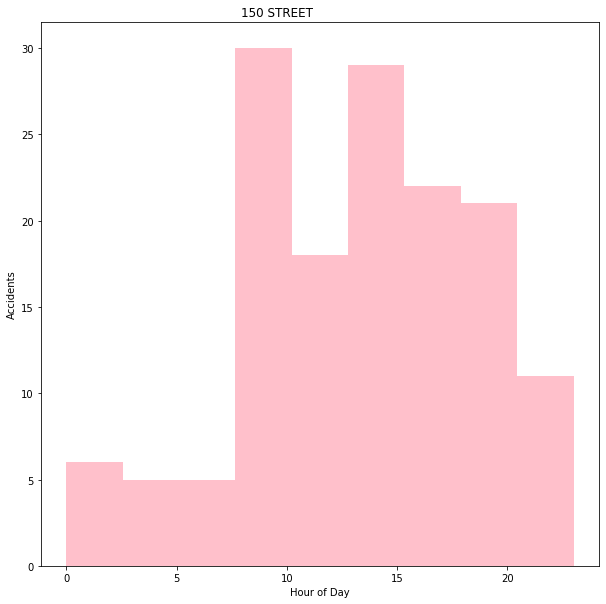

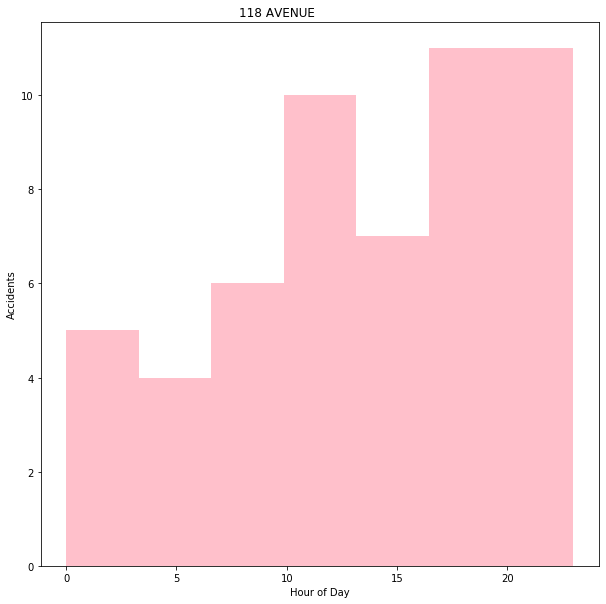

KeyboardInterrupt: 

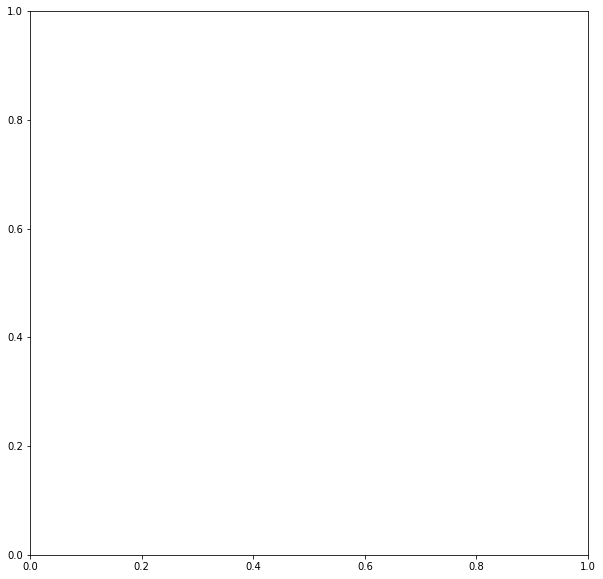

In [0]:
#Time distribution of accidents per street 
from matplotlib import pyplot as plt
for i in range(0,4603):
    street = street_crash[street_crash['ON STREET NAME'].str.contains(street_names[i])]
    street_t = street['CRASH TIME'] 
    plt.hist(street_t, bins='auto', color='pink')
    plt.title(street_names[i])
    plt.xlabel("Hour of Day")
    plt.ylabel("Accidents")
    plt.show()